# **Project Title : Insurance Claim Fraud Detection**

# Team Members
> **18B91A12F7**  	Varigonda Sai Nirmal Vignu

> **18B91A12F9**	  Vasanth Chelpaka

> **19B95A1212**	  Pathiwada Venkata Sita Ramaswamy Naidu		

> **19B95A1205**	  Gadiraju Pavan Kumar Varma







# Project Guide


> <b>Sri P.R.S.S.V. Raju (Assistant Professor)</b>



## Abstract
Insurance fraud is one of the major problems facing many insurance companies of the world and some loopholes during the traditional manual fraud investigation process have been identified as a major culprit. This is one of the motivations for this research, to deploy computing techniques in creating a barrier to fraud claims to not only provide a trustworthy environment to the customers, but also to reduce the percentage of such illegal fraud activities to a greater extent. We presented our research by automating the whole insurance claiming process using different technologies in its design, development, and implementation

## Existing Problem
Traditionally, insurance companies have been relying on expert judgment of agents, adjusters, and special investigation units to detect and deal with frauds. This approach worked to a certain degree in the past as the agents of fraud themselves were not as evolved as they are now. Also, the number of claims were relatively small which made it humanly possible to keep a track on fraud.


## Problem Statement

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification. 
<br>
Frauds are unethical and are losses to the company. By building a model that can classify auto insurance fraud, I am able to cut losses for the insurance company. Less losses equates to more earning.


**Relevance to businesses:** 

Imbalance class problems are common in many industries. Many a times, we are interested in a minority class against another much bigger class or classes. For instance, classification of other types of frauds, classification of defective goods, classification of at-risk teenagers, identifying high potential employees, identifying people of interest such as terrorist, just to name a few. 

**Criteria for success:**

The model should be able to classify if a claim is a fraud or not on a data set that it has not seen, accurately. This is measured by the F1 score and compared against a baseline naive prediction of F1: 0.397. The area under curve of the ROC (ROC AUC) will also be taken into consideration in model selection as a secondary criterion as it is important to distinguish between fraud and legit claims. This is because investigations into frauds can be time consuming and expensive and may even negatively affect customer experience. As a compulsory criterion, the ROC AUC must be above 0.50. On top of that, I aim to have a ROC AUC of at least 0.70.

**Background of insurance fraud**

Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain. Fraud may be committed at different points in the transaction by applicants, policyholders, third-party claimants, or professionals who provide services to claimants. Insurance agents and company employees may also commit insurance fraud. Common frauds include “padding,” or inflating claims; misrepresenting facts on an insurance application; submitting claims for injuries or damage that never occurred; and staging accidents.

The FBI estimates that the total cost of insurance fraud (excluding health insurance) is more than \$40 billion per year. 
Auto insurance fraud ranges from misrepresenting facts on insurance applications and inflating insurance claims to staging accidents and submitting claim forms for injuries or damage that never occurred, to false reports of stolen vehicles.

Fraud accounted for between 15 percent and 17 percent of total claims payments for auto insurance bodily injury in 2012, according to an Insurance Research Council (IRC) study. The study estimated that between \$5.6 billion and \$7.7 billion was fraudulently added to paid claims for auto insurance bodily injury payments in 2012, compared with a range of \$4.3 billion to \$5.8 billion in 2002. 

The current study aims to classify auto insurance fraud that arises from claims. The type of fraud is not disclosed in this data set and could be false reports, inflating claims, staging accidents or submitting claim forms for damages or injuries that never occurred. 

Source: https://www.iii.org/article/background-on-insurance-fraud

## Executive Summary

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification.

Several models were tested with different methods of handling imbalance datasets. The top models were also fitted and tested with different ensembles. 

The final fitted model is a weighted XGBoost which yielded an F1 score of 0.72 and a ROC AUC score of 0.84. The model performed far better than the baseline F1 score of 0.397 and ROC AUC target of 0.7. The model's F1 score and ROC AUC scores were the highest amongst the other models. In conclusion, the model was able to correctly distinguish between fraud claims and legit claims with high accuracy. 

Prior to modeling, the data was clean and exploratory data analysis was conducted. After which, the data was pre-processed for the modeling. After modeling, the models were evaluated, and the best fitted model was selected using the F1 score and the ROC AUC score. The performance of the final fitted model was discussed in further details and its top features were displayed. The project concluded by reiterated the importance of the research and what had been done and finally, with some limitations. 


### Contents:
- Abstract
- Existing Problem
- Problem Statement
- Executive Summary
- Data Dictionary
- About the Dataset
- Data Cleaning
- Exploratory Data Analysis
- Losses by Claims
- Pre-processing
- Baseline Score
- Modeling
- Evaluation
- Final Model:
- Conclusion and Limitations

# Data Dictionary


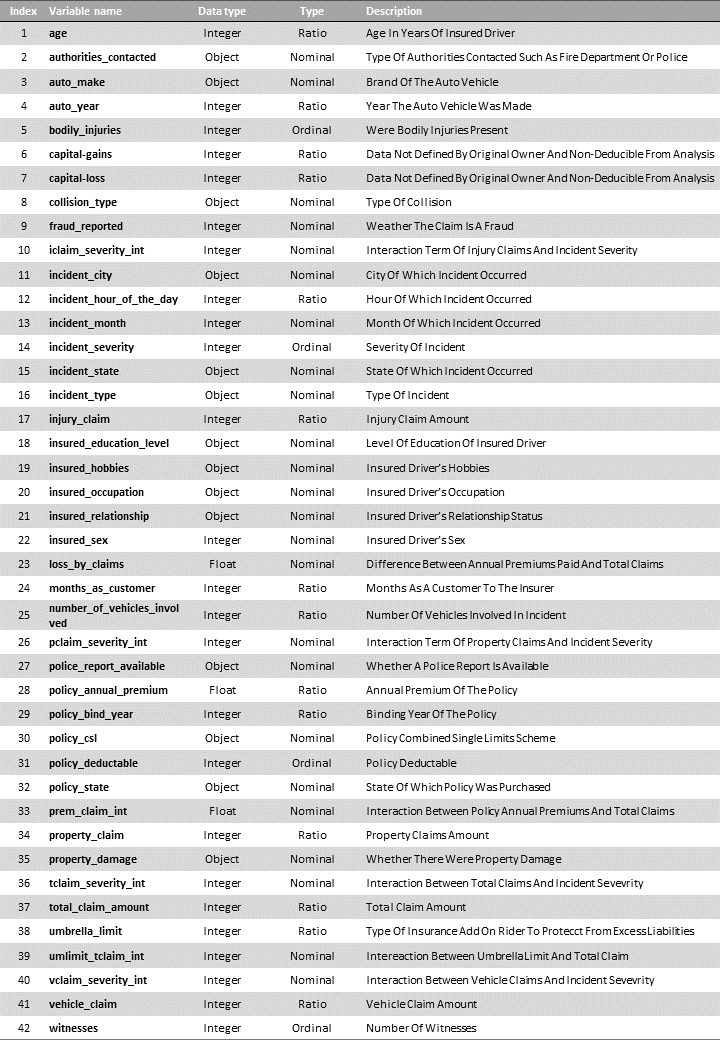

## About the Dataset 

Data source: https://www.kaggle.com/roshansharma/insurance-claim

The inspiration for this project was to perform classification on imbalance class data sets, in particular fraud. Fraud datasets are very hard to come by and often unlabelled due to its sensitive nature. 

The current data set was labelled with n=1000 samples. Unlike many other data sets, this one was less popular with only the author and one other having a notebook of it on Kaggle, making this data set one that was rather novel in nature. The data set consist of 1000 auto incidents and auto insurance claims from Ohio, Illinois and Indiana from 01 January 2015 to 01 March 2015. Before any cleaning or feature engineering, the data set has a total of 39 variables. It is not stated if this data is from multiple insurance companies or just one company. However, throughout the report, "the insurance company" will be used to refer to the origin of this data.

The obvious con of this data set is the small sample size. However, there are still many companies who do not have big data sets. The ability to work with what is available is crucial for any company looking to transition into leveraging data science. In the 2017 MIT tech review, EmTech presentation, Professor Andrew Ng penned a cyclical diagram on the white board and explained that many companies start off with some small data and develop a product which have users, which in turn leads to generation of more products. In similar vein, companies may start off with a small data set and build towards a bigger data set as time goes by. Compared to a company that waits for the day when it has a huge data set, the company that started with a small data set and worked on it will more likely succeed earlier in its data science journey and reap its rewards. 


 ## Importing Libraries

In [1]:
!pip install mlens

^C


In [ ]:
#pip install mlens

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

from scipy.stats import pointbiserialr, stats
from imblearn.over_sampling import SMOTE, ADASYN 

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from xgboost import XGBClassifier
from xgboost import plot_importance

from mlens.ensemble import SuperLearner
from mlens.visualization import corrmat 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


%config InlineBackend.figure_format = 'retina'
%matplotlib inline




[MLENS] backend: threading


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving insurance fraud claims.csv to insurance fraud claims.csv


In [ ]:
data=pd.read_csv("insurance fraud claims.csv")
# data2=pd.read_csv('/content/insuranceFraud.csv')
# data=pd.concat([data1,data2]).reset_index(drop=True)

In [ ]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [ ]:
data.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    2015-02-22  Single Vehicle Collision  Front Collision   
996    2015-01-24  Single Vehicle Collision   Rear Collision   
997    2015-01-23   Multi-vehicle Collision   Side Collision   
998    2015-02-26  Single Vehicle Collision   Rear Collision   
999    2015-02-26                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

In [ ]:
column_names=pd.DataFrame(data.dtypes)
column_names=column_names.reset_index()
column_names.columns=["data_columns","dtypes"]
column_names

data_columns   dtypes
0            months_as_customer    int64
1                           age    int64
2                 policy_number    int64
3              policy_bind_date   object
4                  policy_state   object
5                    policy_csl   object
6             policy_deductable    int64
7         policy_annual_premium  float64
8                umbrella_limit    int64
9                   insured_zip    int64
10                  insured_sex   object
11      insured_education_level   object
12           insured_occupation   object
13              insured_hobbies   object
14         insured_relationship   object
15                capital-gains    int64
16                 capital-loss    int64
17                incident_date   object
18                incident_type   object
19               collision_type   object
20            incident_severity   object
21        authorities_contacted   object
22               incident_state   object
23                incident_city   object
24            incident_location   object
25     incident_hour_of_the_day    int64
26  number_of_vehicles_involved    int64
27              property_damage   object
28              bodily_injuries    int64
29                    witnesses    int64
30      police_report_available   object
31           total_claim_amount    int64
32                 injury_claim    int64
33               property_claim    int64
34                vehicle_claim    int64
35                    auto_make   object
36                   auto_model   object
37                    auto_year    int64
38               fraud_reported   object
39                         _c39  float64

In [ ]:
k=data.shape
print('No of rows = ',k[0])
print('No of columns = ',k[1])

No of rows =  1000
No of columns =  40


In [ ]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
missing_stats = []

for col in data.columns:
    missing_stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_data = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_data.sort_values(['percent_missing','unique_values'], ascending=False)

feature  unique_values  percent_missing  \
39                         _c39              0            100.0   
2                 policy_number           1000              0.0   
24            incident_location           1000              0.0   
9                   insured_zip            995              0.0   
7         policy_annual_premium            991              0.0   
3              policy_bind_date            951              0.0   
31           total_claim_amount            763              0.0   
34                vehicle_claim            726              0.0   
32                 injury_claim            638              0.0   
33               property_claim            626              0.0   
0            months_as_customer            391              0.0   
16                 capital-loss            354              0.0   
15                capital-gains            338              0.0   
17                incident_date             60              0.0   
1                           age             46              0.0   
36                   auto_model             39              0.0   
25     incident_hour_of_the_day             24              0.0   
37                    auto_year             21              0.0   
13              insured_hobbies             20              0.0   
12           insured_occupation             14              0.0   
35                    auto_make             14              0.0   
8                umbrella_limit             11              0.0   
11      insured_education_level              7              0.0   
22               incident_state              7              0.0   
23                incident_city              7              0.0   
14         insured_relationship              6              0.0   
21        authorities_contacted              5              0.0   
18                incident_type              4              0.0   
19               collision_type              4              0.0   
20            incident_severity              4              0.0   
26  number_of_vehicles_involved              4              0.0   
29                    witnesses              4              0.0   
4                  policy_state              3              0.0   
5                    policy_csl              3              0.0   
6             policy_deductable              3              0.0   
27              property_damage              3              0.0   
28              bodily_injuries              3              0.0   
30      police_report_available              3              0.0   
10                  insured_sex              2              0.0   
38               fraud_reported              2              0.0   

    percent_biggest_cat     type  
39                100.0  float64  
2                   0.1    int64  
24                  0.1   object  
9                   0.2    int64  
7                   0.2  float64  
3                   0.3   object  
31                  0.5    int64  
34                  0.7    int64  
32                  2.5    int64  
33                  1.9    int64  
0                   0.8    int64  
16                 47.5    int64  
15                 50.8    int64  
17                  2.8   object  
1                   4.9    int64  
36                  4.3   object  
25                  5.4    int64  
37                  5.6    int64  
13                  6.4   object  
12                  9.3   object  
35                  8.0   object  
8                  79.8    int64  
11                 16.1   object  
22                 26.2   object  
23                 15.7   object  
14                 18.3   object  
21                 29.2   object  
18                 41.9   object  
19                 29.2   object  
20                 35.4   object  
26                 58.1    int64  
29                 25.8    int64  
4                  35.2   object  
5                  35.1   object  
6                  35.1    int64  
27              

In [ ]:
## As we observe that there are no values in _c39 which is useless so we can drop that column
data.drop('_c39',axis=1,inplace=True)
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [ ]:
numerical_columns=list(data.select_dtypes(include=[np.number]).columns.values)
categorical_columns=set(data.columns)-set(numerical_columns)


In [ ]:
print("Numerical columns:",len(numerical_columns))
print()
print(numerical_columns)
print("*"*127)

print("Categorical columns:",len(categorical_columns))
print()
print(categorical_columns)


Numerical columns: 18

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
*******************************************************************************************************************************
Categorical columns: 21

{'policy_state', 'insured_hobbies', 'auto_make', 'insured_relationship', 'insured_education_level', 'authorities_contacted', 'incident_location', 'insured_occupation', 'police_report_available', 'incident_severity', 'policy_csl', 'incident_state', 'fraud_reported', 'collision_type', 'policy_bind_date', 'incident_type', 'property_damage', 'auto_model', 'insured_sex', 'incident_city', 'incident_date'}


In [ ]:
# Statistical insights for numerical colums
data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

In [ ]:
#description for categorical data
data.describe(include='object').T

count unique                      top freq
policy_bind_date         1000    951               2006-01-01    3
policy_state             1000      3                       OH  352
policy_csl               1000      3                  250/500  351
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_date            1000     60               2015-02-02   28
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      4           Rear Collision  292
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
incident_location        1000   1000           9935 4th Drive    1
property_damage          1000      3                        ?  360
police_report_available  1000      3                        ?  343
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1000, 39)

In [ ]:
# Unique values in each column
for i in list(data.columns):
    print(i+" : ",data[i].nunique())
    print()
    print(list(data[i].unique()))
    print('*'*125)

months_as_customer :  391

[328, 228, 134, 256, 137, 165, 27, 212, 235, 447, 60, 121, 180, 473, 70, 140, 160, 196, 460, 217, 370, 413, 237, 8, 257, 202, 224, 241, 64, 166, 155, 114, 149, 147, 62, 289, 431, 199, 79, 116, 37, 106, 269, 265, 163, 355, 175, 192, 430, 91, 223, 195, 22, 439, 94, 11, 151, 154, 245, 119, 215, 295, 254, 107, 478, 128, 338, 271, 222, 120, 270, 319, 194, 227, 244, 78, 200, 284, 275, 153, 31, 41, 127, 61, 207, 219, 80, 325, 29, 239, 279, 350, 464, 118, 298, 87, 261, 453, 210, 168, 390, 258, 225, 164, 255, 206, 203, 211, 274, 81, 280, 112, 24, 93, 171, 124, 287, 122, 398, 214, 209, 82, 193, 288, 104, 101, 375, 461, 428, 45, 136, 216, 278, 108, 14, 276, 47, 73, 294, 324, 53, 426, 111, 86, 296, 125, 177, 238, 449, 252, 359, 19, 285, 30, 342, 468, 343, 404, 63, 335, 142, 272, 69, 38, 281, 246, 330, 362, 371, 377, 172, 99, 249, 190, 174, 95, 2, 117, 242, 440, 20, 208, 156, 232, 84, 394, 35, 369, 332, 243, 264, 32, 259, 186, 201, 436, 189, 105, 88, 40, 59, 39, 123, 231,

##### We can see '?' in some columns we have to handle that as we are not aware with the right vlaue for '?' we can replace '?' with 'undocumented'

In [ ]:
for i in list(data.columns):
    
    if '?' in data[i].unique():
        print(i)
        data[i].replace('?','undocumented',inplace=True)
        print('? in '+i+' replaced with undocummented' )
        print()

collision_type
? in collision_type replaced with undocummented

property_damage
? in property_damage replaced with undocummented

police_report_available
? in police_report_available replaced with undocummented



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
list(data['collision_type'].unique())

['Side Collision', 'undocumented', 'Rear Collision', 'Front Collision']

In [ ]:
#incident_severity can be seen as ordinal
#code them in order of severity 

data['incident_severity'] = data['incident_severity'].map({"Trivial Damage":0,
                                                       "Minor Damage":1,
                                                       "Major Damage":2,
                                                       "Total Loss":3
                                                      }).astype("int32")
data.incident_severity.value_counts()

1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64

In [ ]:
#umbrella limit is like an insruance topup that pays your liabilities in case you get sued
#cannot be zero
#this 0 is an error

data['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
         ...   
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [ ]:
#edit to positve
data['umbrella_limit'].iloc[290] = 1000000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:

data['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
         ...   
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [ ]:
data['auto_make'].replace('Suburu','Subaru',inplace=True)

In [ ]:
#extract out the year as 

data['policy_bind_year']=data['policy_bind_date'].str.extract('(\d{4})\-').astype('int32')

In [ ]:
#extract the month out 
#all accidents are from 2015 jan and feb, so year isnt very important

data['incident_month']=data['incident_date'].str.extract('\d{4}\-(\d{2})').astype('int32')


#### Identify by data types

In [ ]:
all_var = list(data.columns)
len(all_var)

41

In [ ]:
#continuous variables = ordinal, interval, ratio

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [ ]:
#ordinal var

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)

4

In [ ]:
#quan var = interval or ratio 

quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [ ]:
#norminal aka discrete var

nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

23

In [ ]:
#check for norminal data with vevry large number of categories

for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(data[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### policy_state ###
  
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------------------------------------------
  
### insured_hobbies ###
  
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
---------------------------------------------
  
### auto_make ###
  
Saab          80
Dodge         80
Subaru        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
-------------------------------------------

In [ ]:
#for those that have not too many unique, we can plot them out

large_cat = []

for col in nom_var:
    if data[col].nunique() > 20:
        large_cat.append(col)
        print(col, data[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

incident_location 1000
policy_number 1000
insured_zip 995
policy_bind_date 951
auto_model 39
incident_date 60


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data['auto_model_1']=le.fit_transform(data['auto_model'])
# data['auto_model_1']

In [ ]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(data[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=data['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)


auto_model_92x  auto_model_93  auto_model_95  auto_model_A3  auto_model_A5  \
0               1              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              1              0              0   
6               0              0              0              0              0   
7               0              0              0              0              1   
8               0              0              0              0              0   
9               1              0              0              0              0   

   auto_model_Accord  auto_model_C300  auto_model_CRV  auto_model_Camry  \
0                  0                0               0                 0   
1                  0                0               0                 0   
2                  0                0               0                 0   
3                  0                0               0                 0   
4                  0                0               0                 0   
5                  0                0               0                 0   
6                  0                0               0                 0   
7                  0                0               0                 0   
8                  0                0               0                 1   
9                  0                0               0                 0   

   auto_model_Civic  auto_model_Corolla  auto_model_E400  auto_model_Escape  \
0                 0                   0                0                  0   
1                 0                   0                1                  0   
2                 0                   0                0                  0   
3                 0                   0                0                  0   
4                 0                   0                0                  0   
5                 0                   0                0                  0   
6                 0                   0                0                  0   
7                 0                   0                0                  0   
8                 0                   0                0                  0   
9                 0                   0                0                  0   

   auto_model_F150  auto_model_Forrestor  auto_model_Fusion  \
0                0                     0                  0   
1                0                     0                  0   
2                0                     0                  0   
3                0                     0                  0   
4                0                     0                  0   
5                0                     0                  0   
6                0                     0                  0   
7                0                     0                  0   
8                0                     0                  0   
9                0                     0                  0   

   auto_model_Grand Cherokee  auto_model_Highlander  auto_model_Impreza  \
0                          0                      0                   0   
1                          0                      0                   0   
2                          0                      0                   0   
3                          0                      0                   0   
4                          0                      0                   0   
5                          0                      0                   0   
6                          0                      0                   0   
7                          0                      0                   0   
8                          0                  

In [ ]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = large_dummy.corr()
corr.style.applymap(color)


#no correlation with make and fraud. drop var

In [ ]:
#drop this variables from analysis 

data.drop(large_cat, axis=1, inplace=True)

In [ ]:
#redefine the norminal var
#remove dv from the list

nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 
len(nom_var)

16

In [ ]:
#check columns add up 

print ('total var count:{}'.format(len(list(data.columns))),
       'continous var count:{}'.format(len(cont_var)),
       'norminal var count:{}'.format(len(nom_var)))

total var count:35 continous var count:18 norminal var count:16


## Exploratory Data Analysis

### Dependent variable
Exploratory data analysis was conducted started with the dependent variable, Fraud_reported. There were 247 frauds and 753 non-frauds. 24.7% of the data were frauds while 75.3% were non-fraudulent claims. 

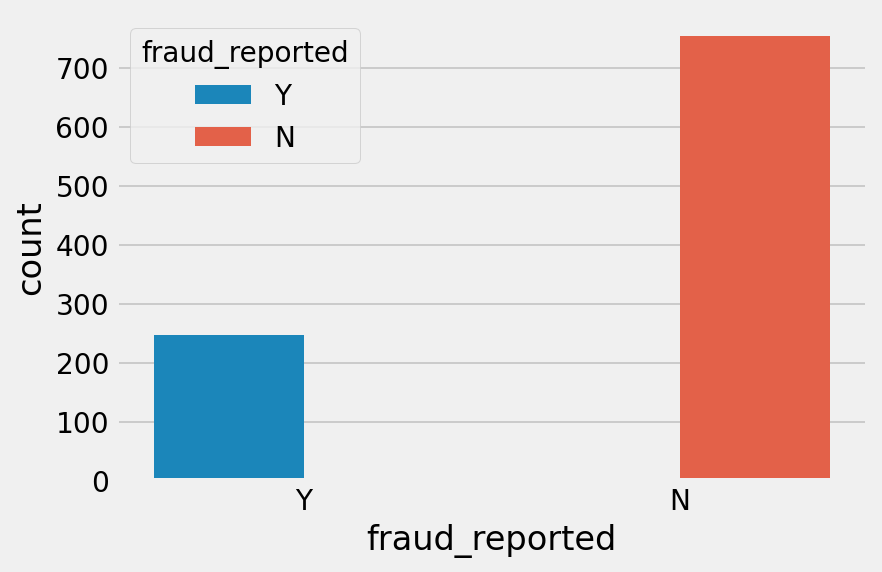

In [ ]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=data, hue='fraud_reported')

In [ ]:
print("No of claims reported Not Fraud :",data['fraud_reported'].value_counts()[0])
print("No of claims reported as Fraud :",data['fraud_reported'].value_counts()[1])

No of claims reported Not Fraud : 753
No of claims reported as Fraud : 247


#### We can see that data is totally imbalanced as only 24.7% of data represent Not a Fraud and 75.3% of data represent Fraud

### Correlations among variables
Next, correlations amongst continuous variables (ordinal, interval/ratio variables) were inspected. Heatmap was plotted for variables with at least 0.3 Pearson's correlation coefficient , including the DV.

Month as customer and age had a correlation of 0.92. Probably because drivers buy auto insurance when they own a car and this time measure only increases with age. 

Incident severity and different types of claims have a clear correlation ($r$ = 0.36 - 0.50)

Apart from that, there don’t seem to be much correlations in the data.
There don’t seem to be multicollinearity problem except maybe that all the claims are all correlated, and somehow total claims have accounted for them.
However, the other claims provide some granularity that will not otherwise be captured by total claims. Thus, these variables were kept. 

In [ ]:
#Color negative numbers red

def color(val):
    color = 'red' if val ==1 else 'green' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = data[cont_var].corr()
corr.style.applymap(color)

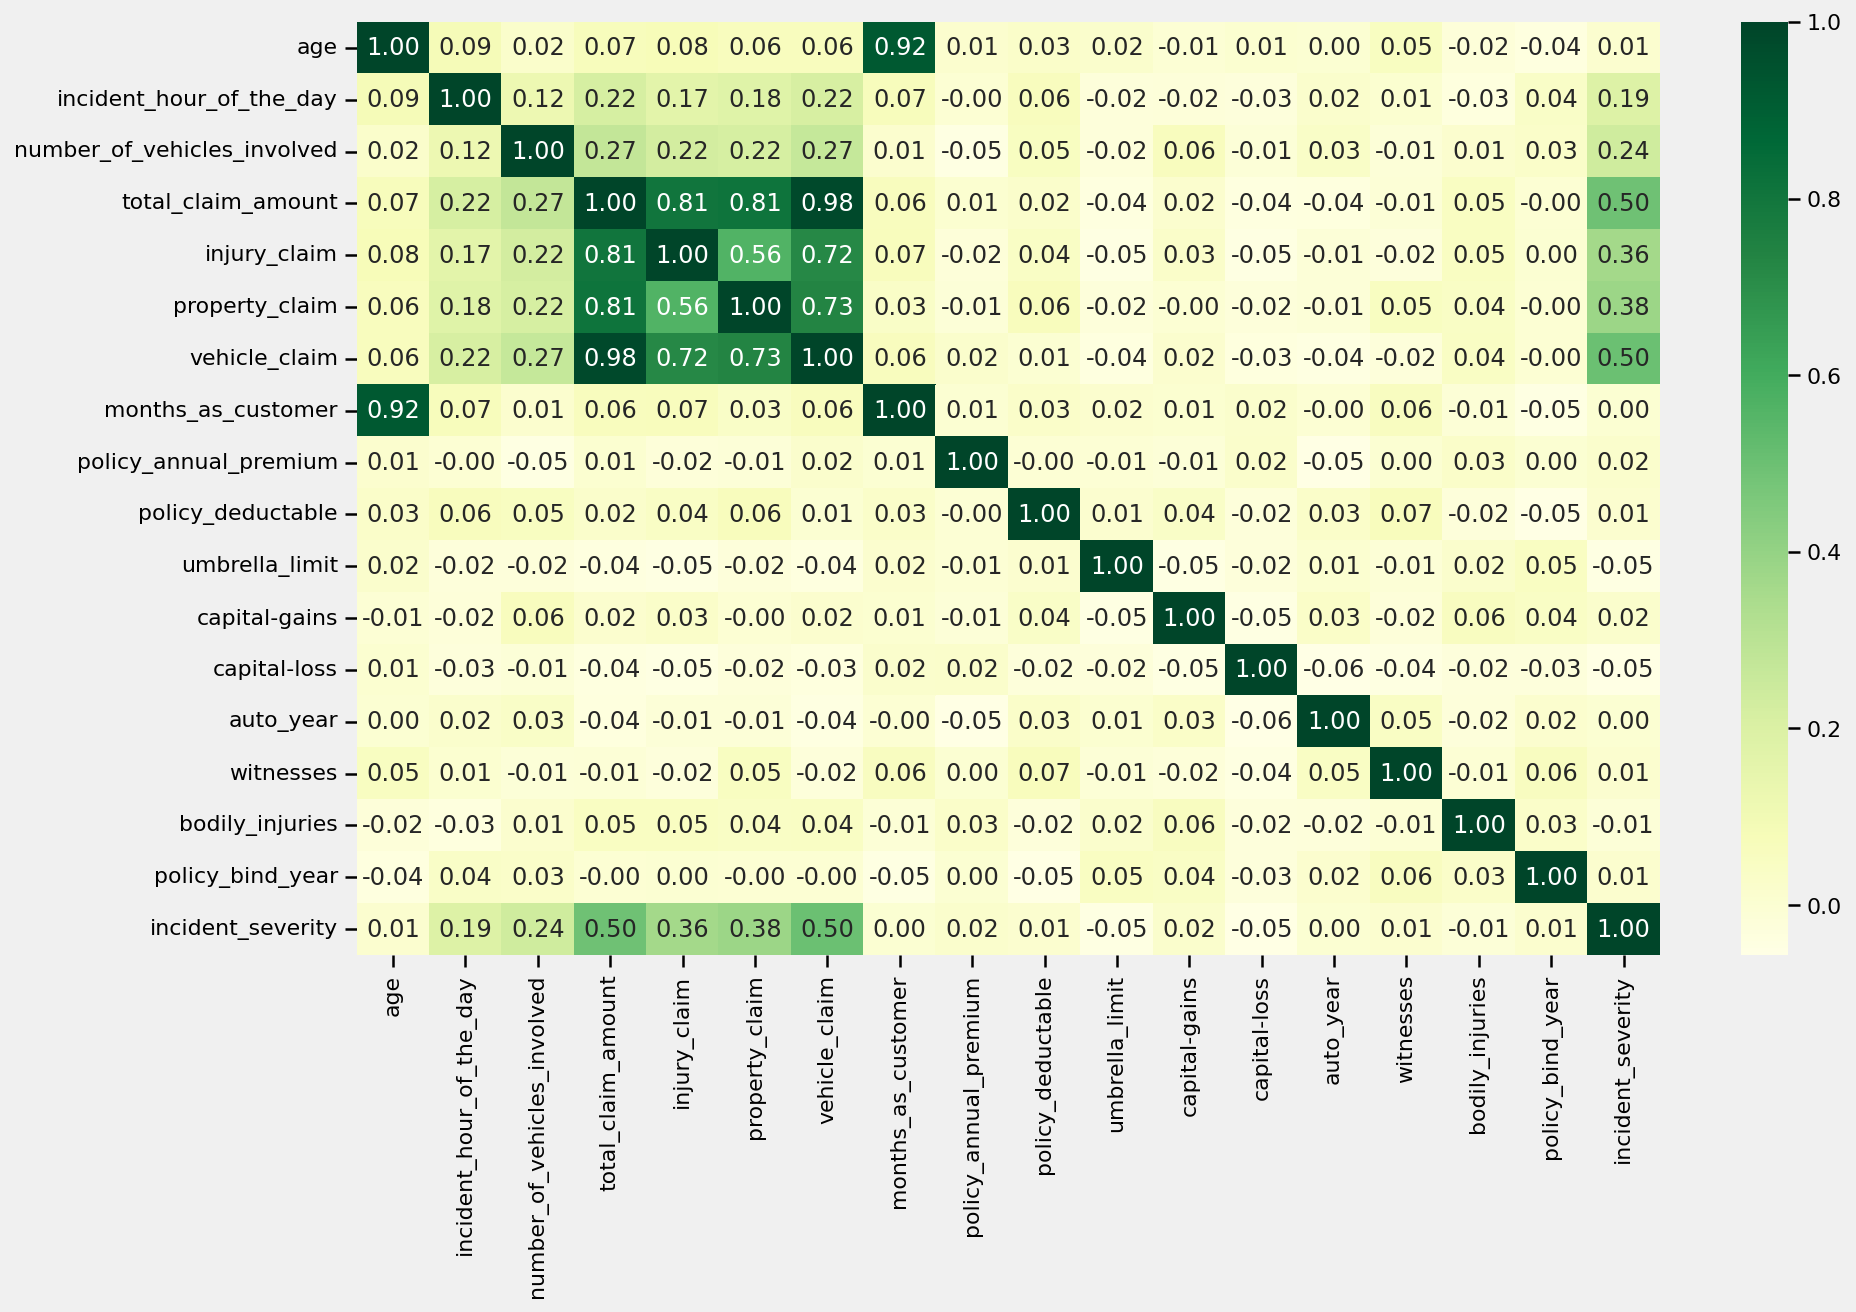

In [ ]:
corr = data[cont_var].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,8))
# # create a mask so we only see the correlation values once
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,cmap="YlGn", annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [ ]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount',
           'injury_claim', 'property_claim','vehicle_claim',
           'incident_severity','fraud_reported']

corr_data = data[corr_list]
corr=round(corr_data.corr(),2)

corr

age  months_as_customer  total_claim_amount  \
age                 1.00                0.92                0.07   
months_as_customer  0.92                1.00                0.06   
total_claim_amount  0.07                0.06                1.00   
injury_claim        0.08                0.07                0.81   
property_claim      0.06                0.03                0.81   
vehicle_claim       0.06                0.06                0.98   
incident_severity   0.01                0.00                0.50   

                    injury_claim  property_claim  vehicle_claim  \
age                         0.08            0.06           0.06   
months_as_customer          0.07            0.03           0.06   
total_claim_amount          0.81            0.81           0.98   
injury_claim                1.00            0.56           0.72   
property_claim              0.56            1.00           0.73   
vehicle_claim               0.72            0.73           1.00   
incident_severity           0.36            0.38           0.50   

                    incident_severity  
age                              0.01  
months_as_customer               0.00  
total_claim_amount               0.50  
injury_claim                     0.36  
property_claim                   0.38  
vehicle_claim                    0.50  
incident_severity                1.00

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


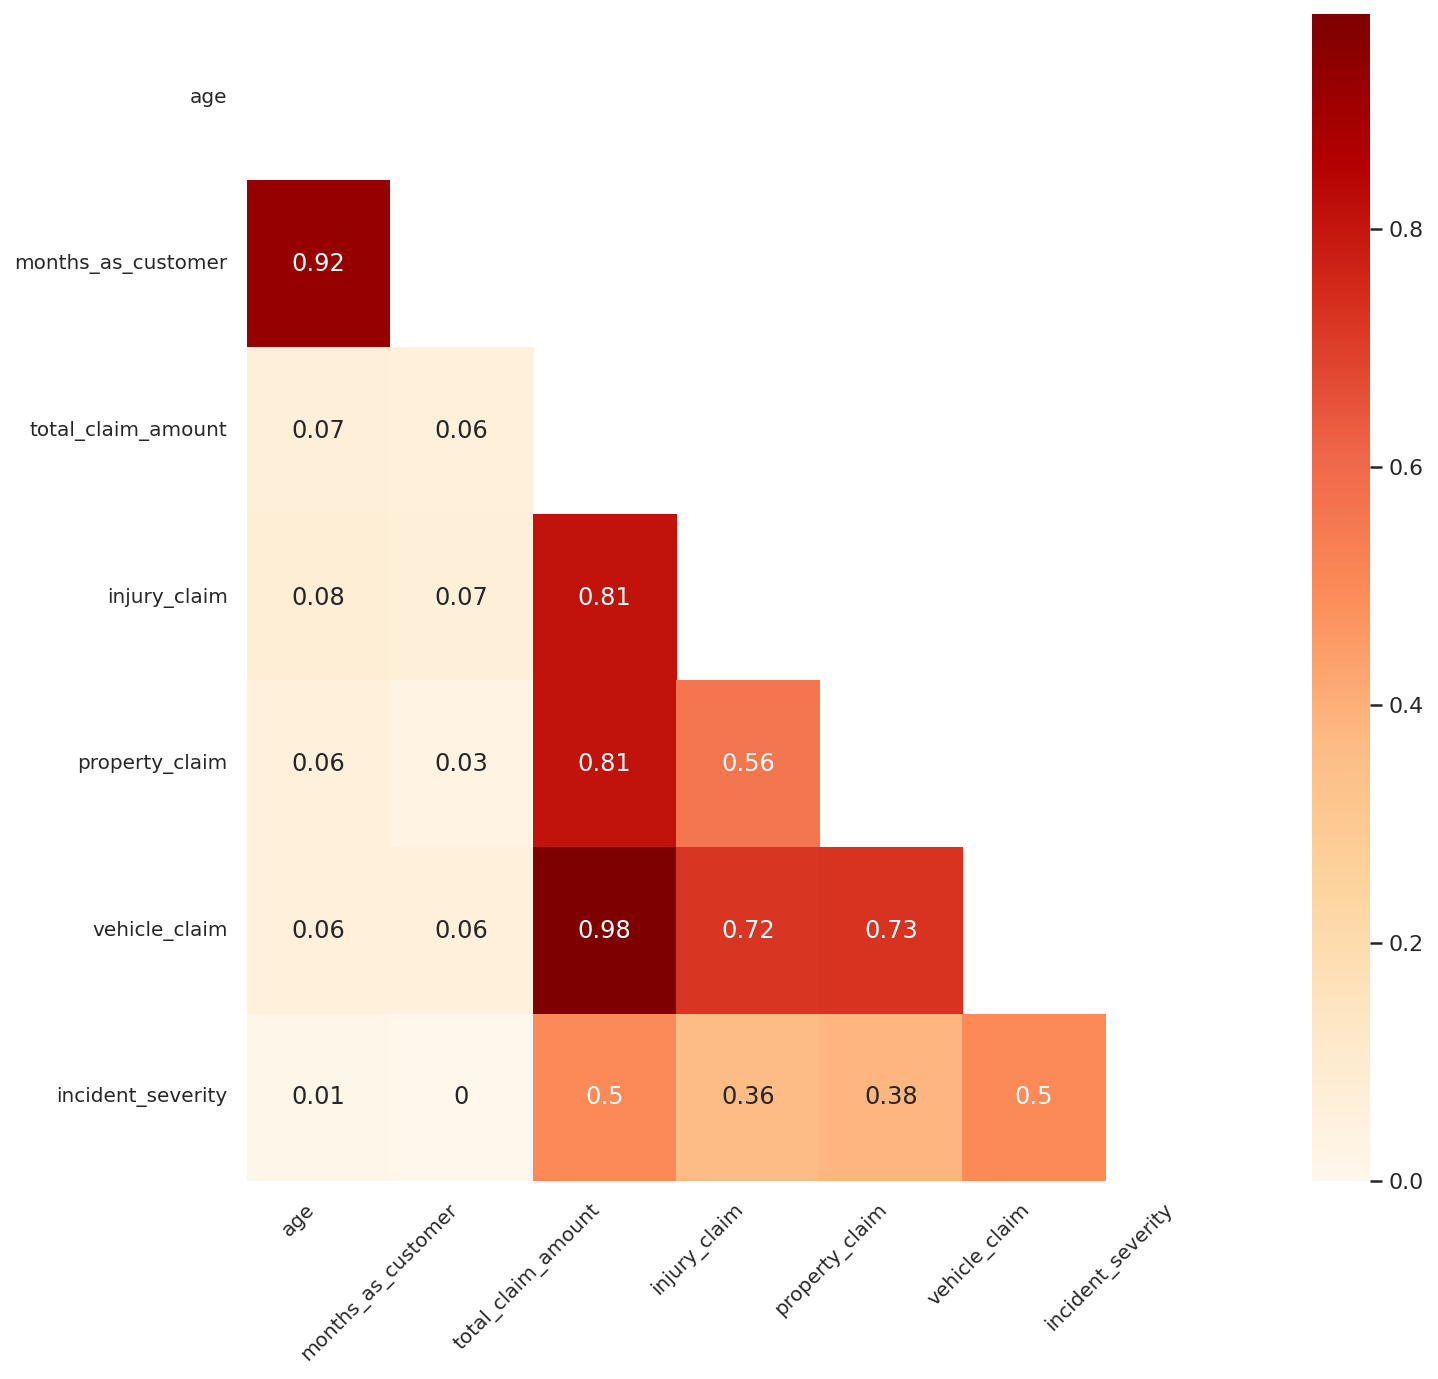

In [ ]:
# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular.

In [ ]:
cor_matrix = data[cont_var].corr()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)


                             age  incident_hour_of_the_day  \
age                          NaN                  0.087161   
incident_hour_of_the_day     NaN                       NaN   
number_of_vehicles_involved  NaN                       NaN   
total_claim_amount           NaN                       NaN   
injury_claim                 NaN                       NaN   
property_claim               NaN                       NaN   
vehicle_claim                NaN                       NaN   
months_as_customer           NaN                       NaN   
policy_annual_premium        NaN                       NaN   
policy_deductable            NaN                       NaN   
umbrella_limit               NaN                       NaN   
capital-gains                NaN                       NaN   
capital-loss                 NaN                       NaN   
auto_year                    NaN                       NaN   
witnesses                    NaN                       NaN   
bodily_i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Droping the column with high correlation

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(); print(to_drop)


['vehicle_claim', 'months_as_customer']


In [ ]:
# here we taking a copy of our dataframe data as data2 and drop the correlated columns after completing exploratory data analysis we can preprocess on new dataframe
data2=data.copy()
data2.drop(to_drop,axis=1,inplace=True)
data2.shape

(1000, 33)

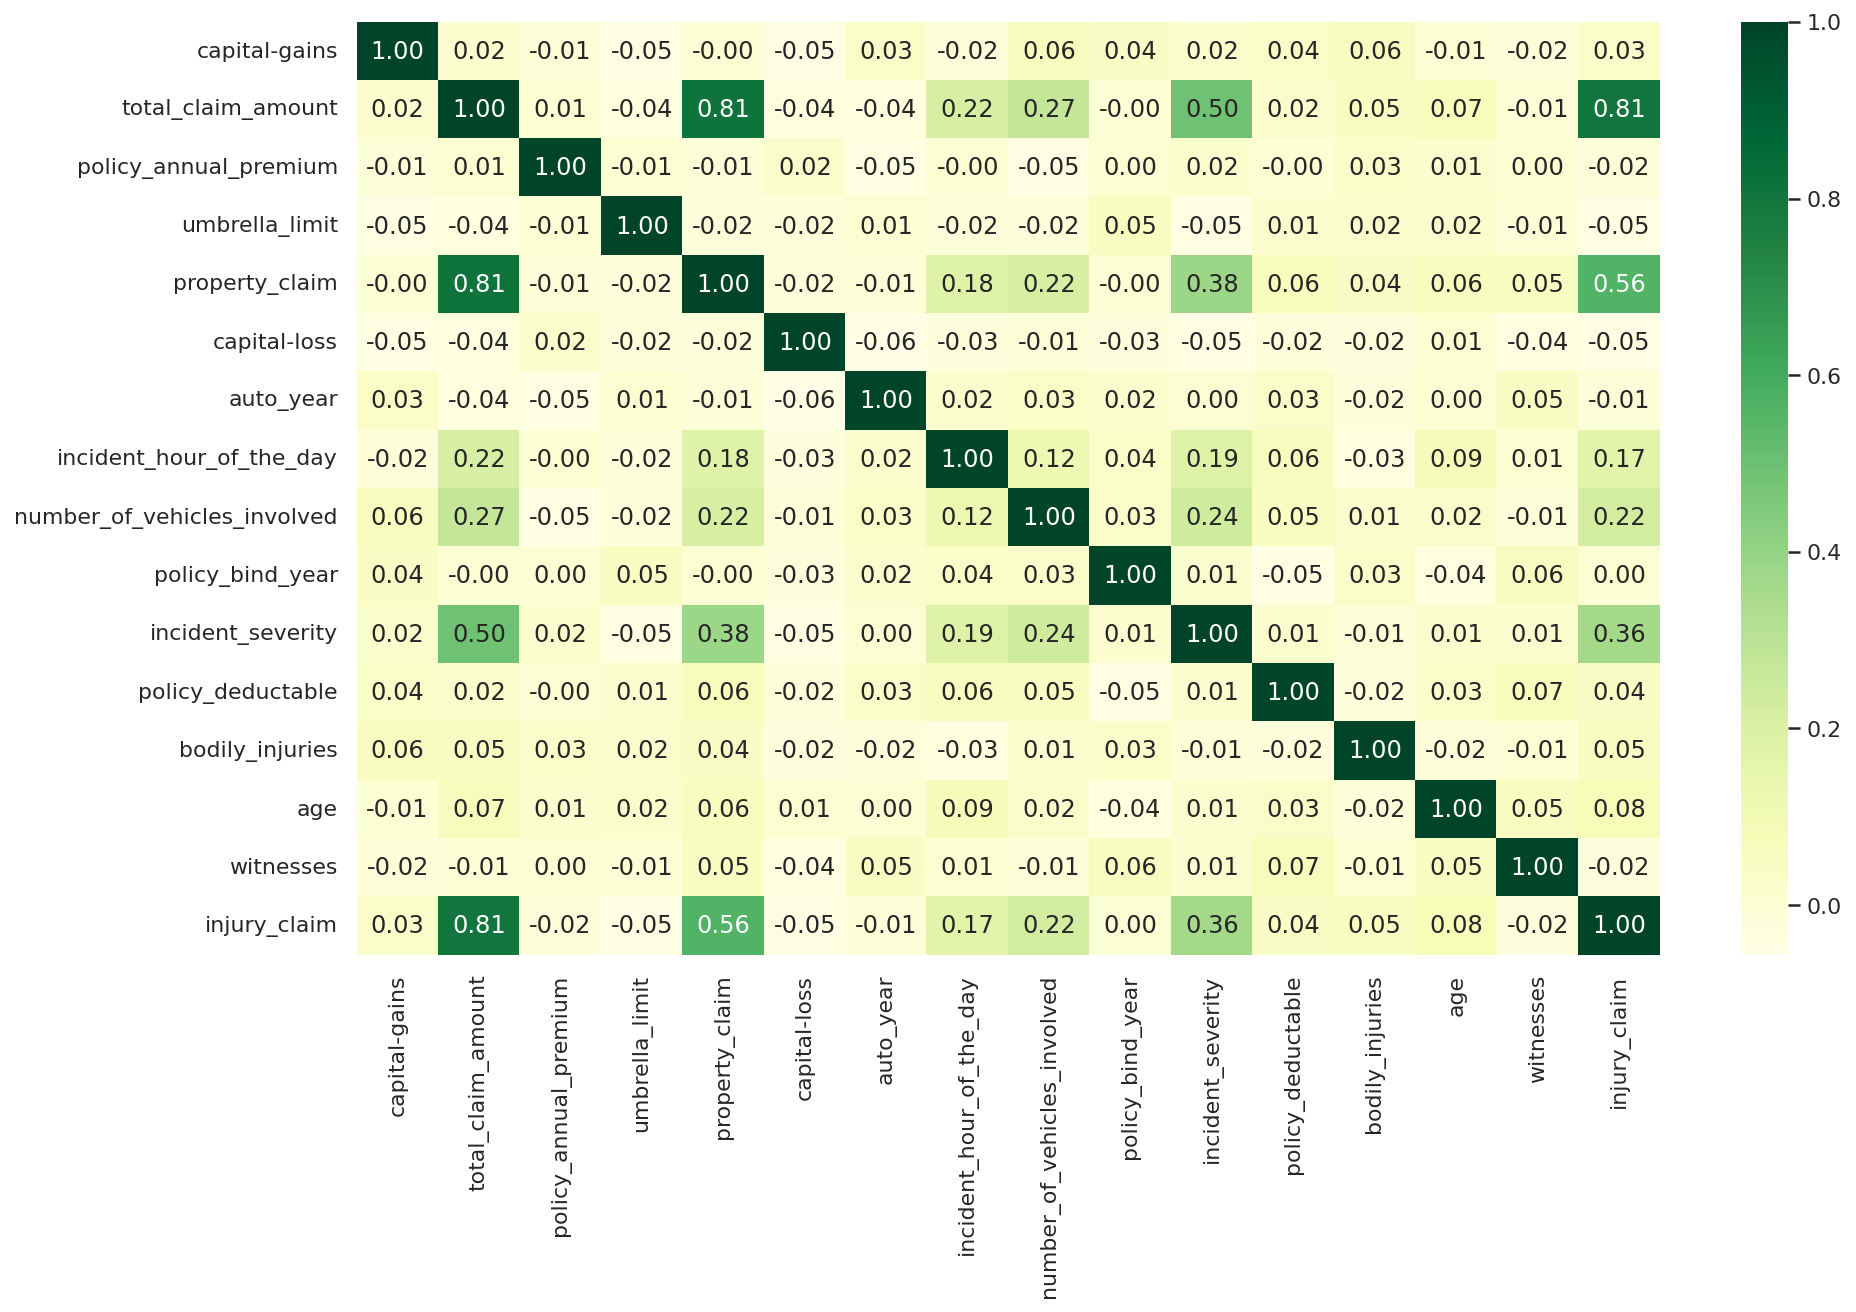

In [ ]:
corr = data2[list(set(cont_var)-set(to_drop))].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,8))
# # create a mask so we only see the correlation values once
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,cmap="YlGn", annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

## Visualization

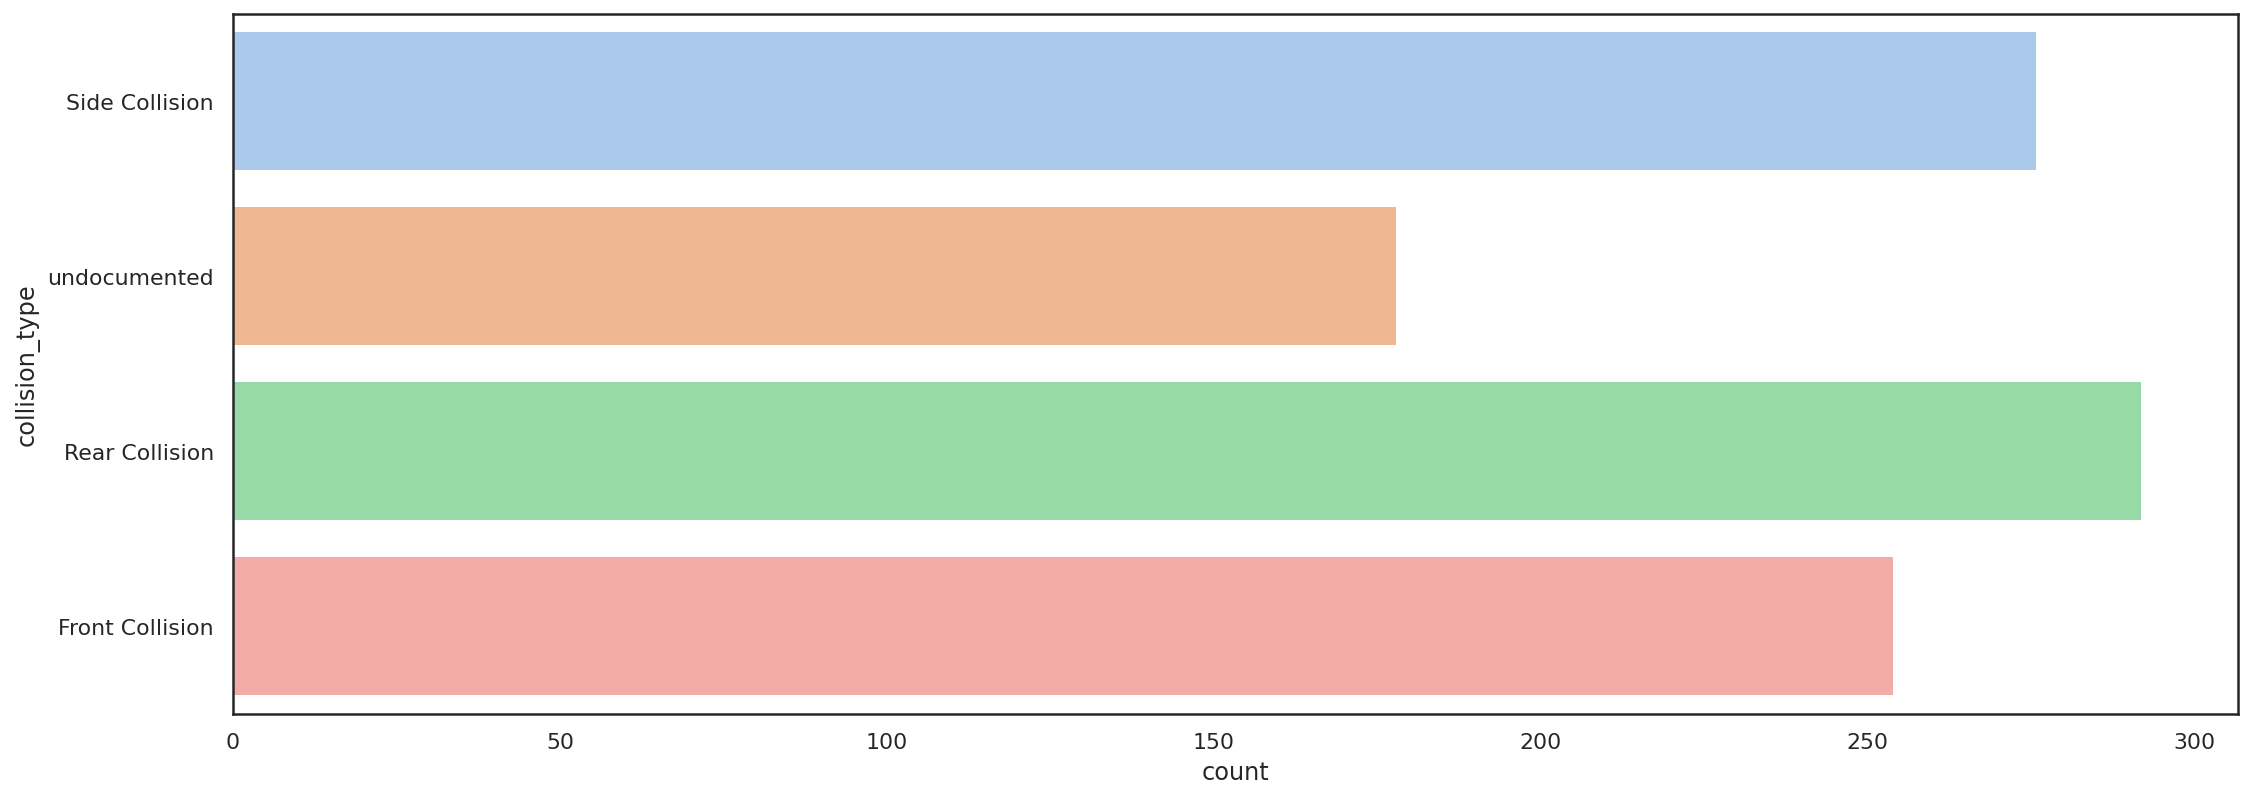

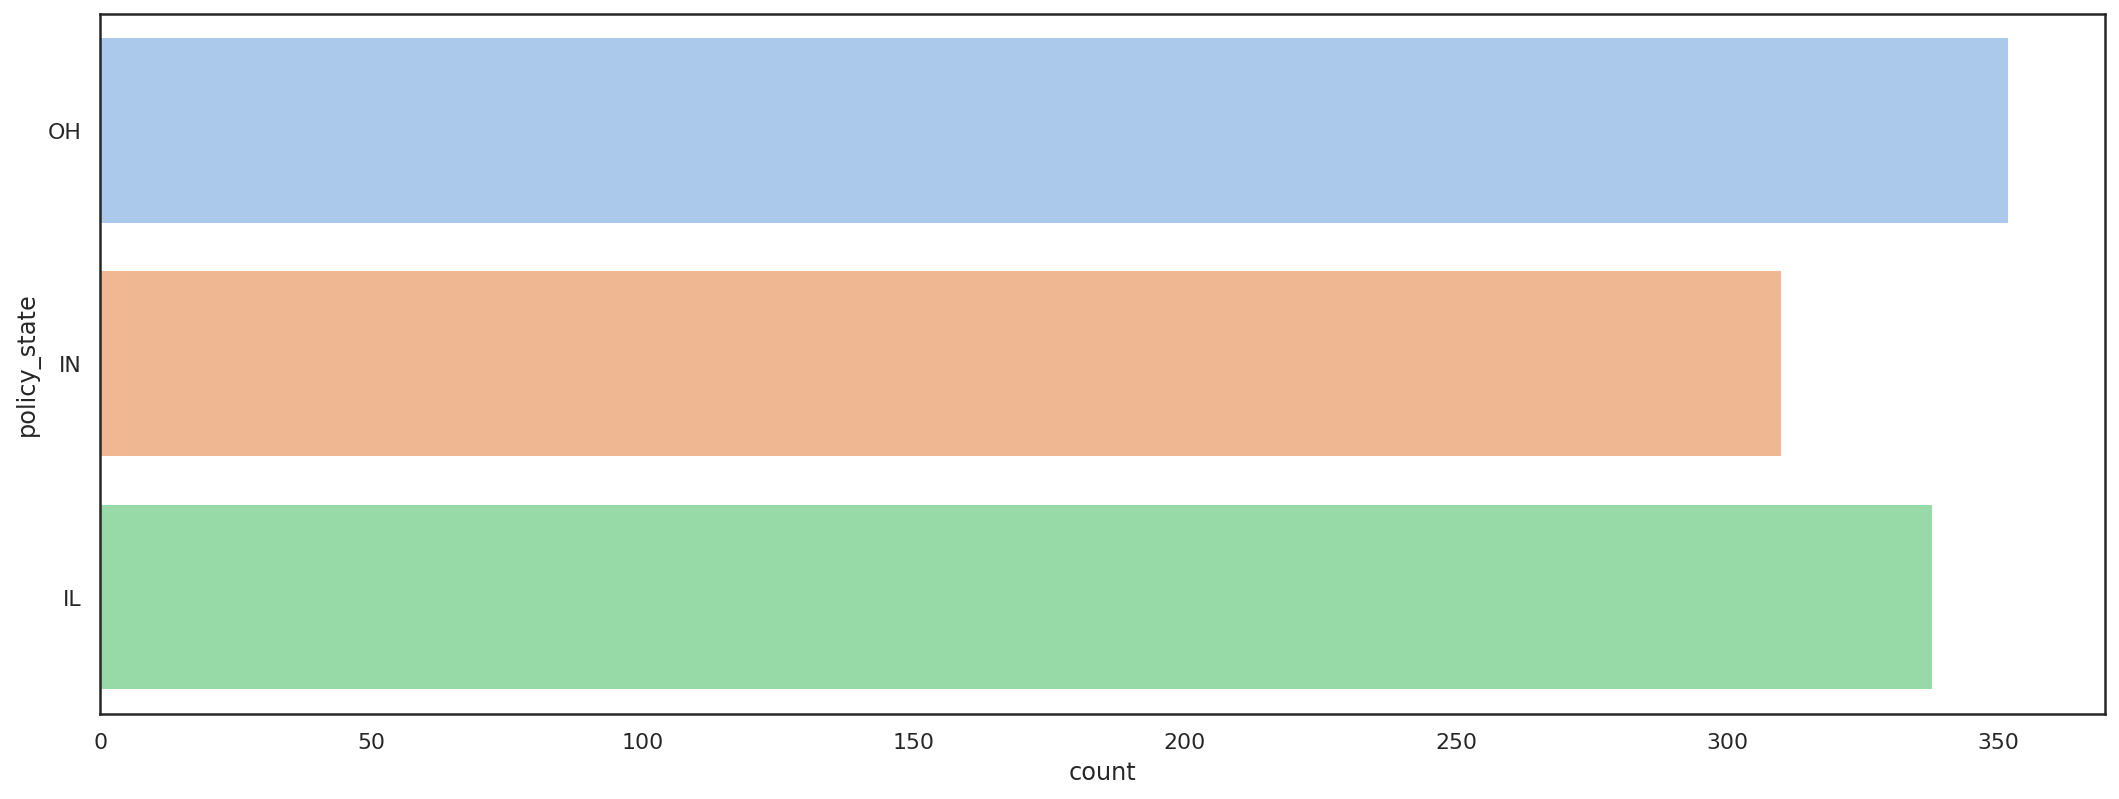

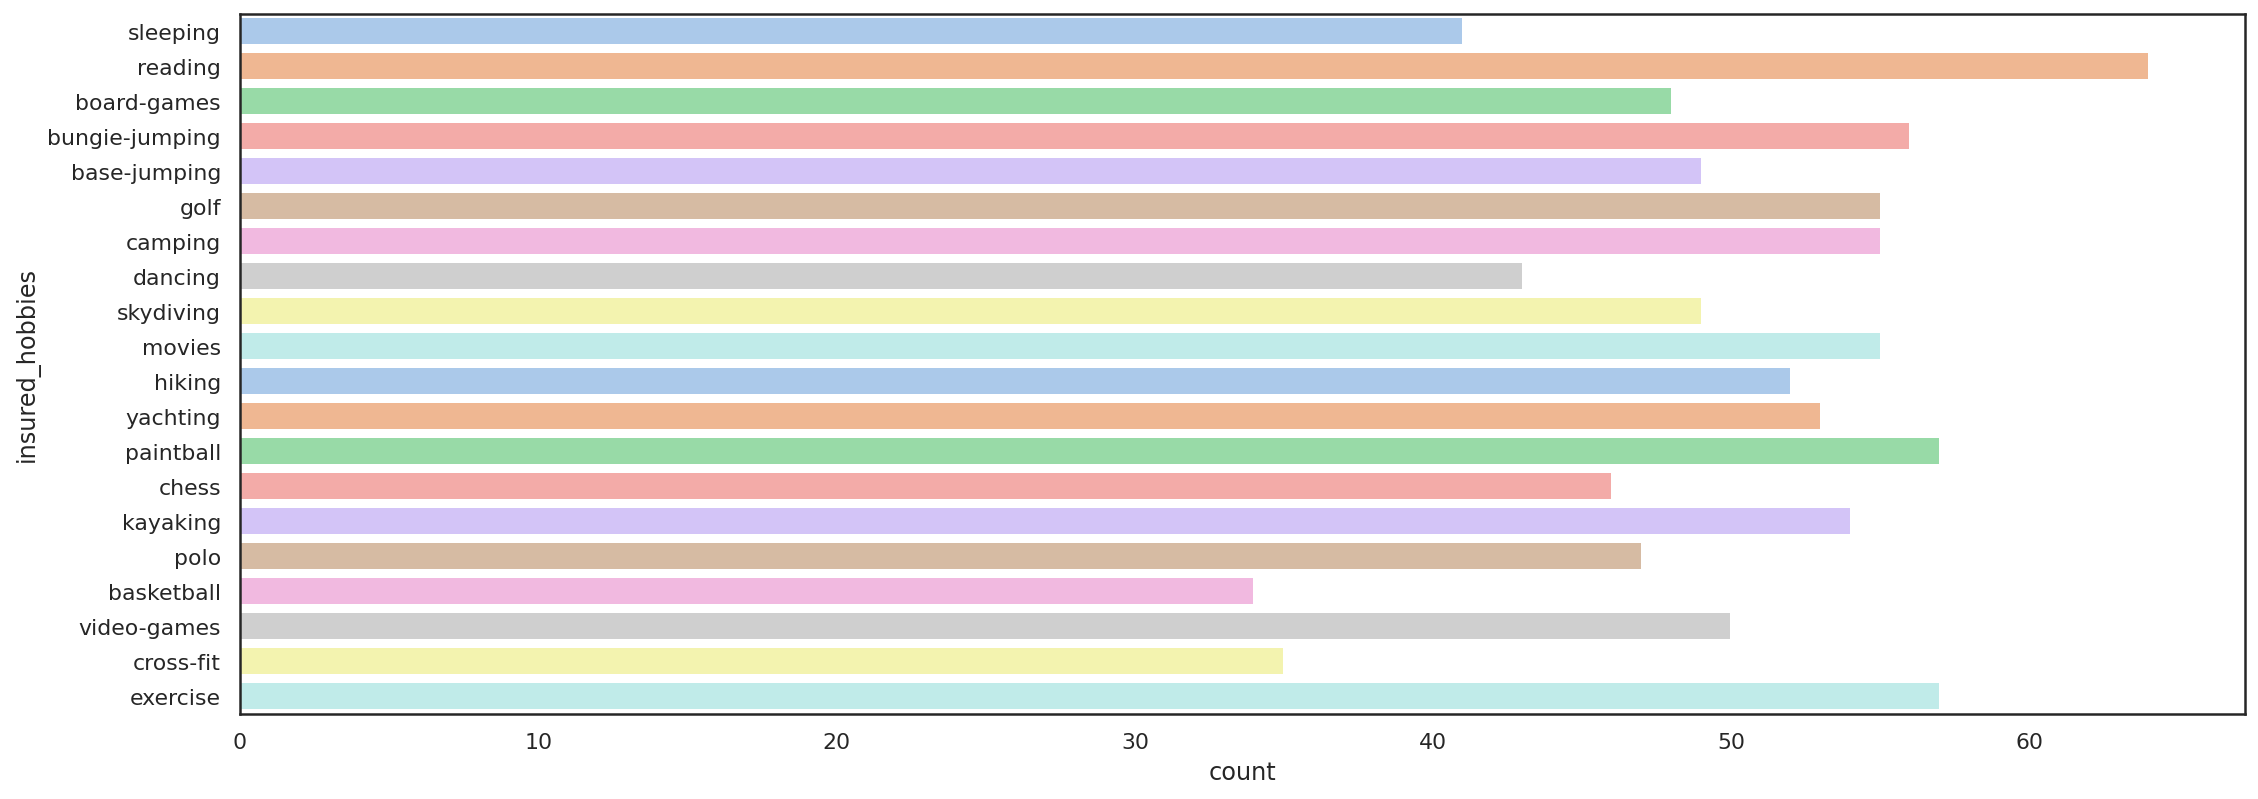

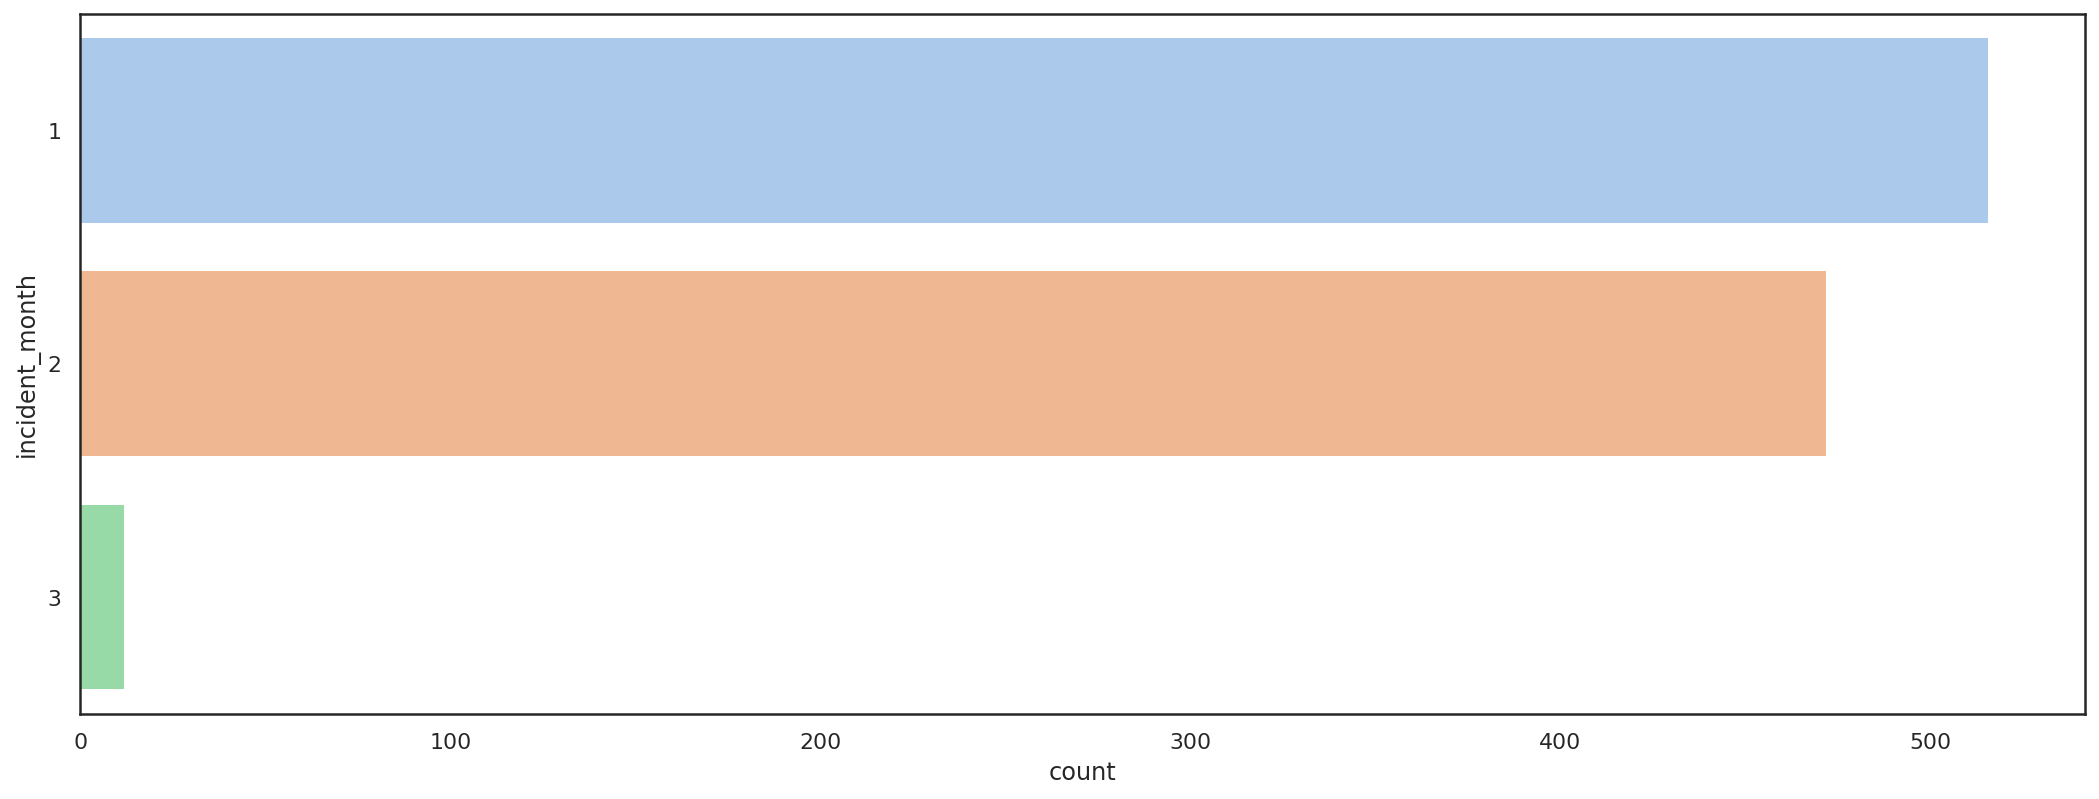

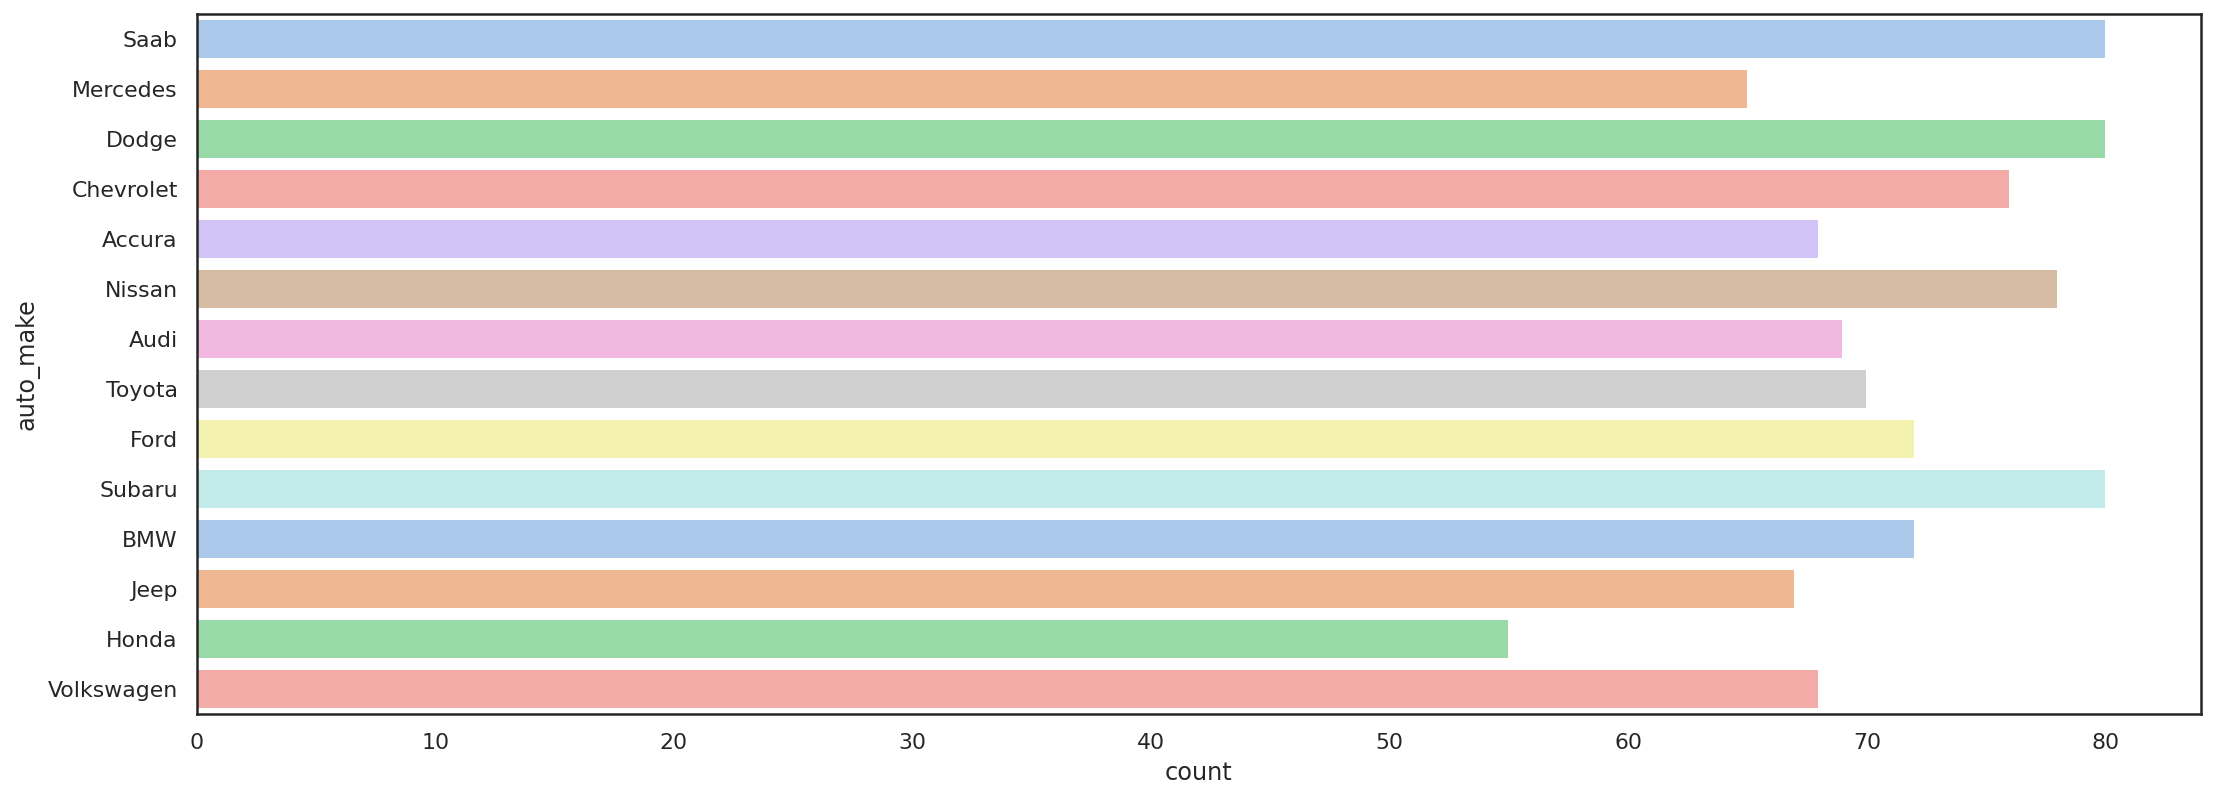

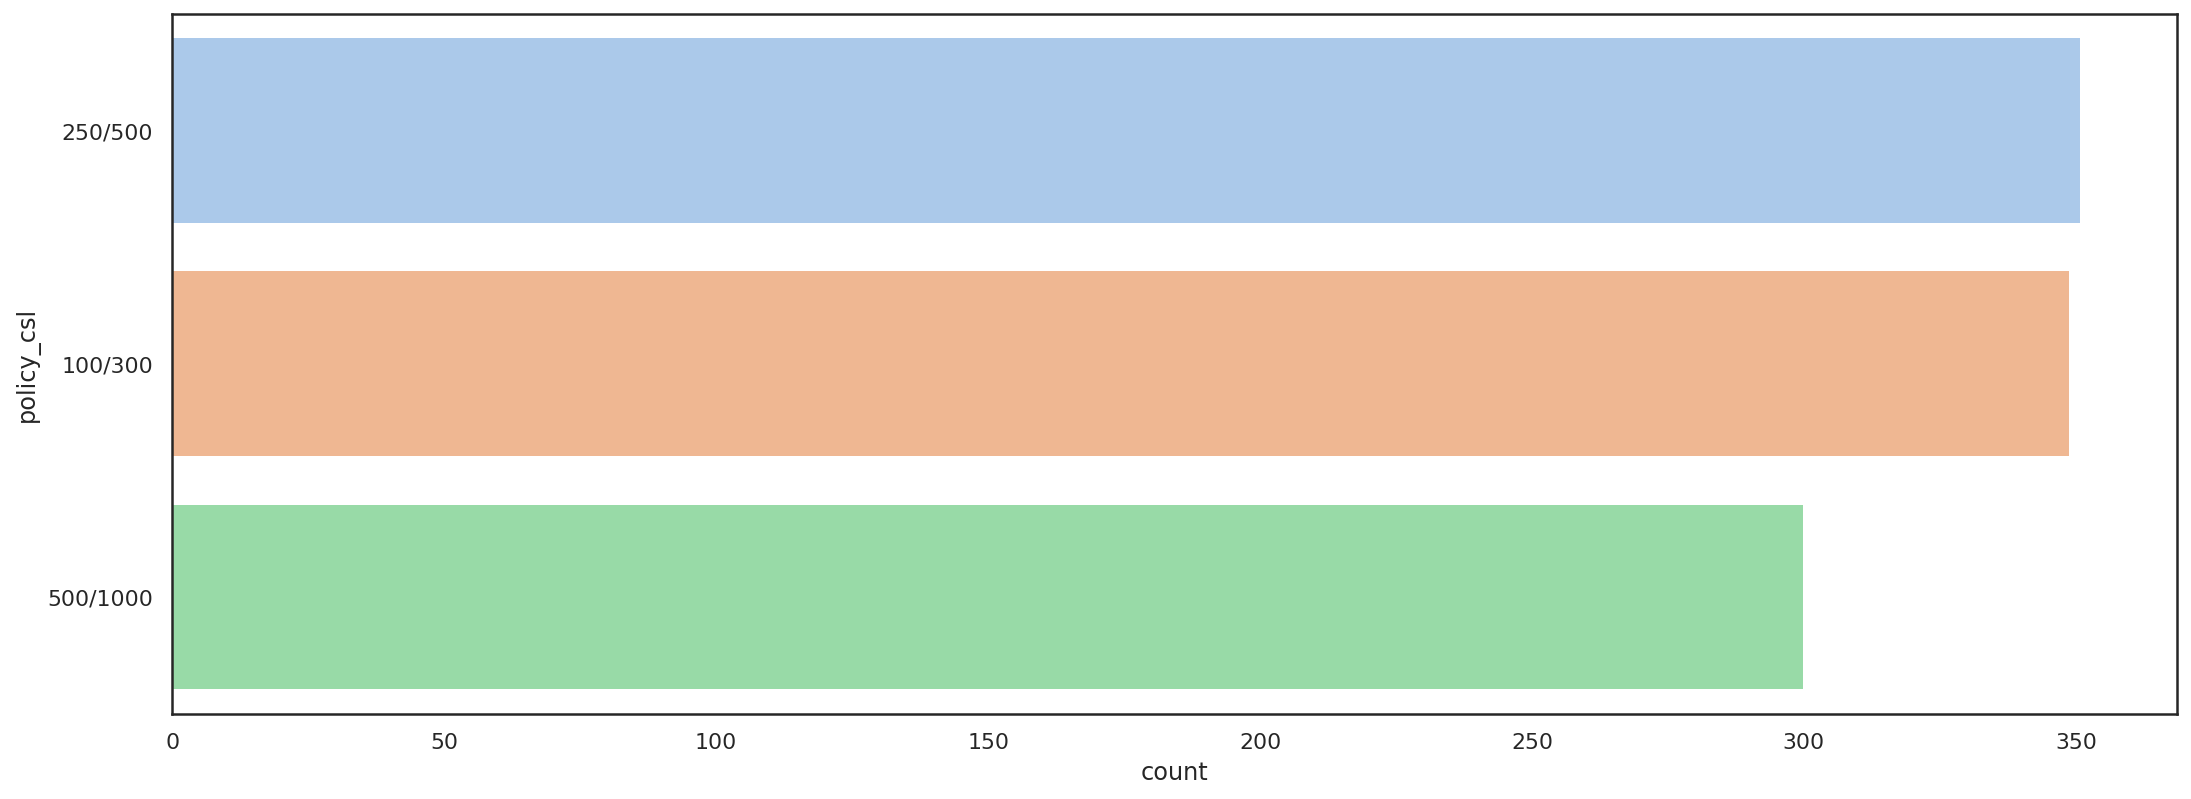

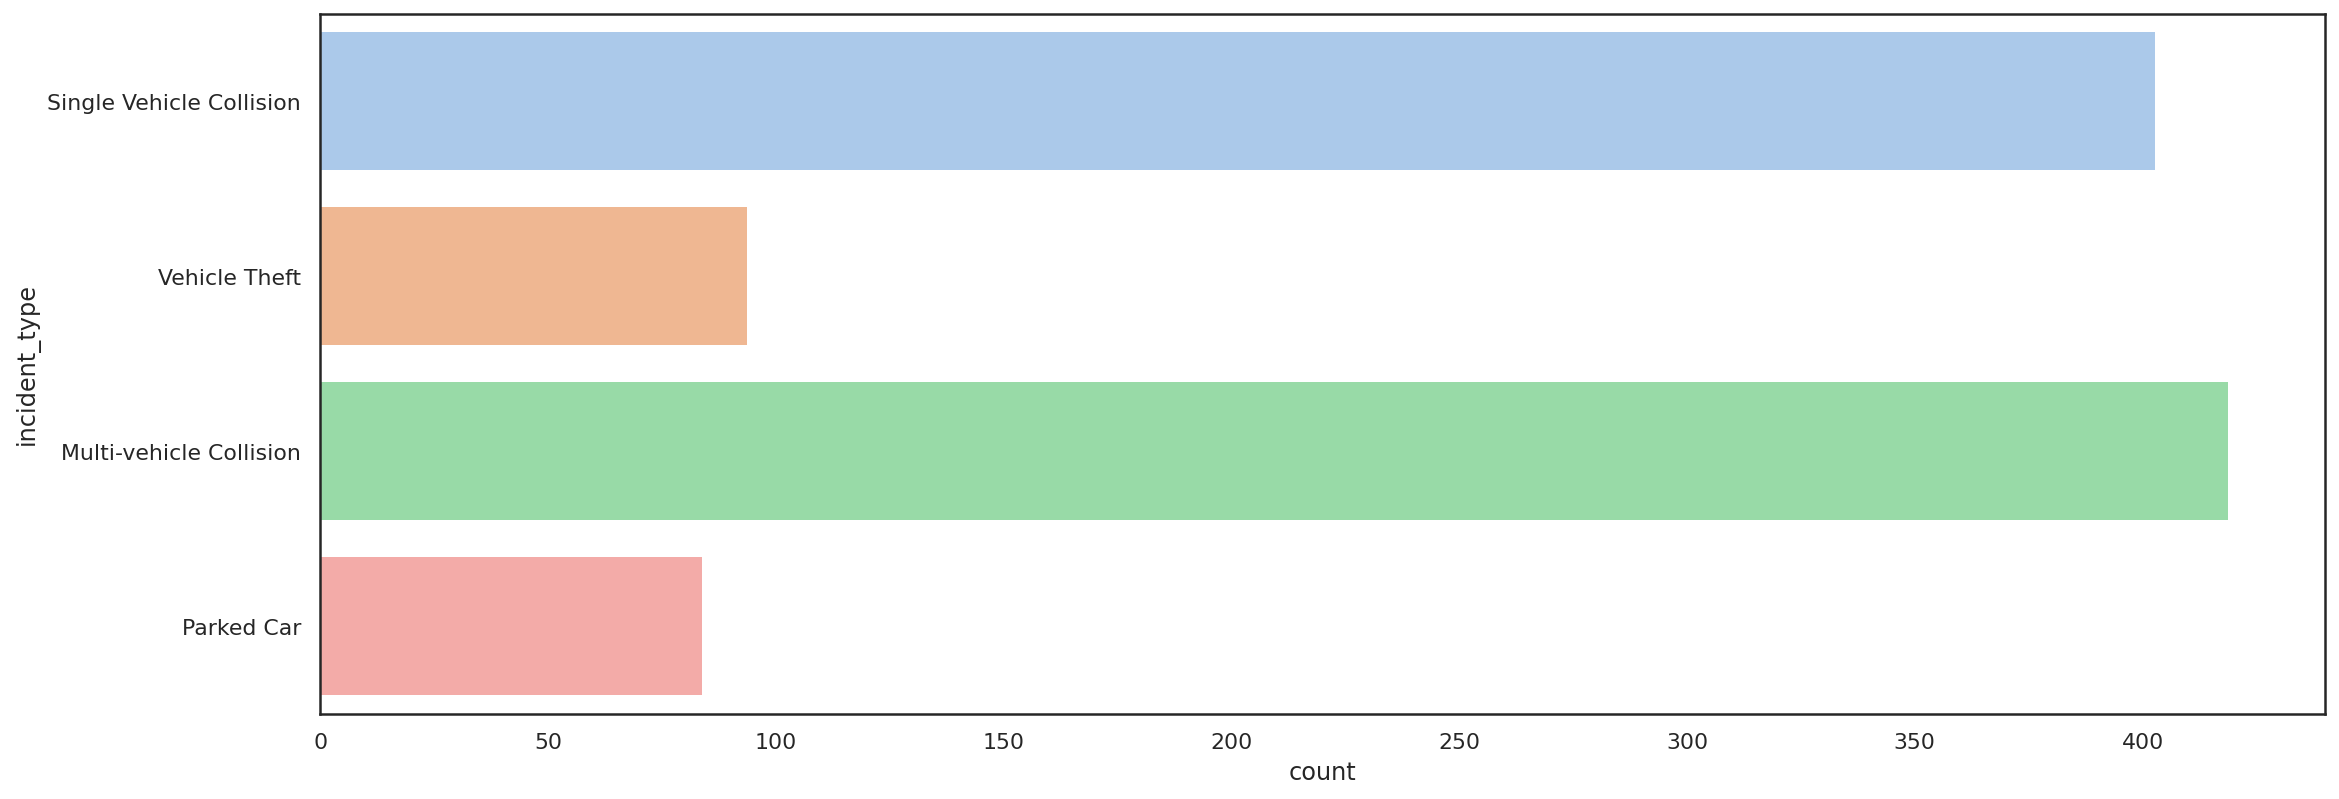

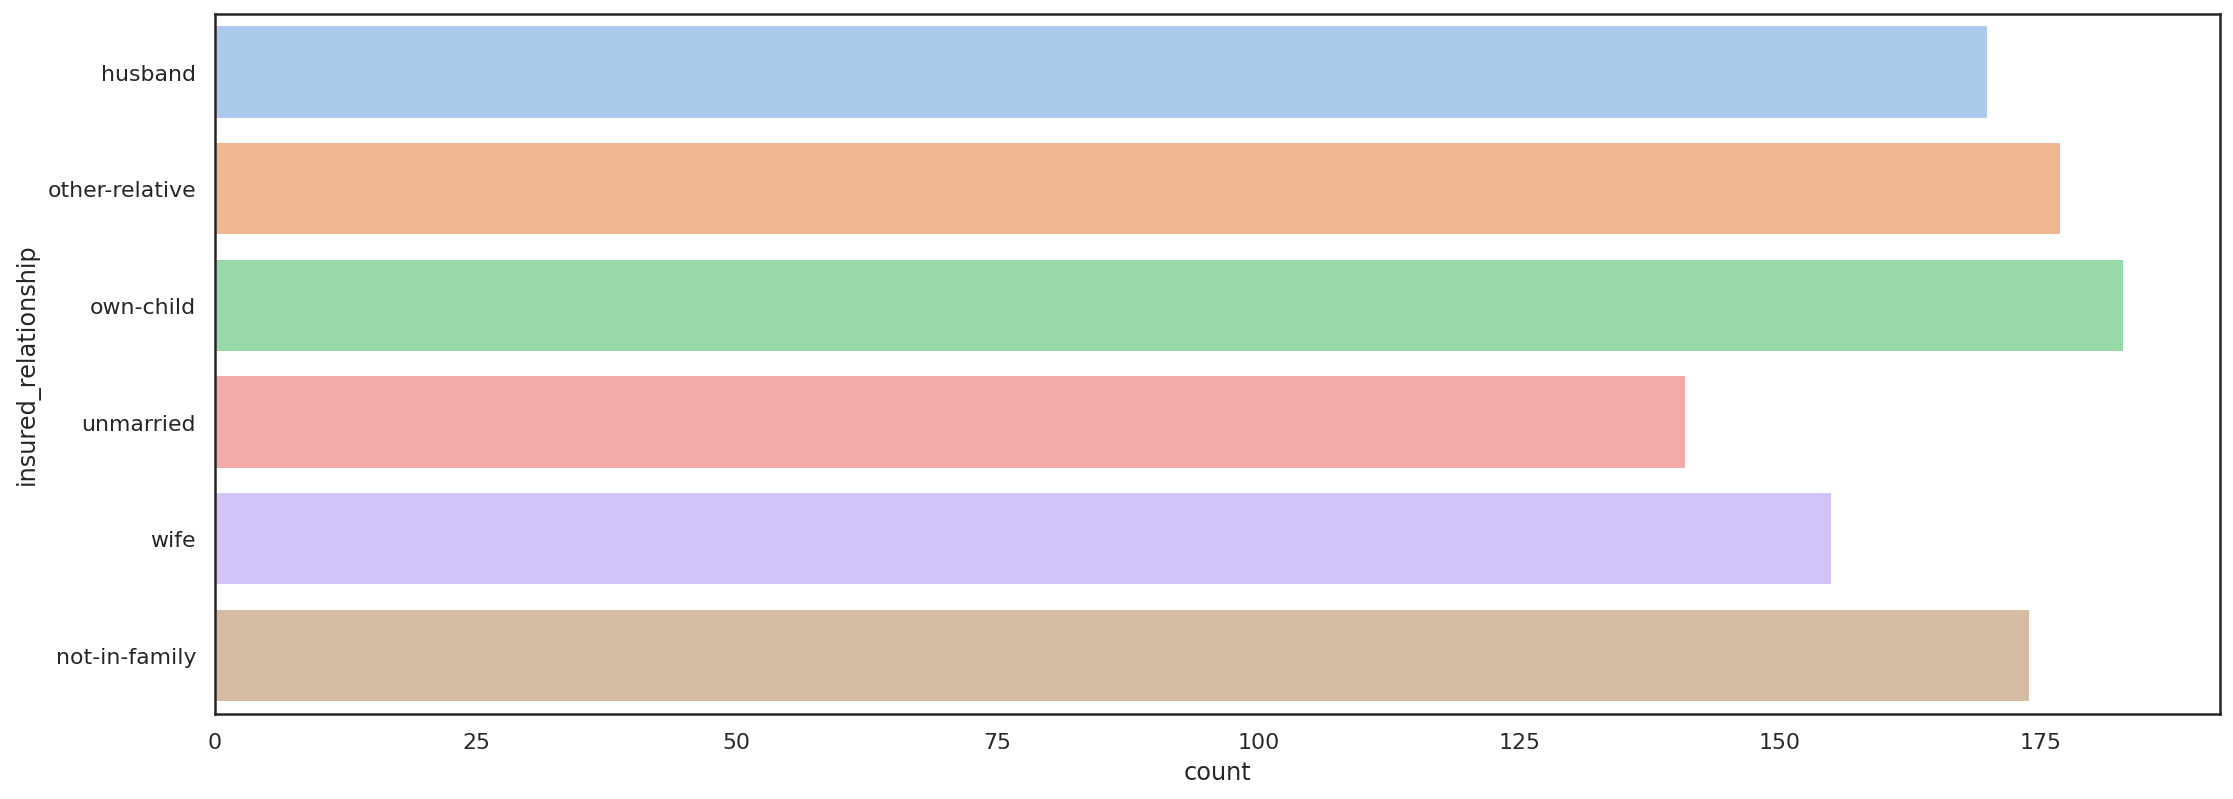

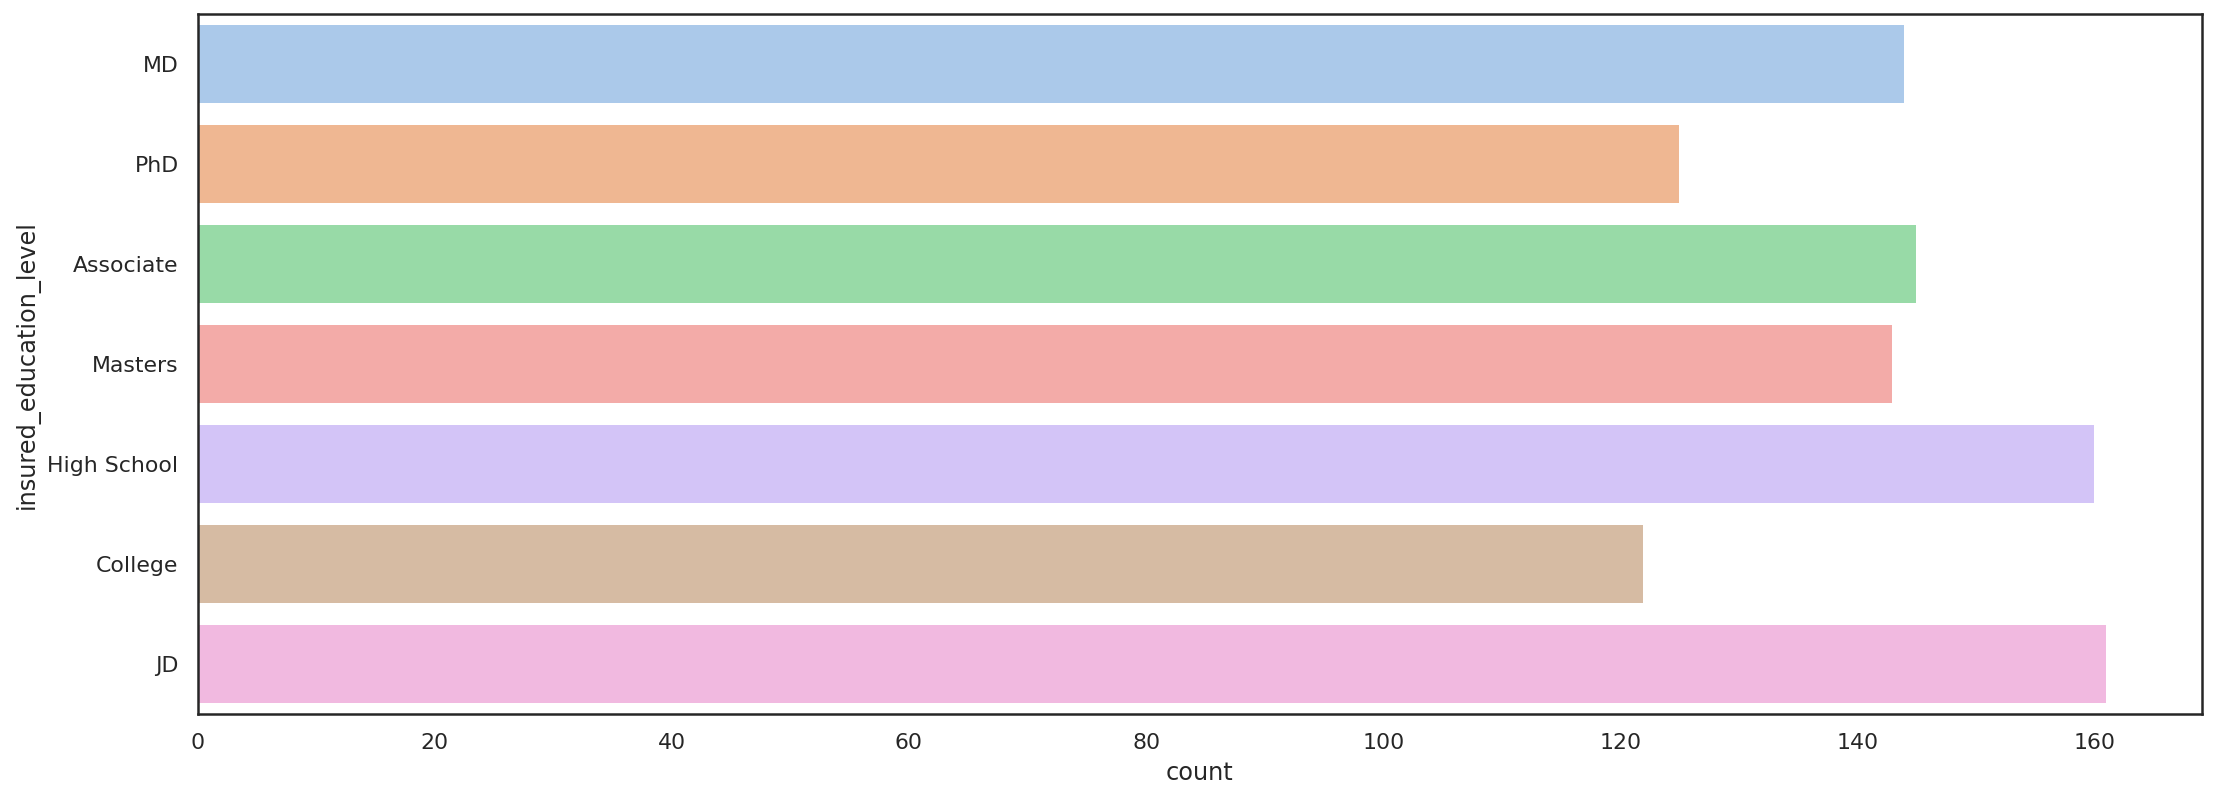

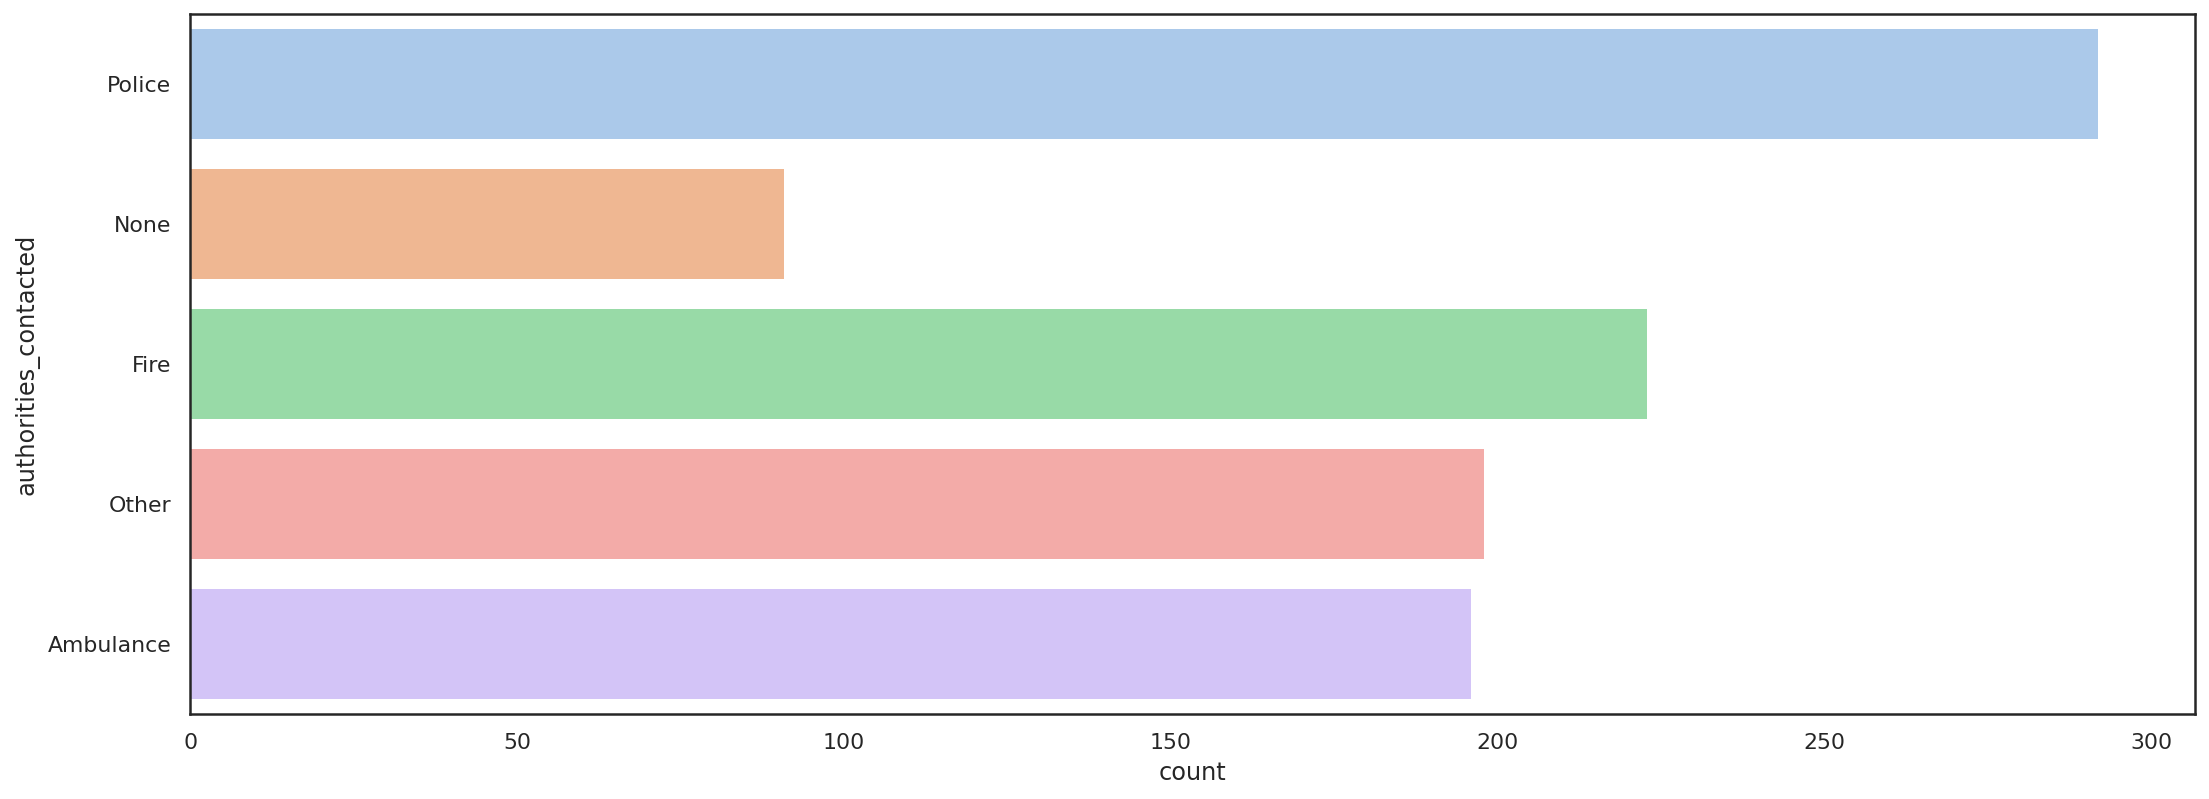

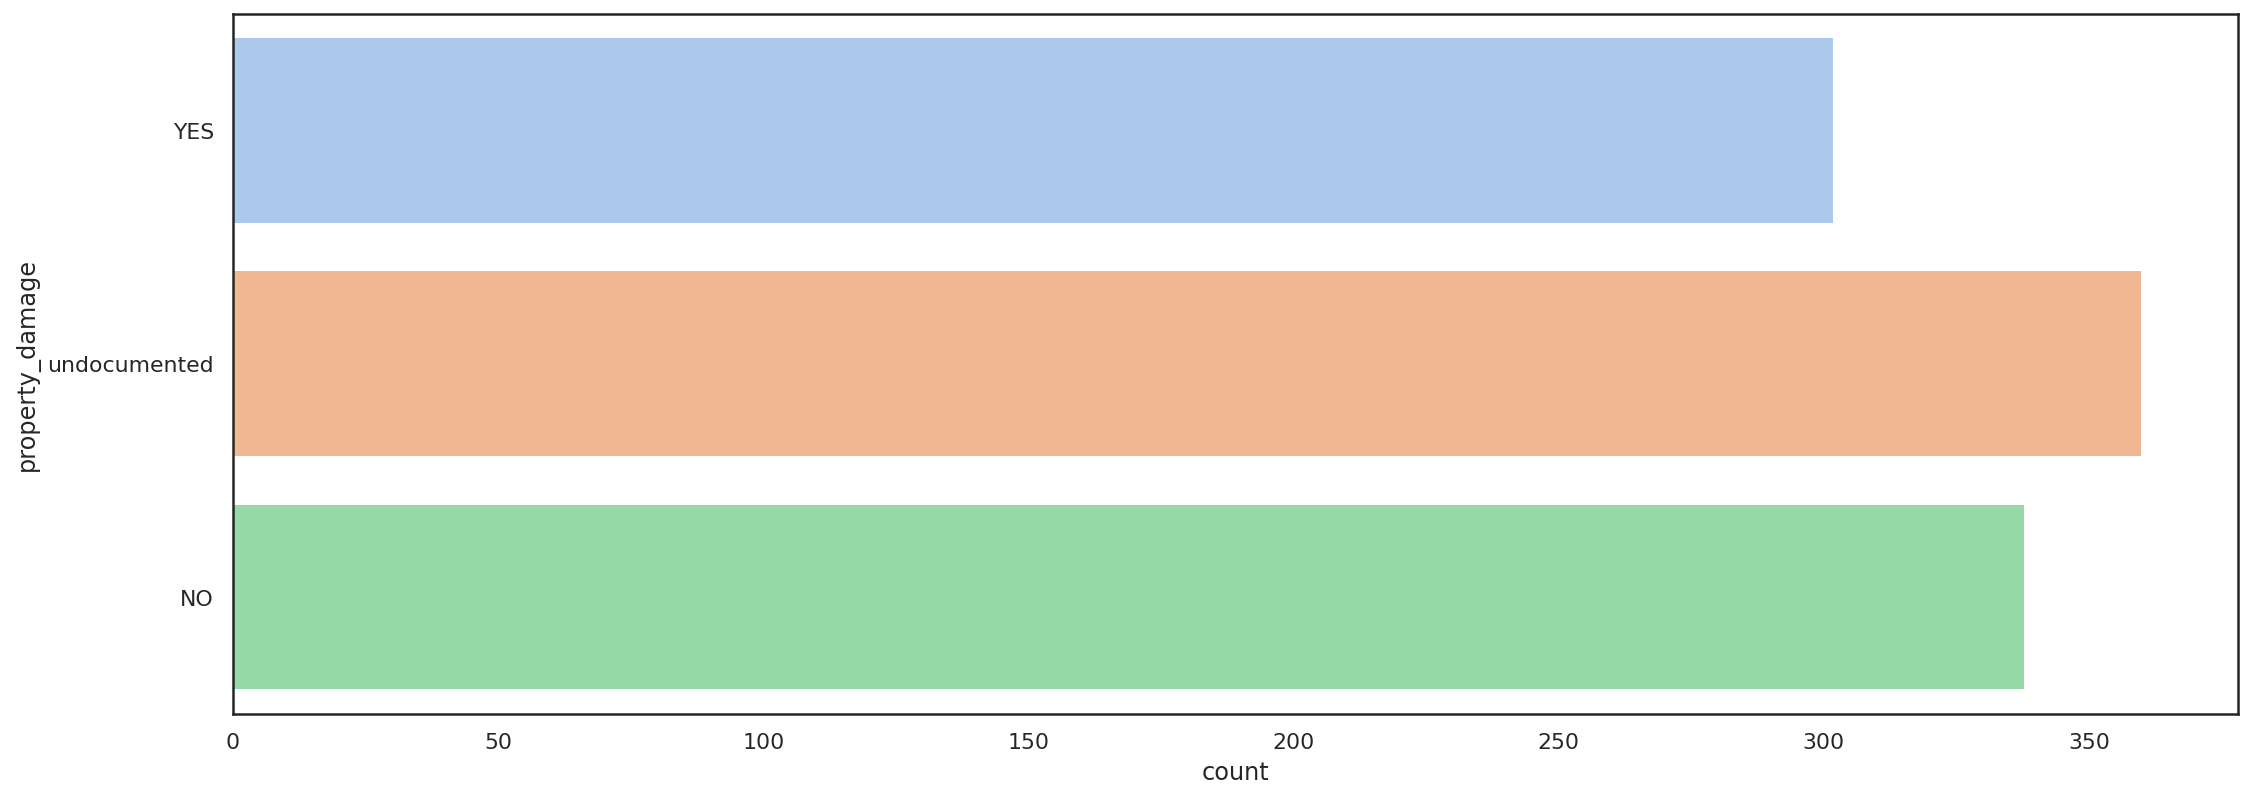

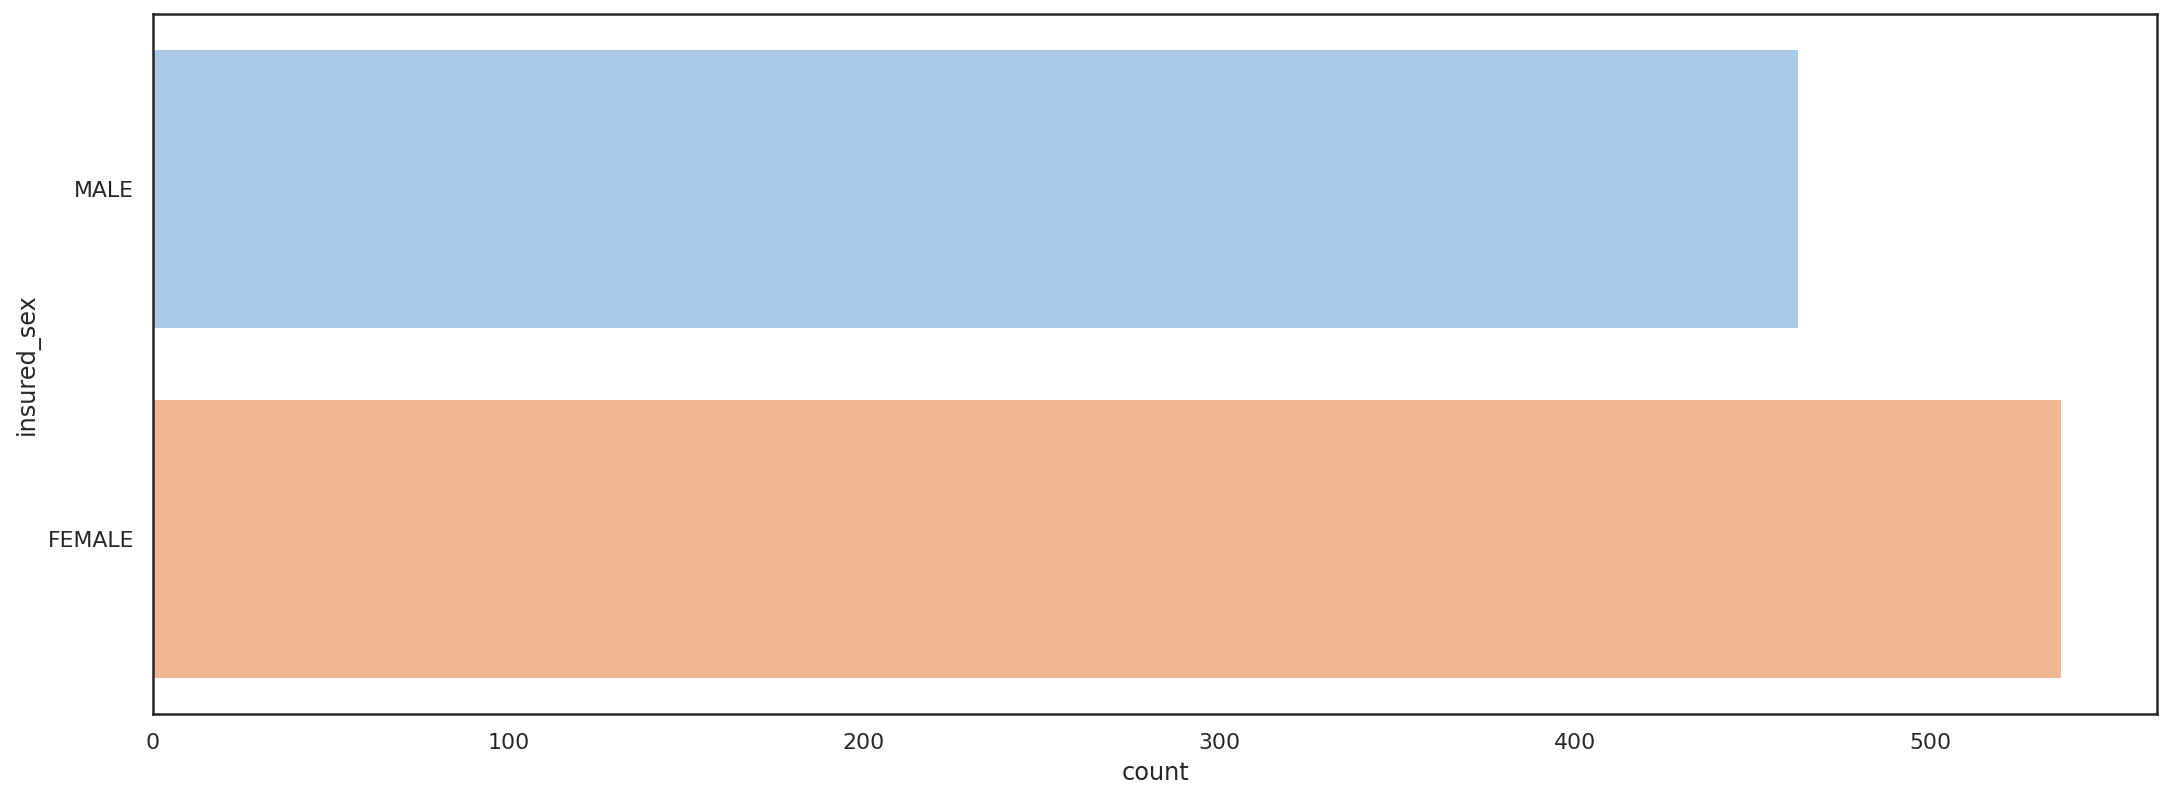

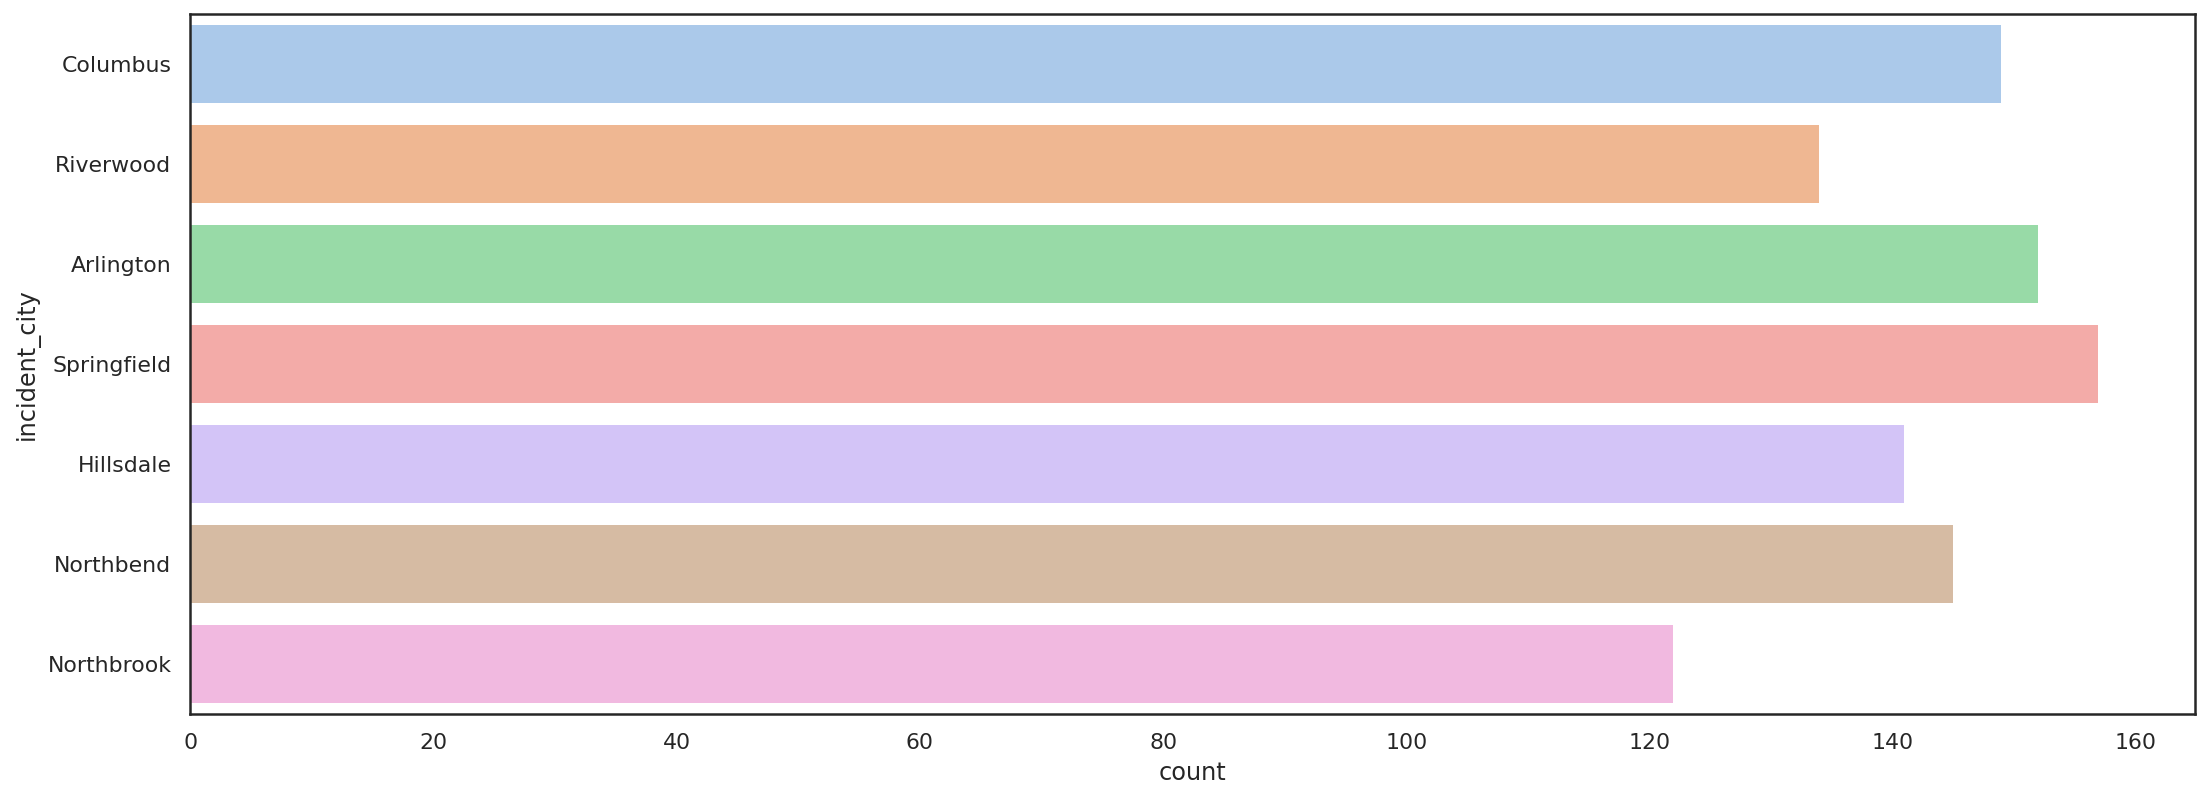

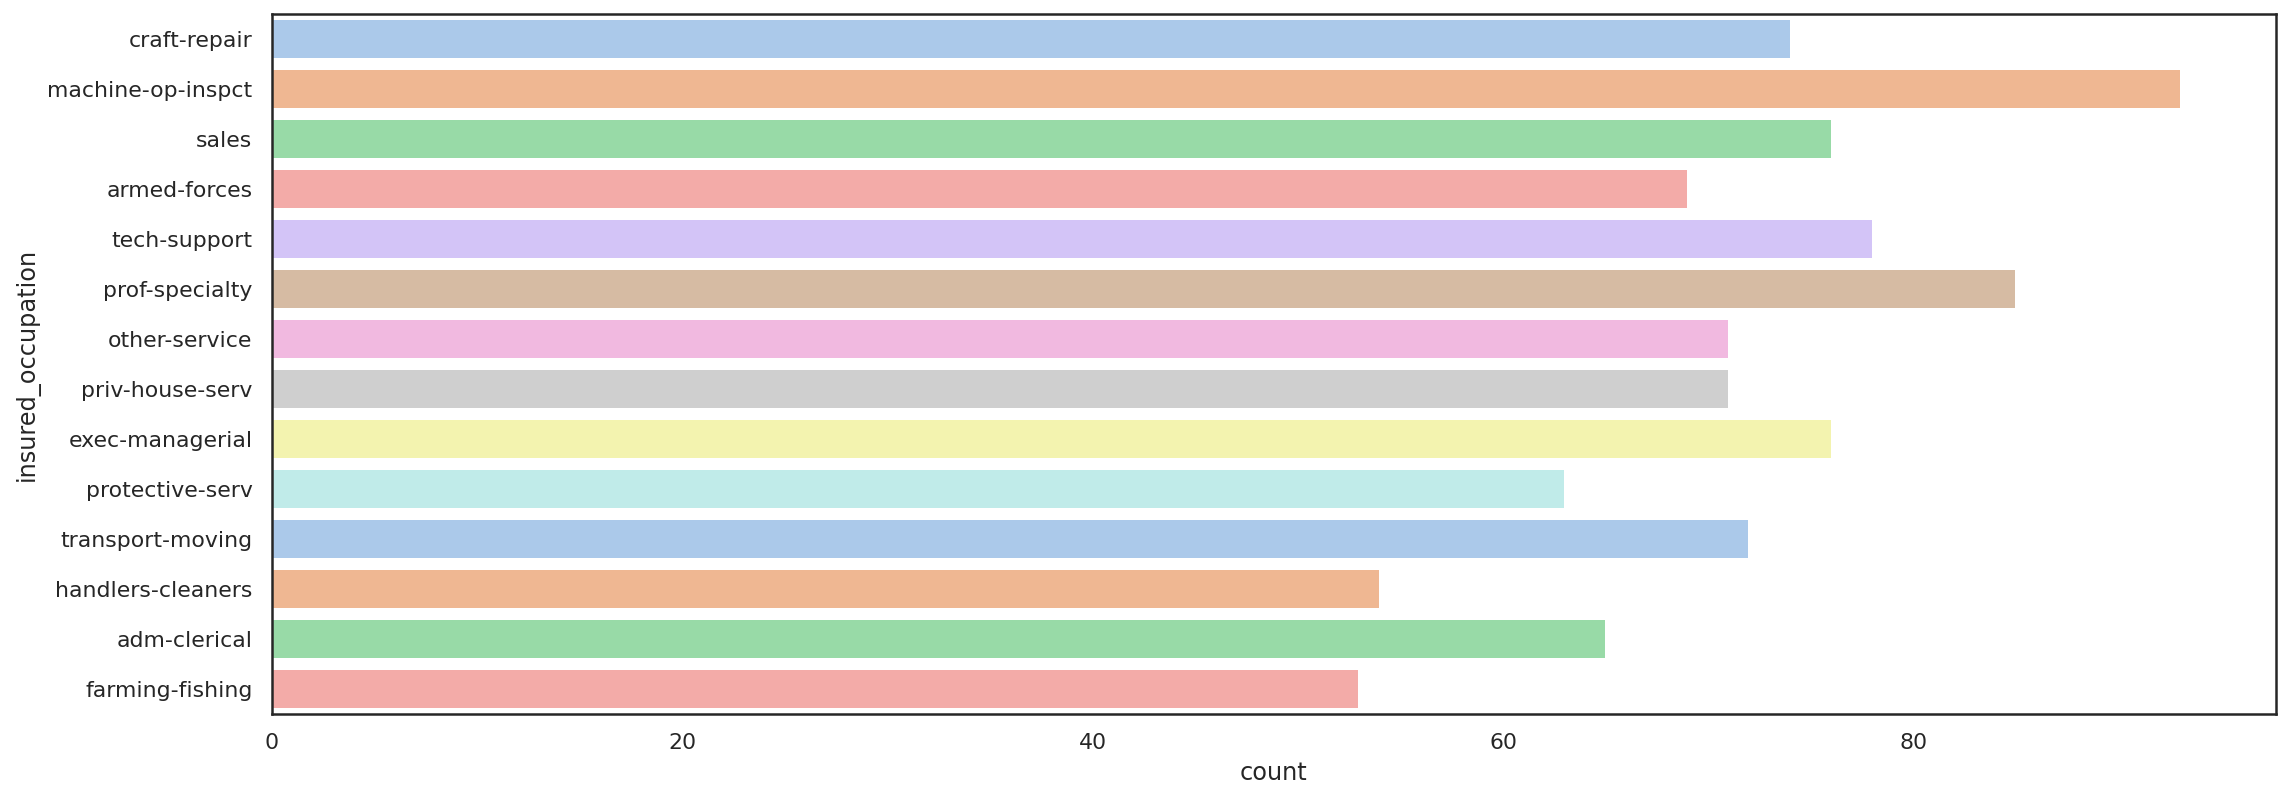

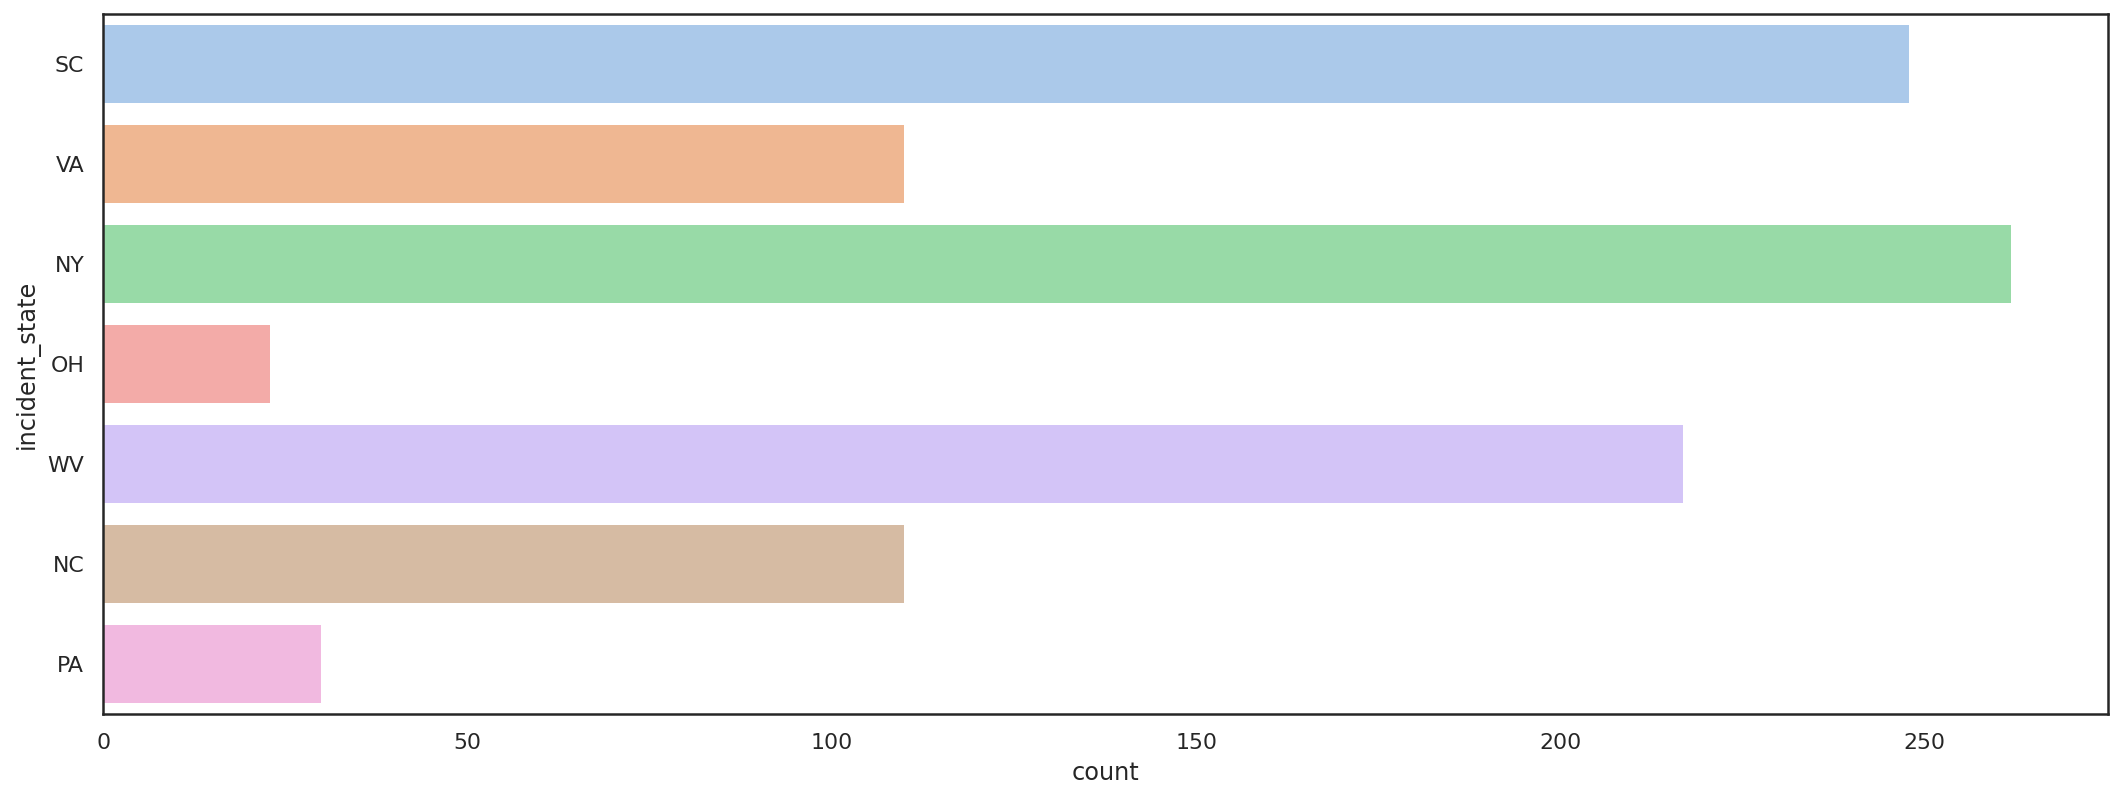

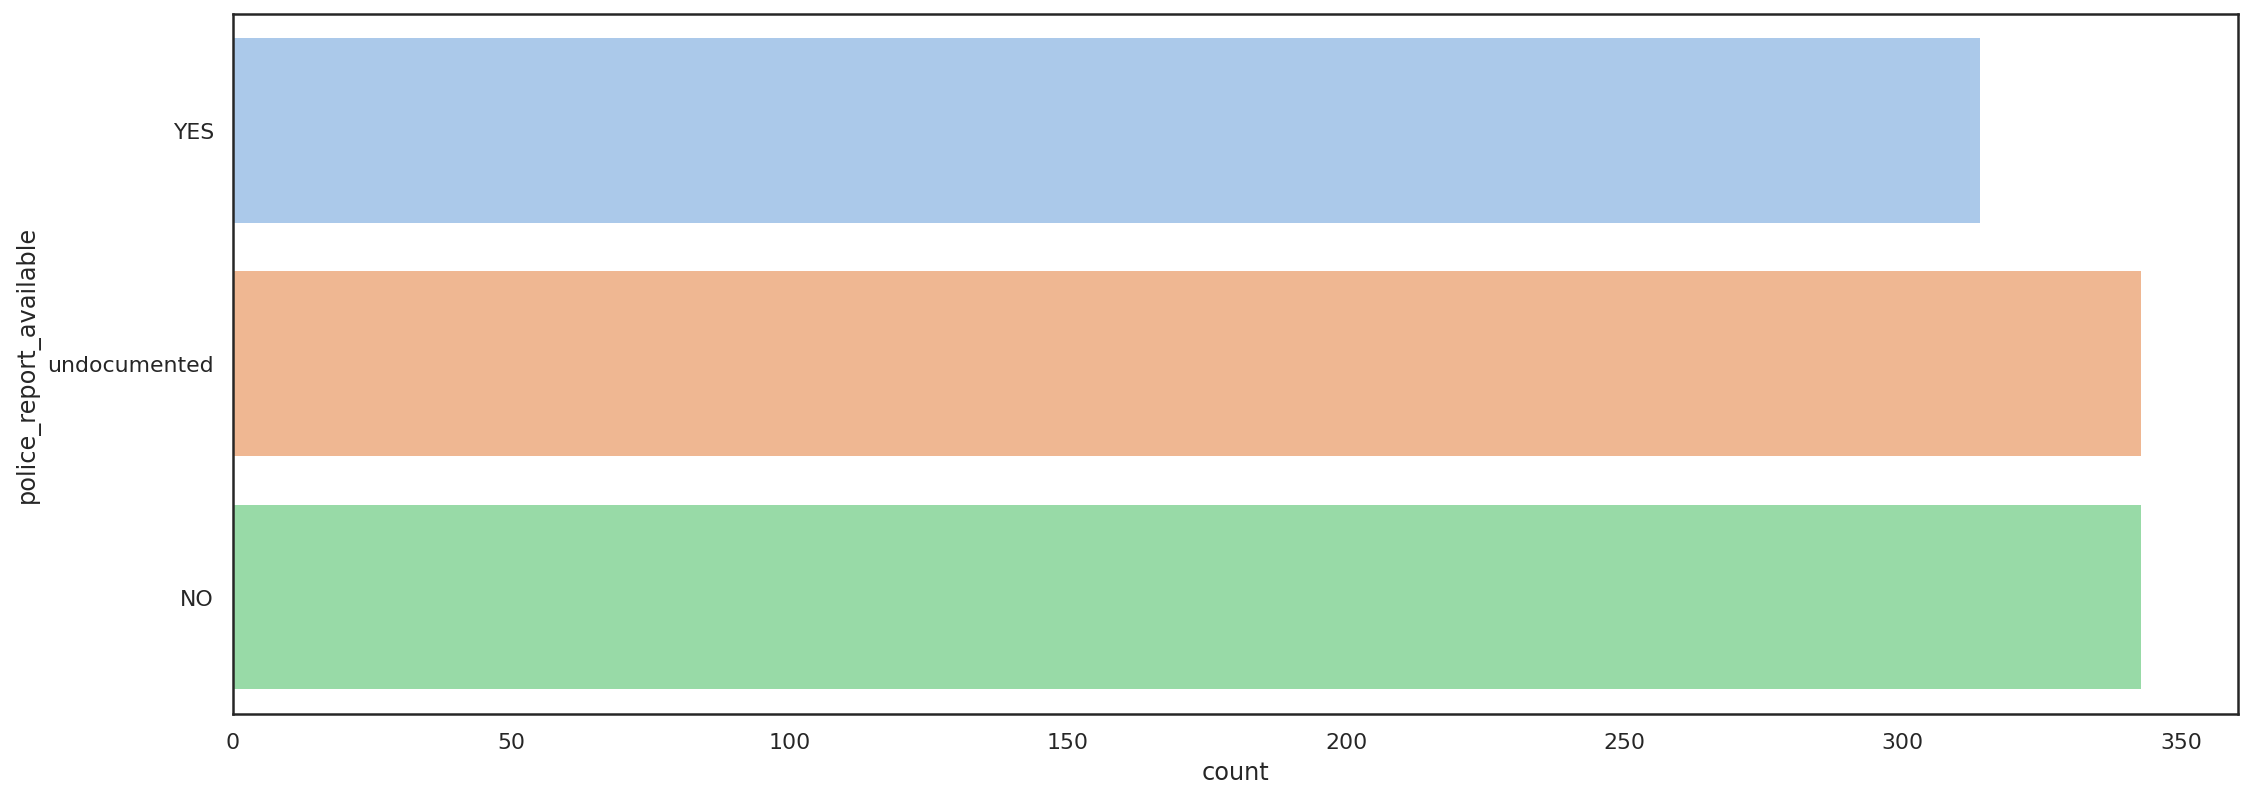

In [ ]:
#countplot of discrete var , 

for i, name in enumerate(data[nom_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(y=name, data=data, palette="pastel")

Nominal variables' counts were visualized with bar plots. I sum up some observations in point: 

- **Authorities_contacted:** Police are the most frequently contacted followed by the fire brigades. 
- **Auto_make:** apart from Honda (least), most are relatively even. 
- **Collision_type:** the distribution looks evenly spread across the categories. Most are rear collisions. Smallest groups are the undocumented collisions. we can explore which collisions will be the most expensive and have the most frauds.
- **Incident_city:** relatively even with Springfield and Arlington being the highest. 
- **Incident_type:** very few incidents are by theft/parked car. Most are by multivehicle collision and single vehicle collision. We can explore how claims and fraud differ across them. 
- **Property_damage:** relatively even but undocumented damage has the highest numbers

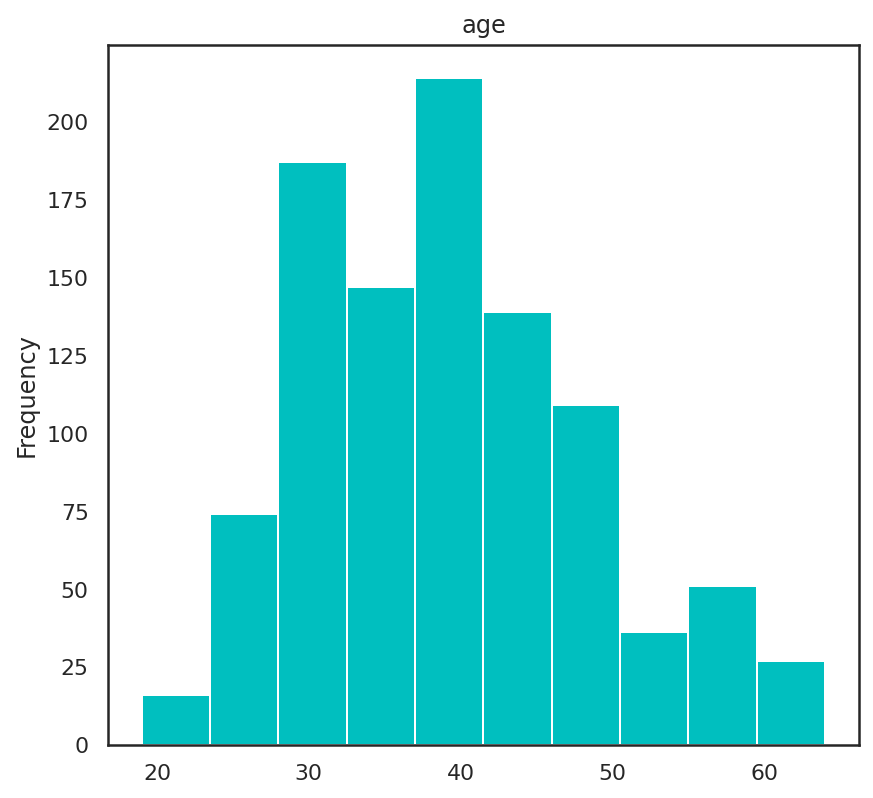

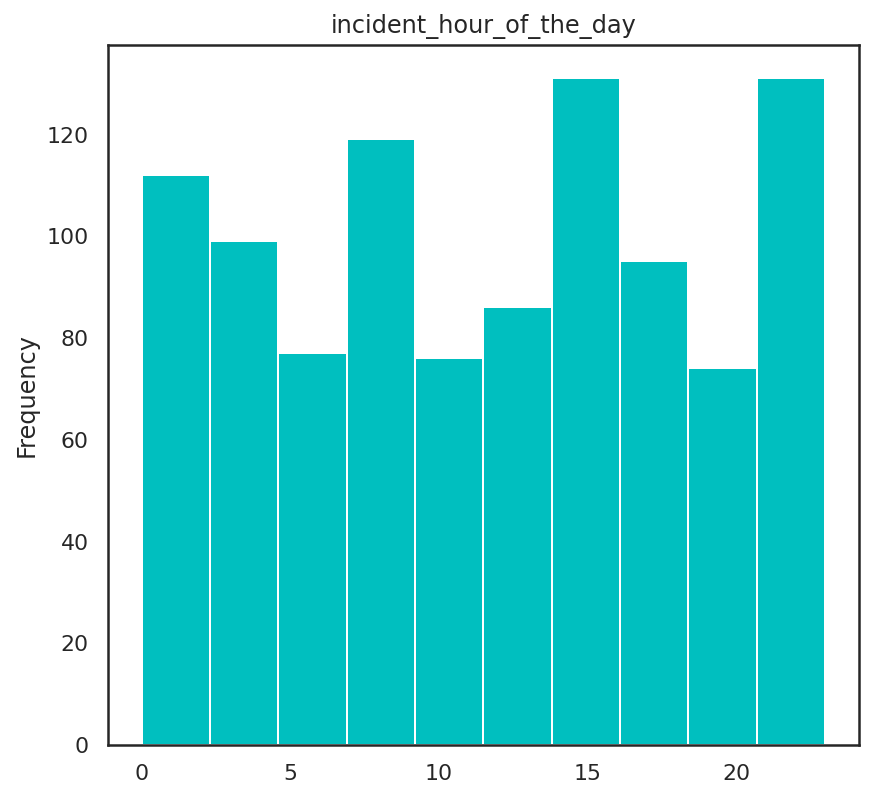

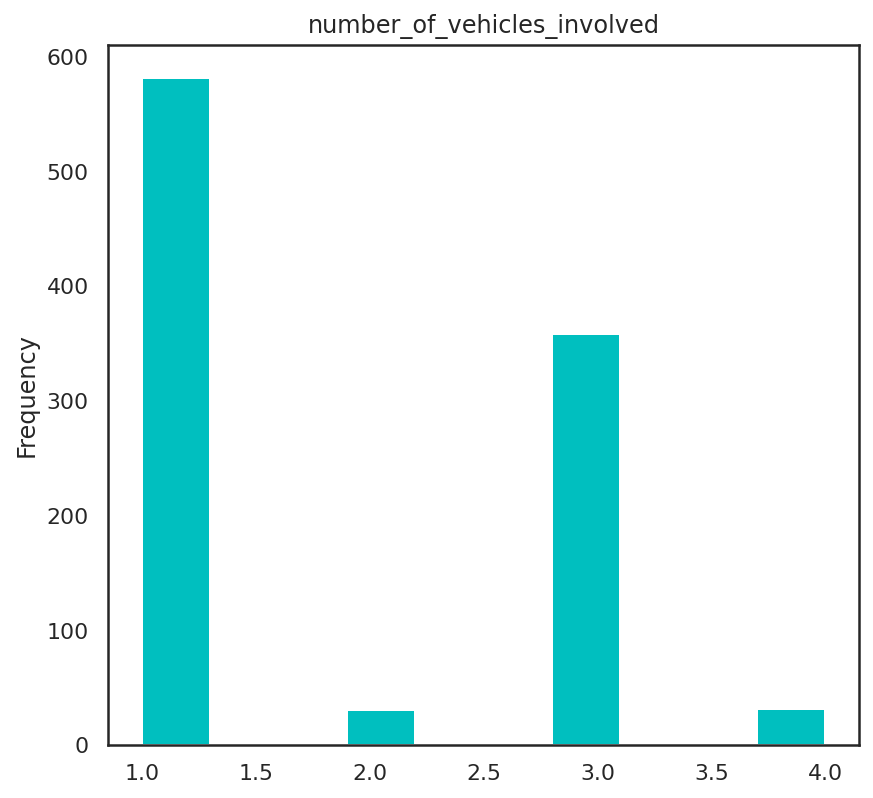

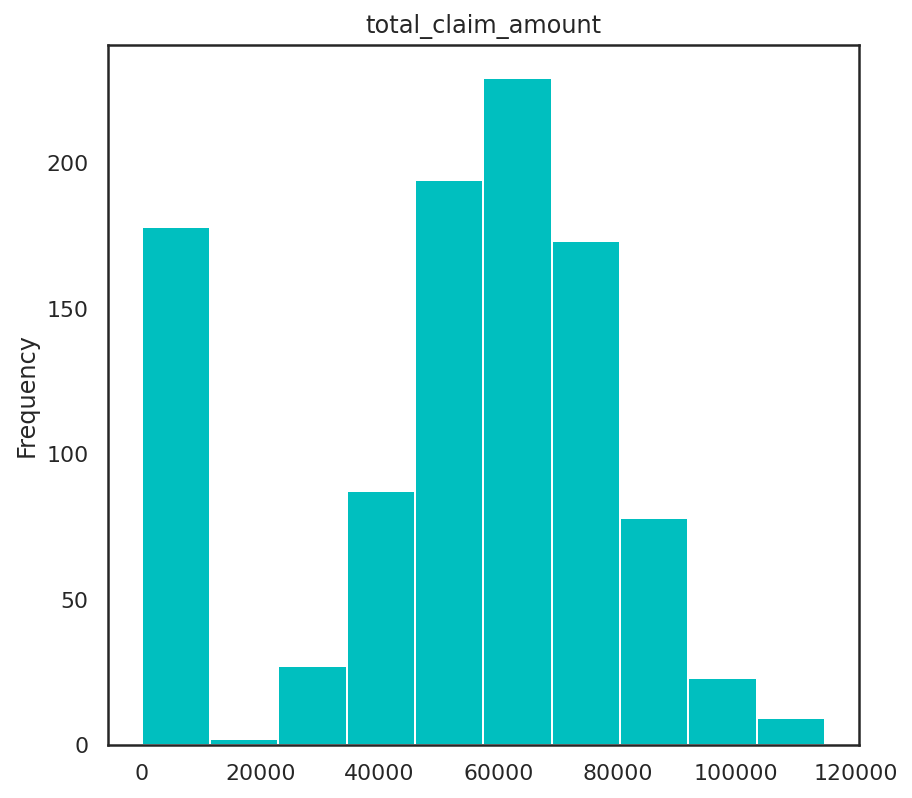

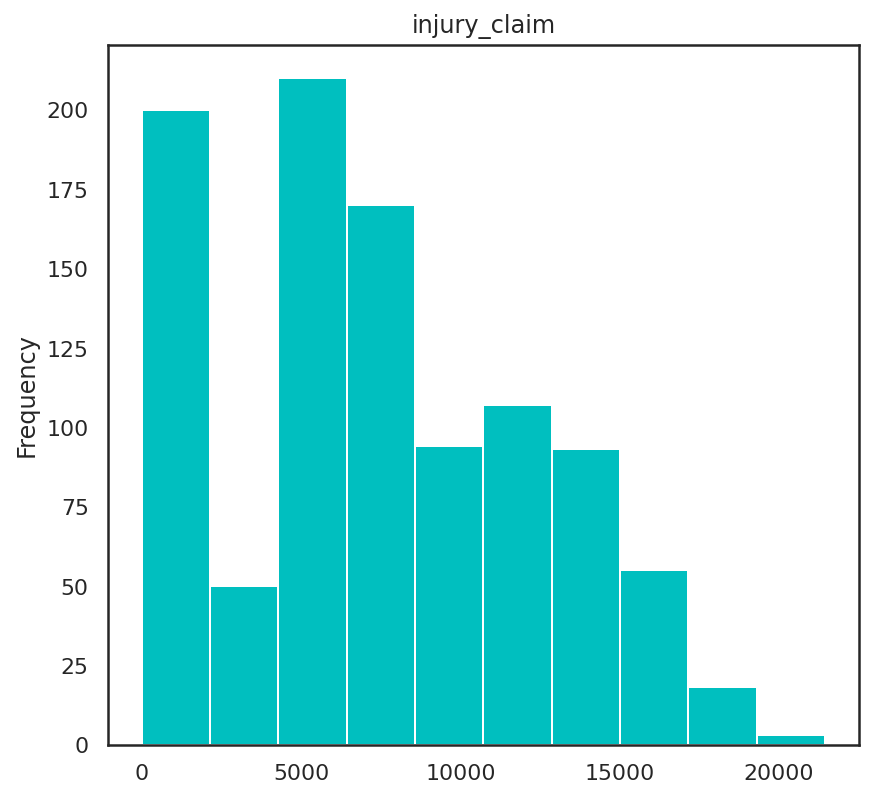

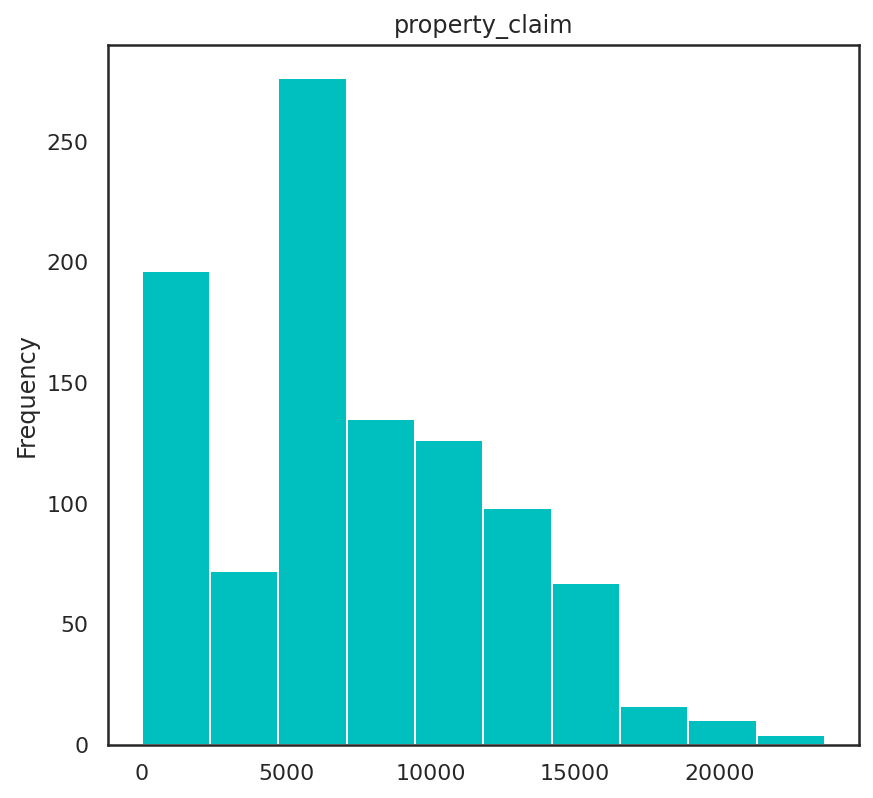

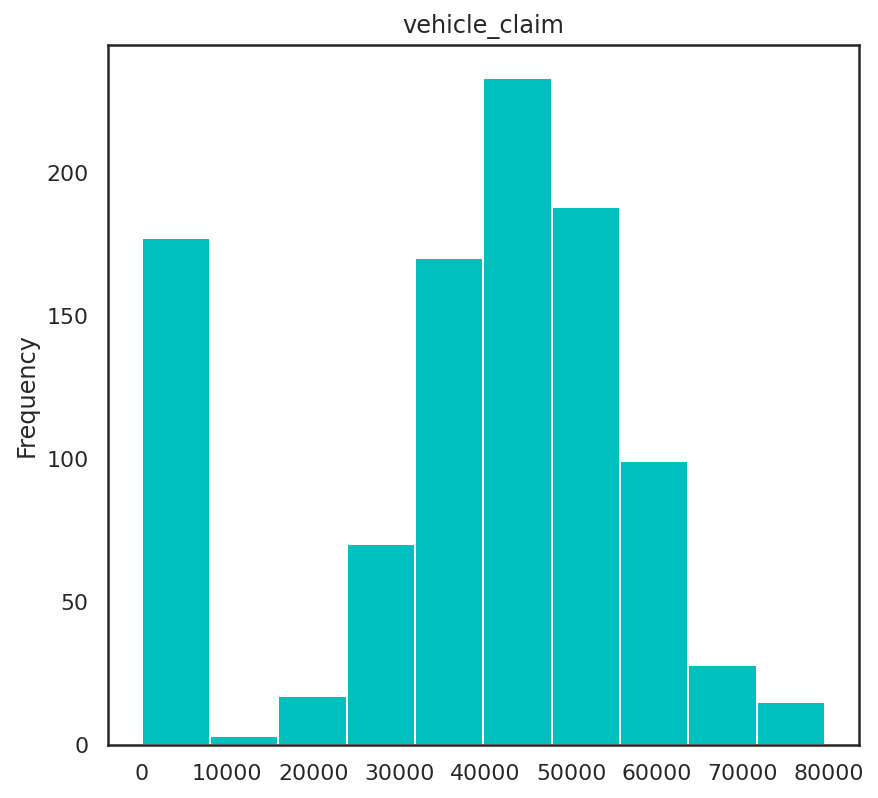

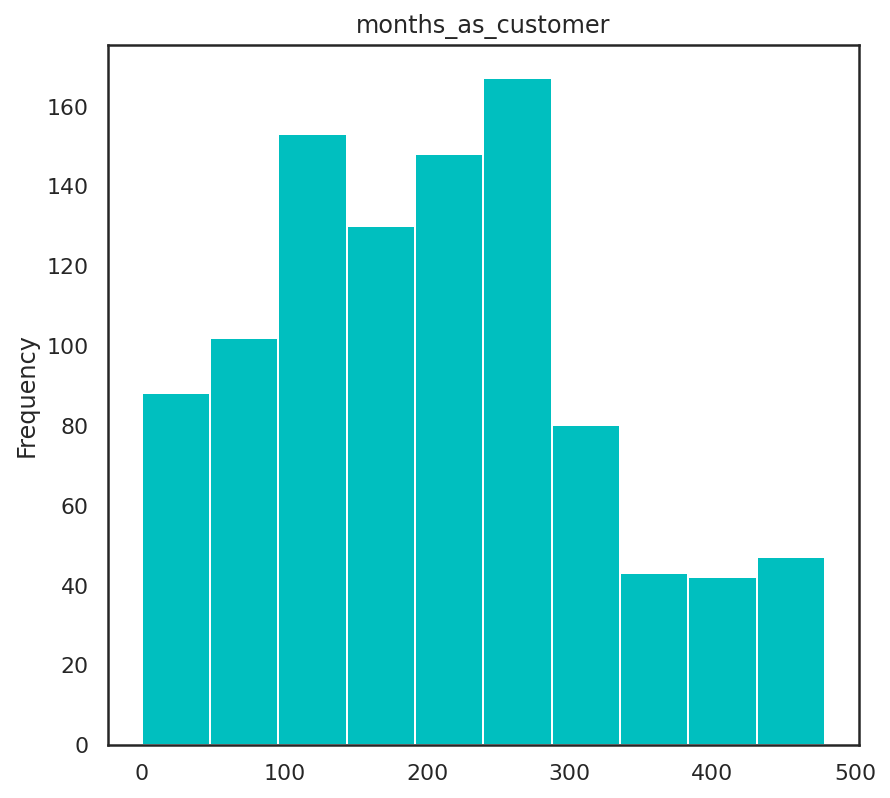

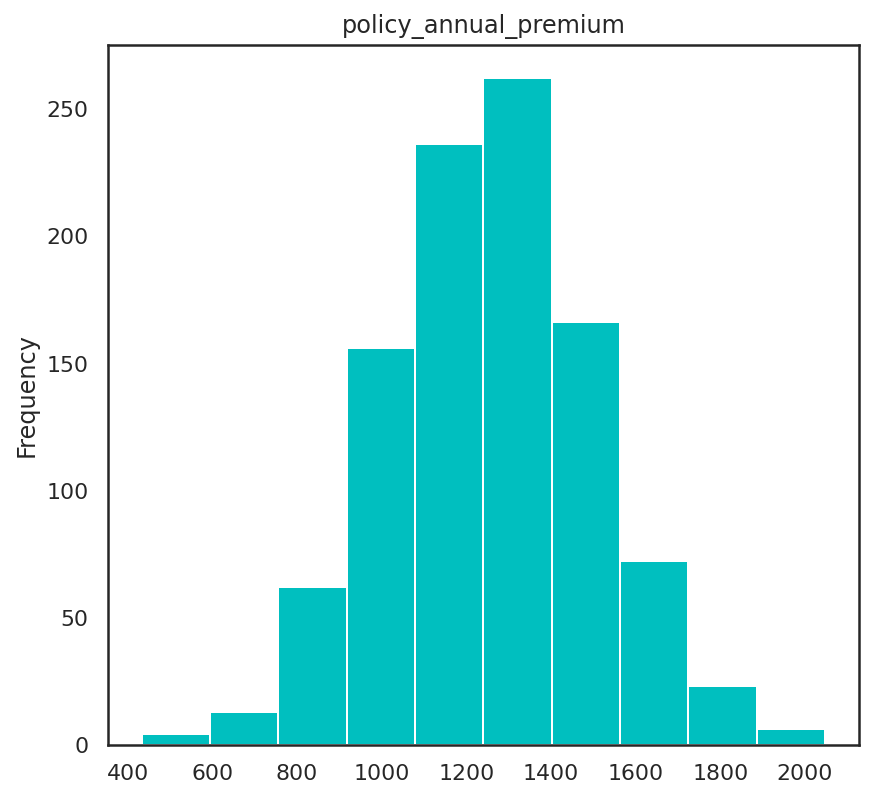

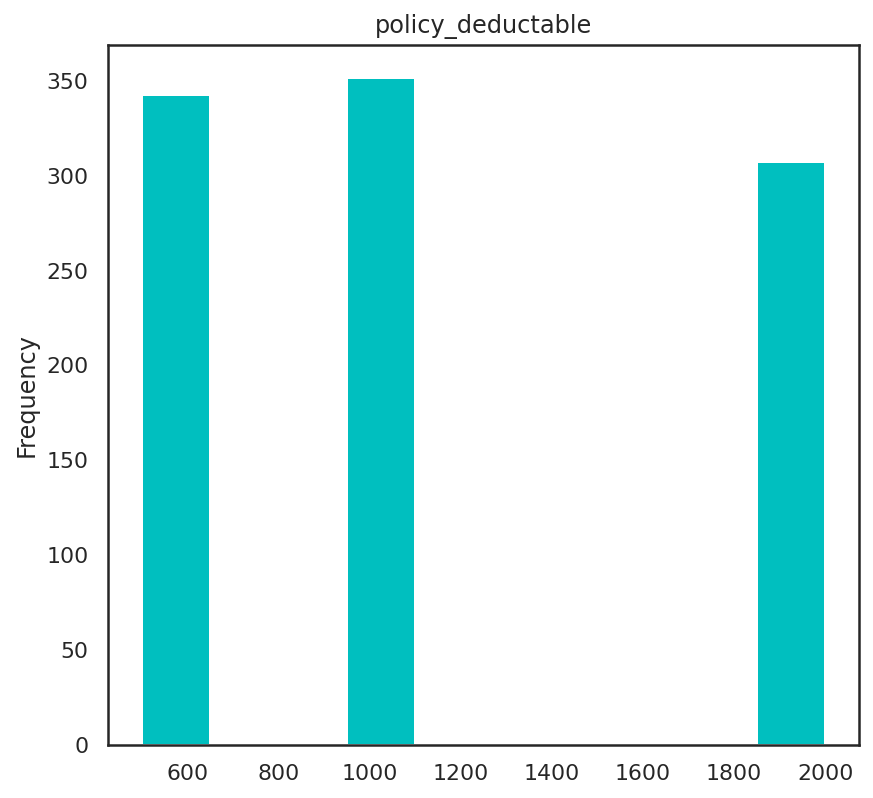

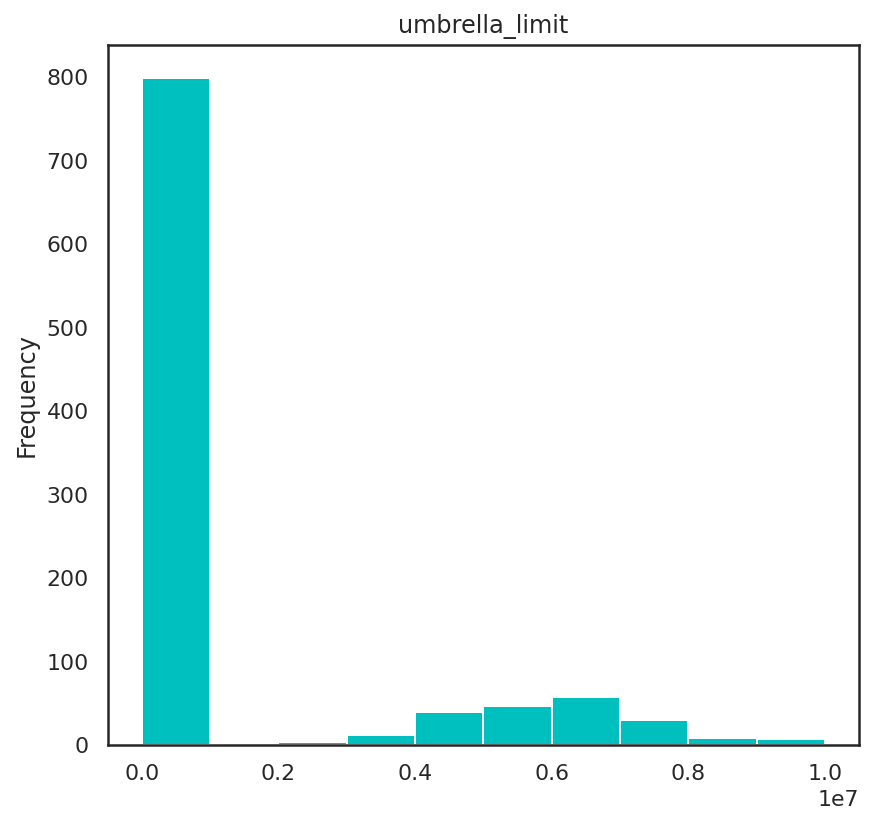

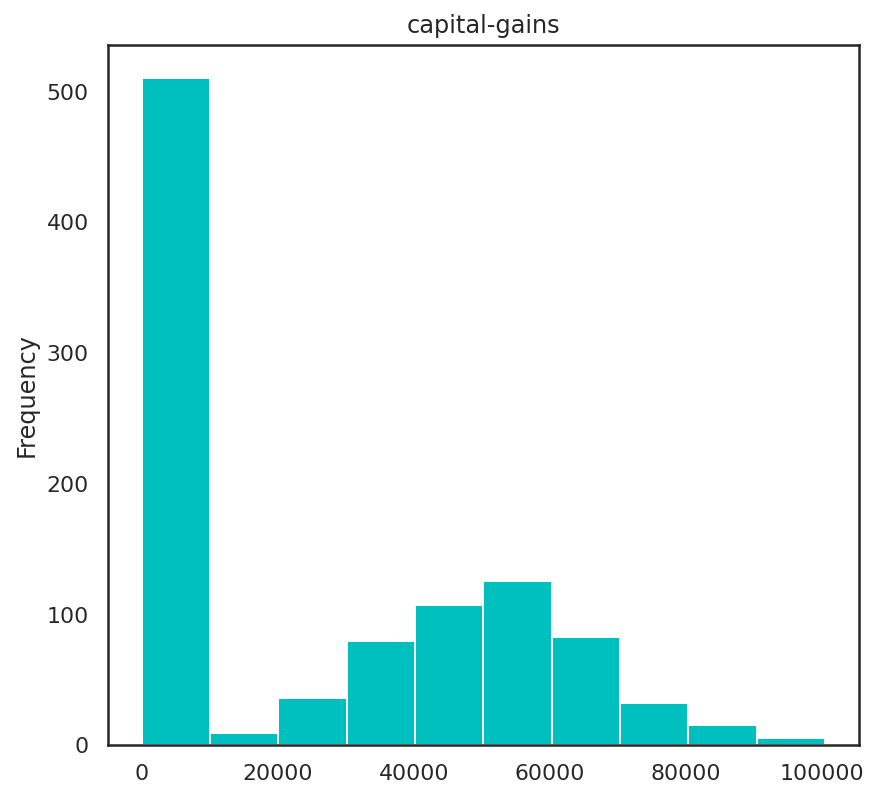

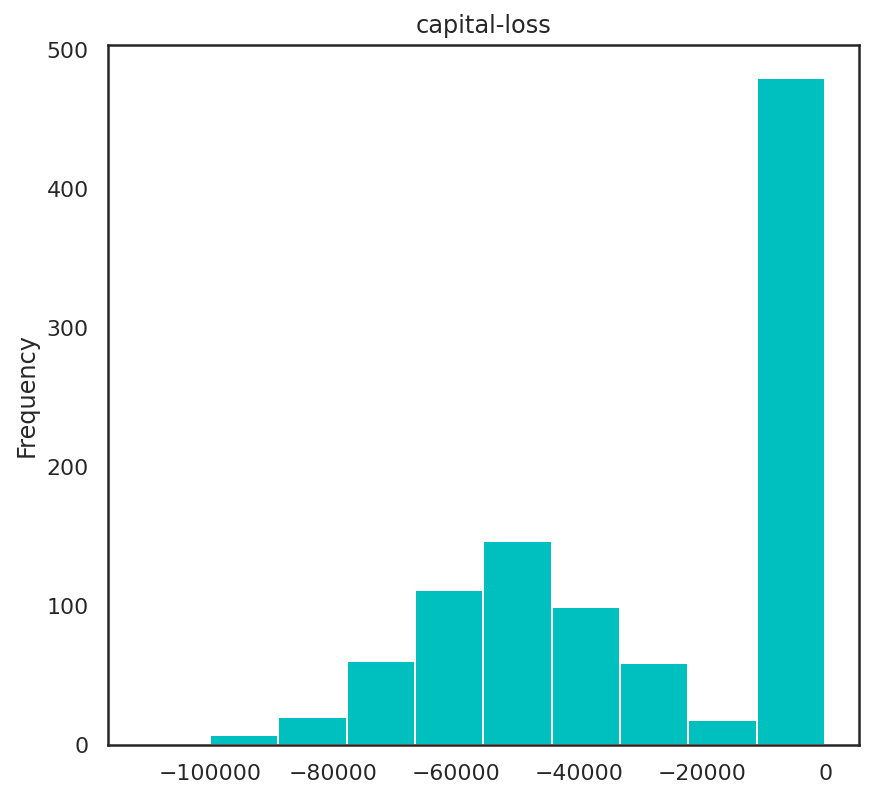

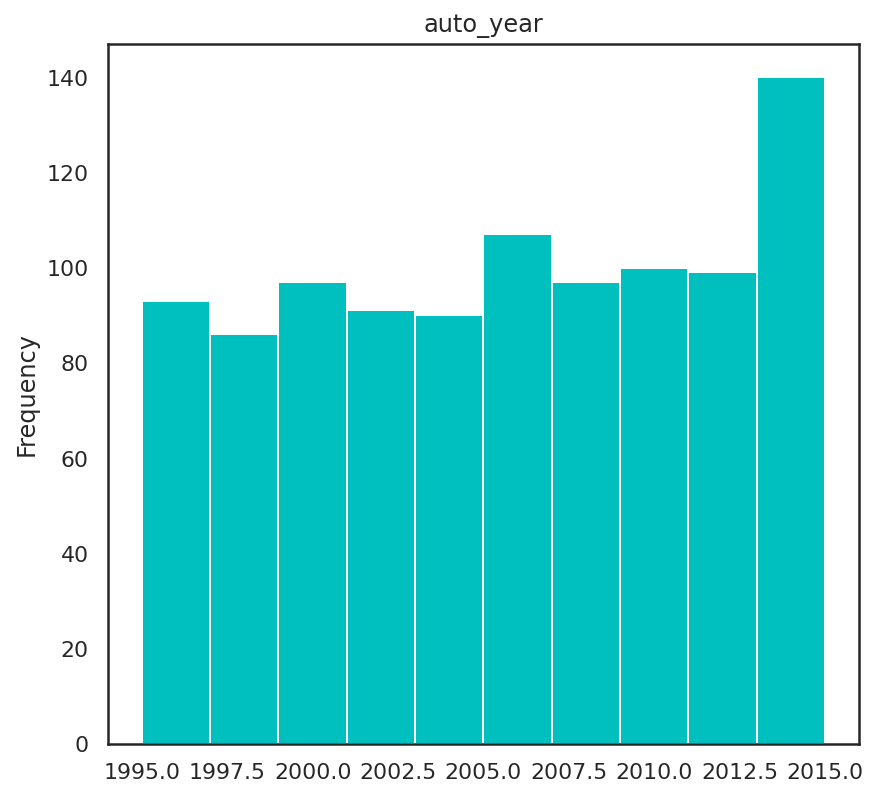

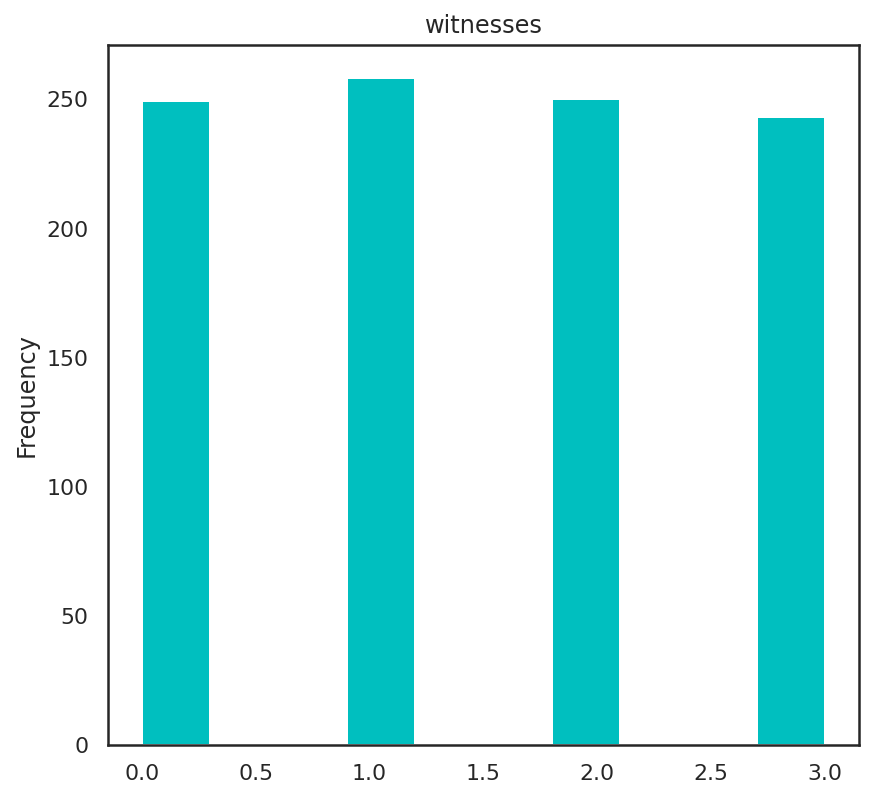

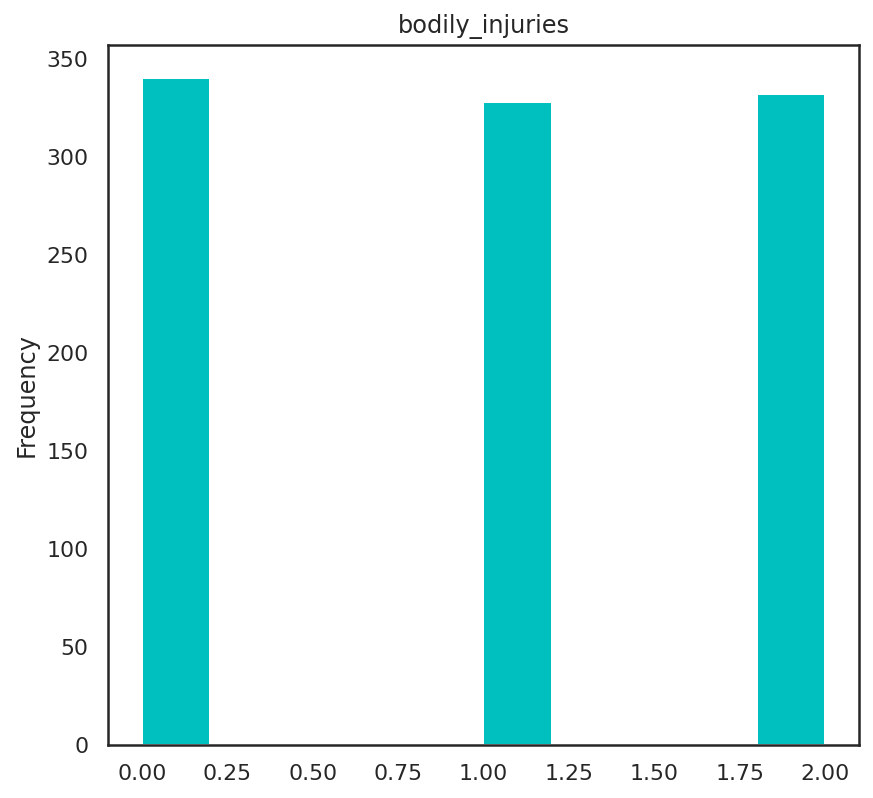

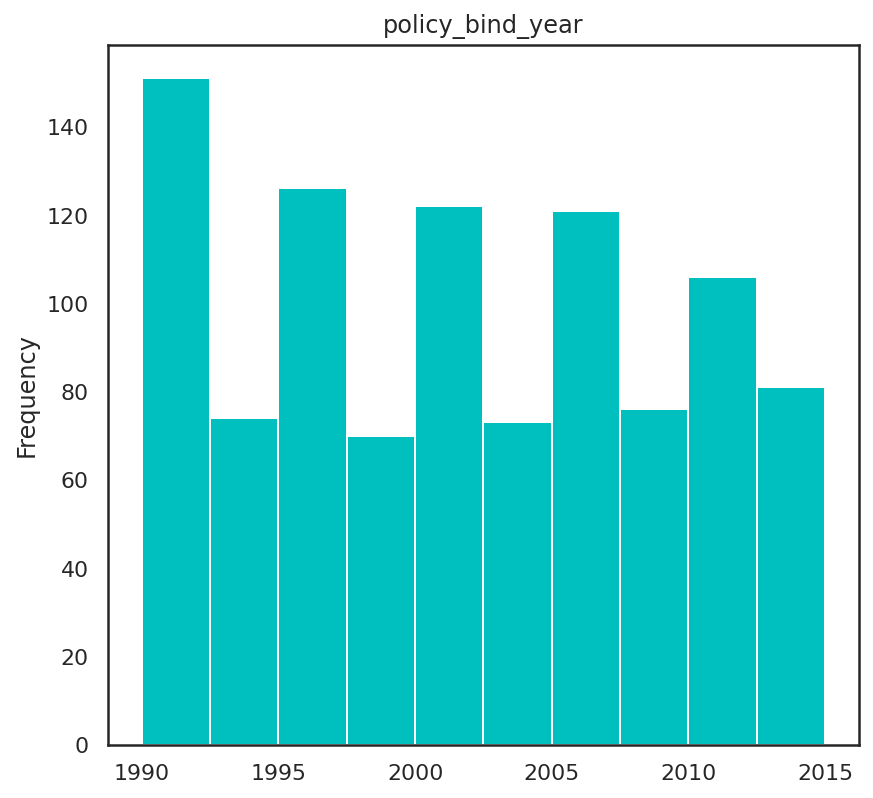

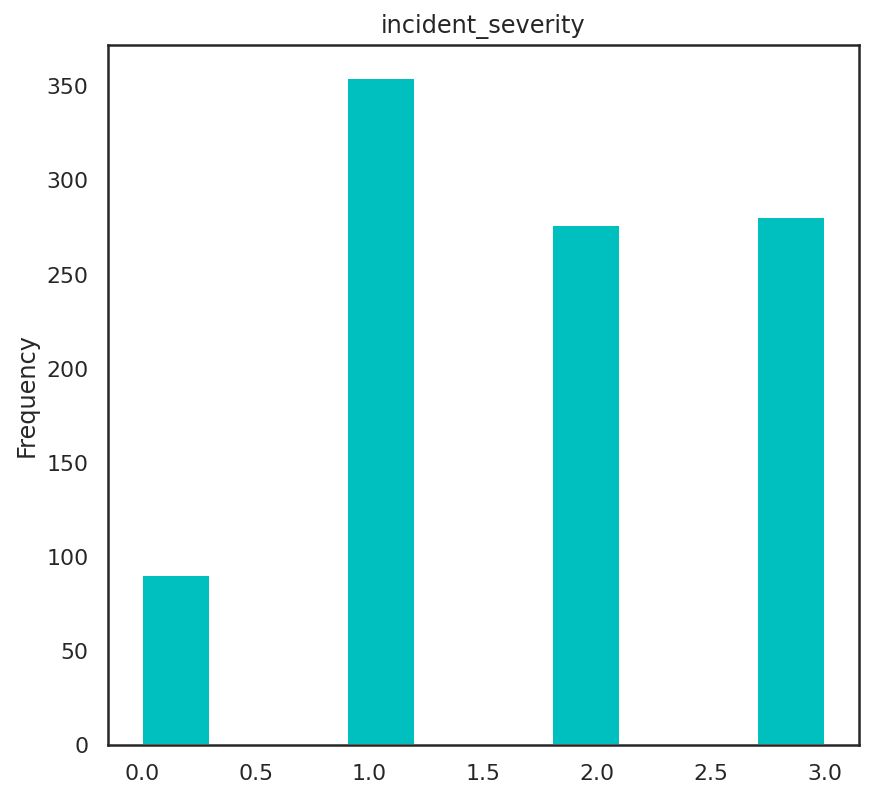

In [ ]:
#distribution of ordinal and continuous variables

for i, name in enumerate(data[cont_var]):
    plt.figure(i,figsize=(6,6))
    data[name].plot(kind="hist", color="c", title=name)

Continuous variables' counts were visualized with bar plots. I sum up some observations in point: 

- **policy annual premium:** looks like a normal distribution.
- **policy bind years:** have staggering frequencies with some range of years more popular than others. This may be some auto market cycle. 1990 to 2992 is the highest.
- **capital gain and loss:** are mostly 0

### Visualizing variables against the Target Variable ('fraud_reported')

Counts of every variable split by the target variable or DV was plotted. Below are a few notable plots.

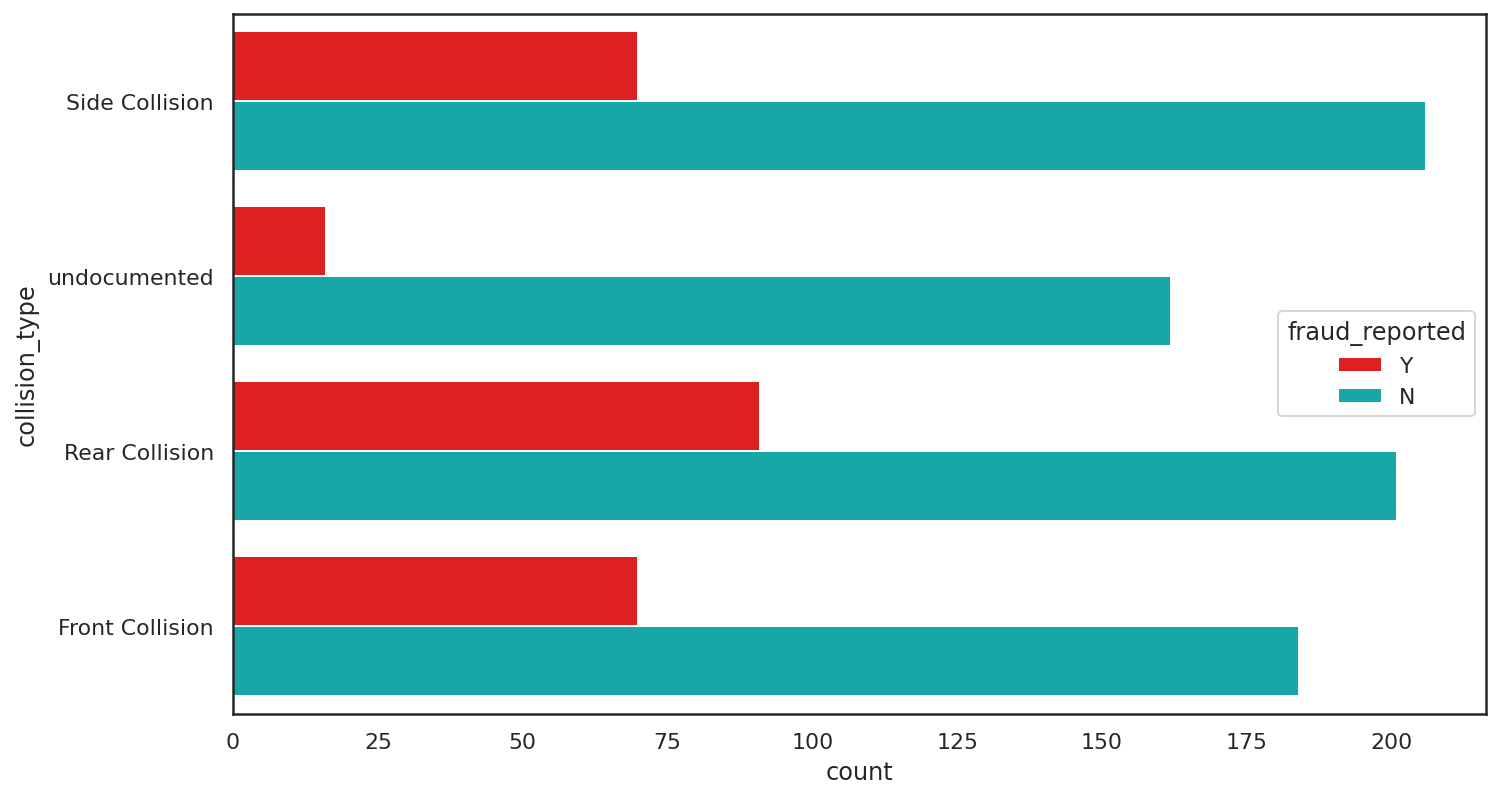

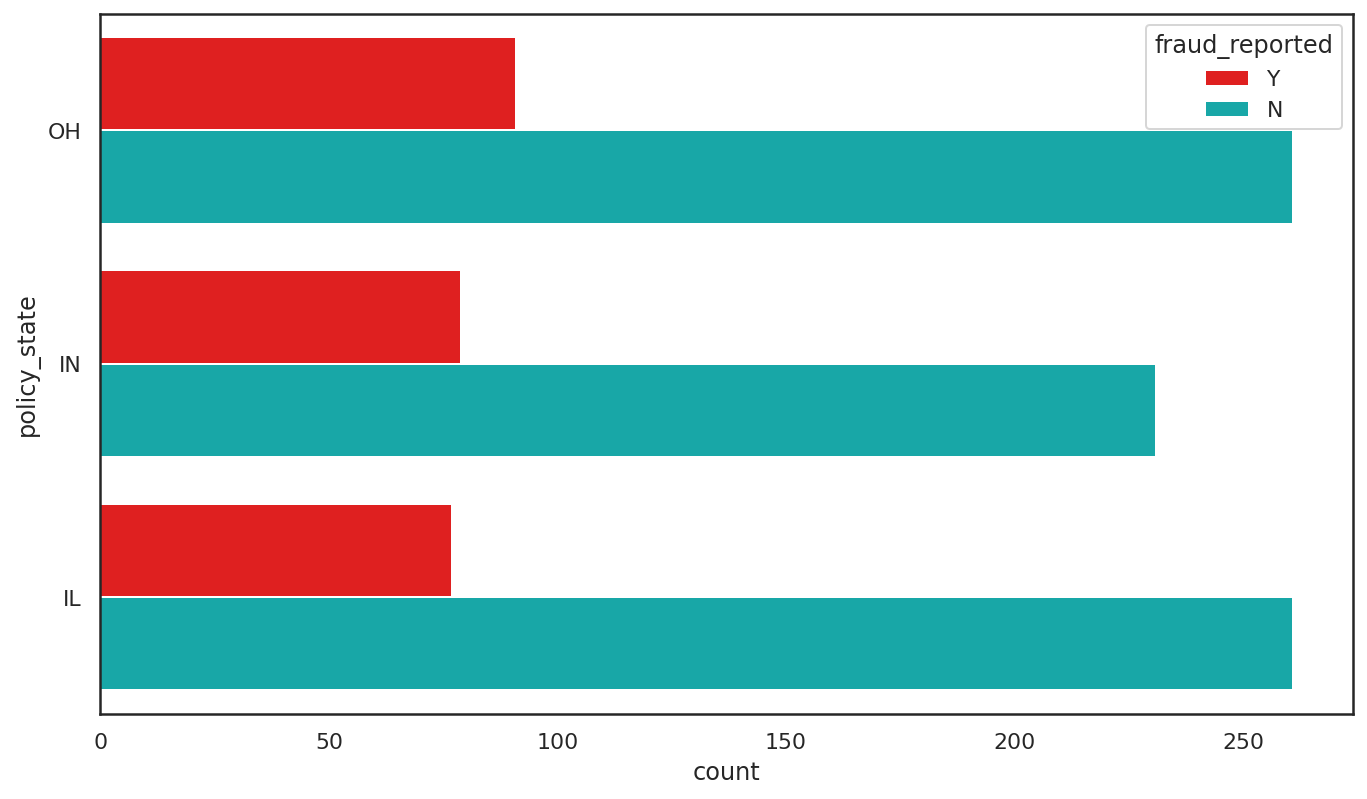

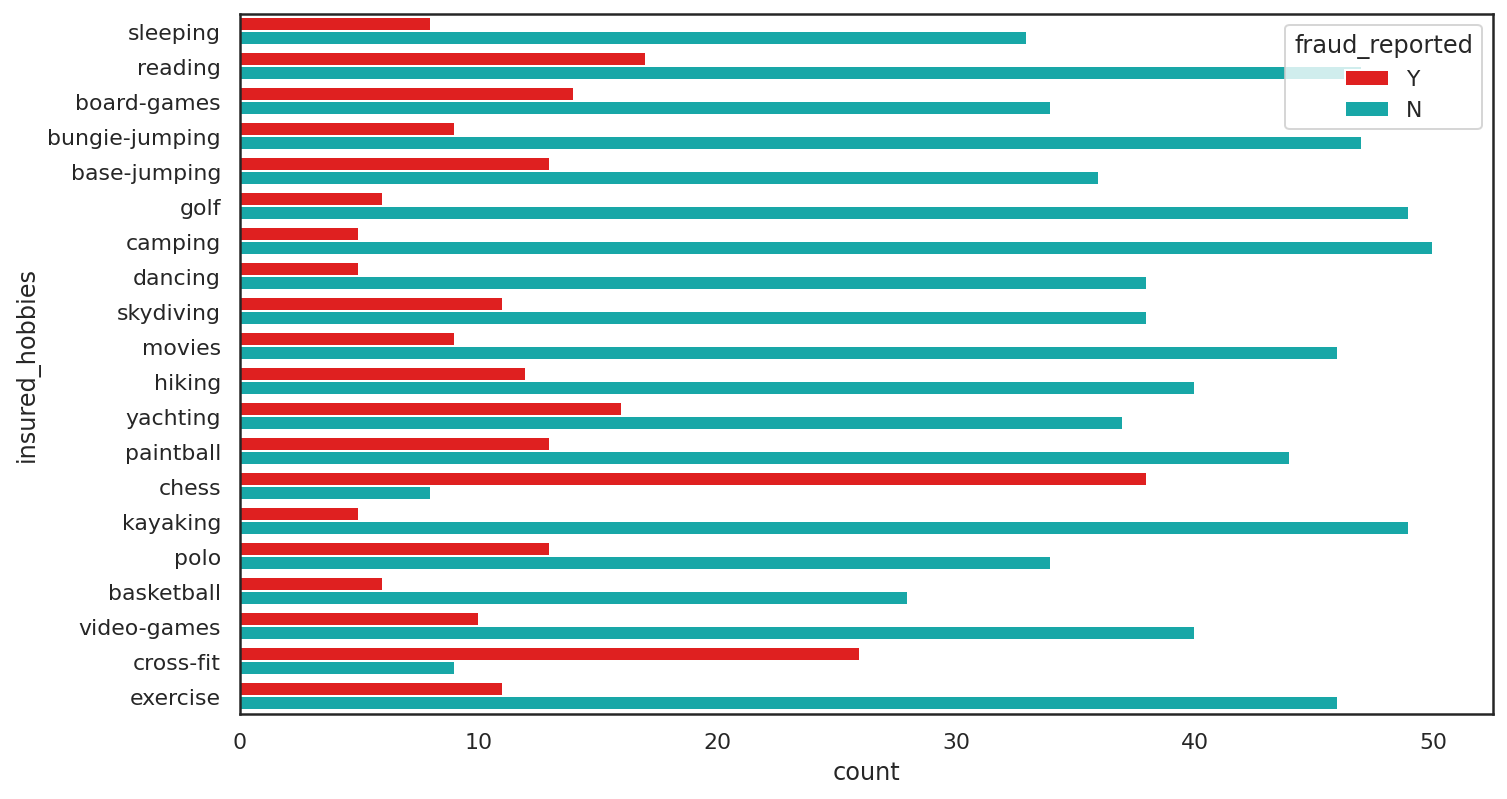

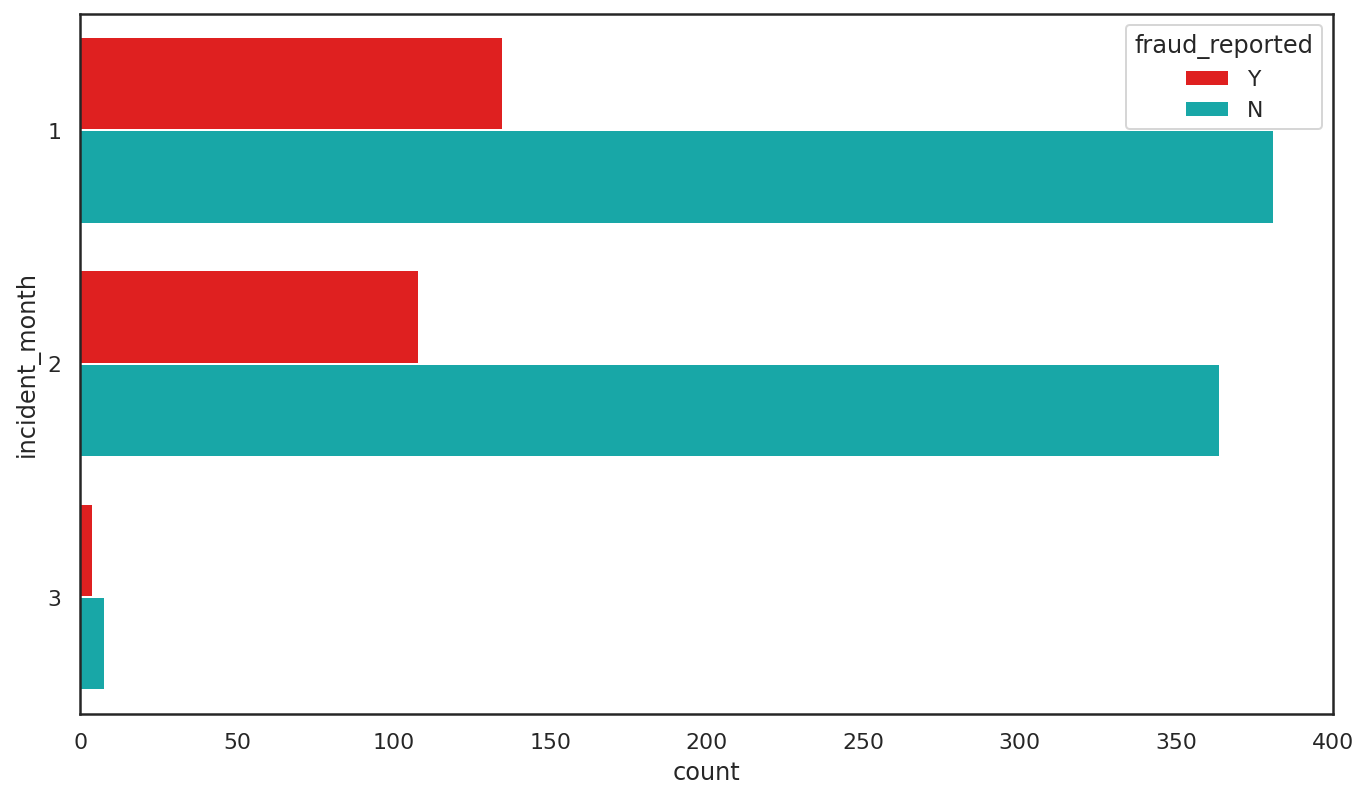

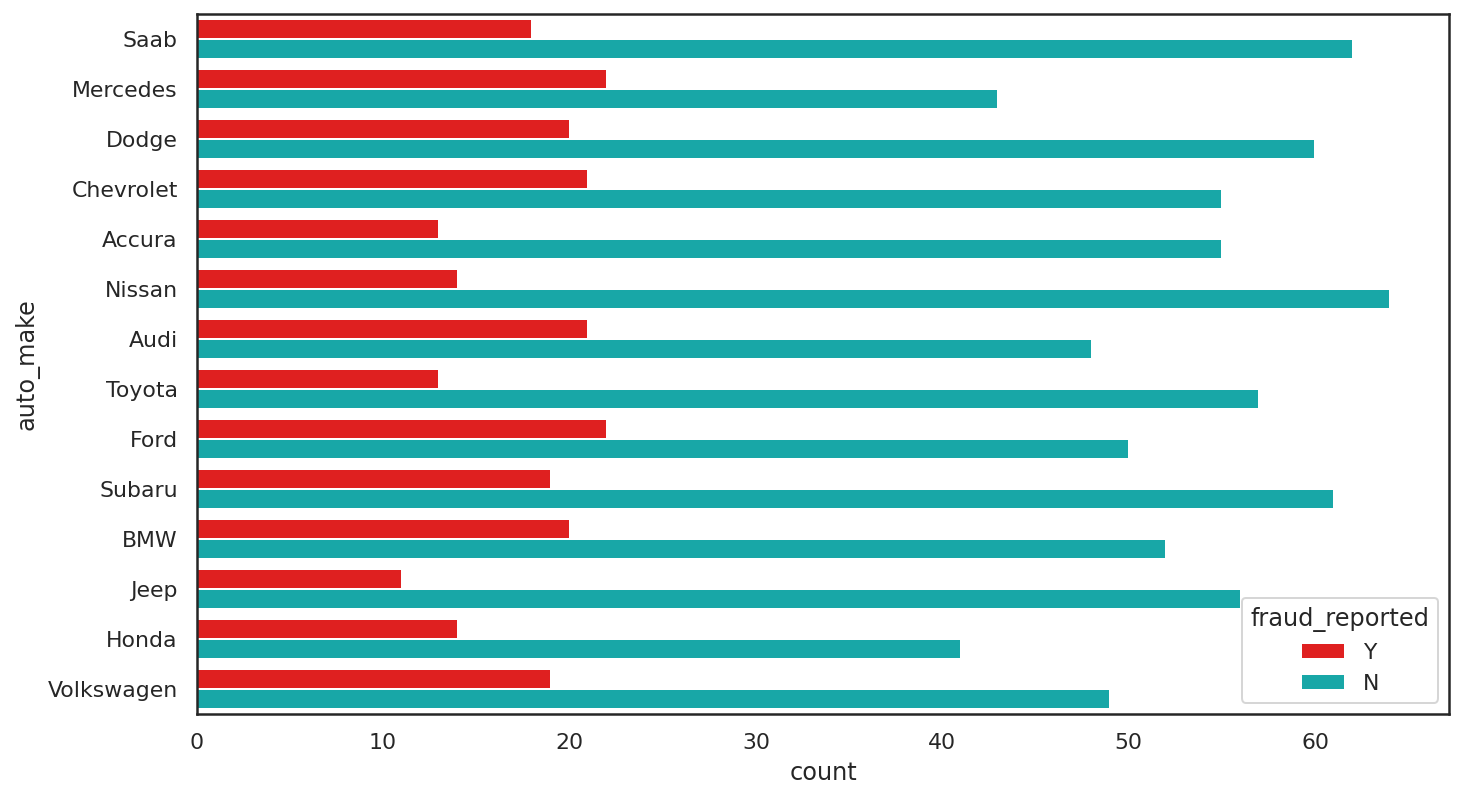

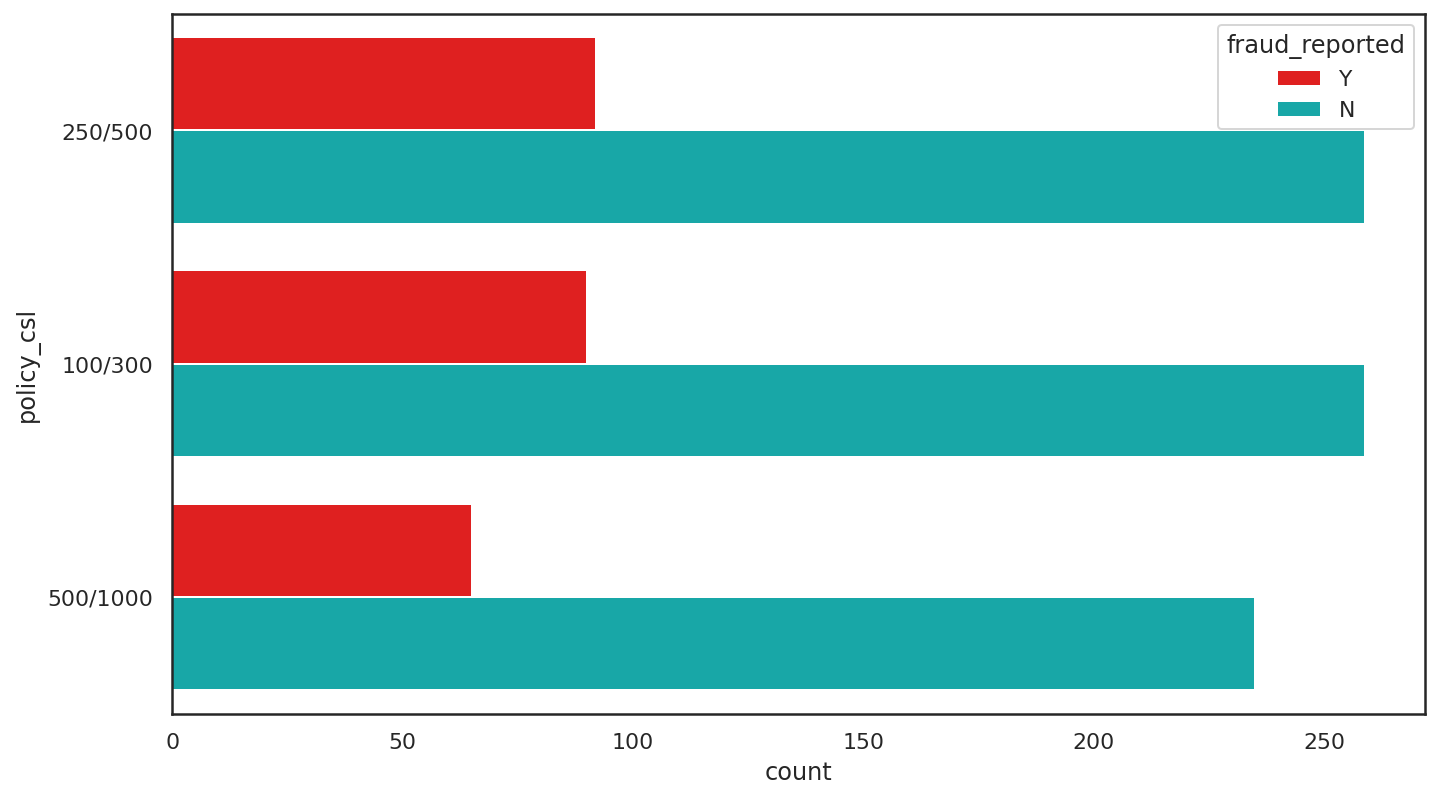

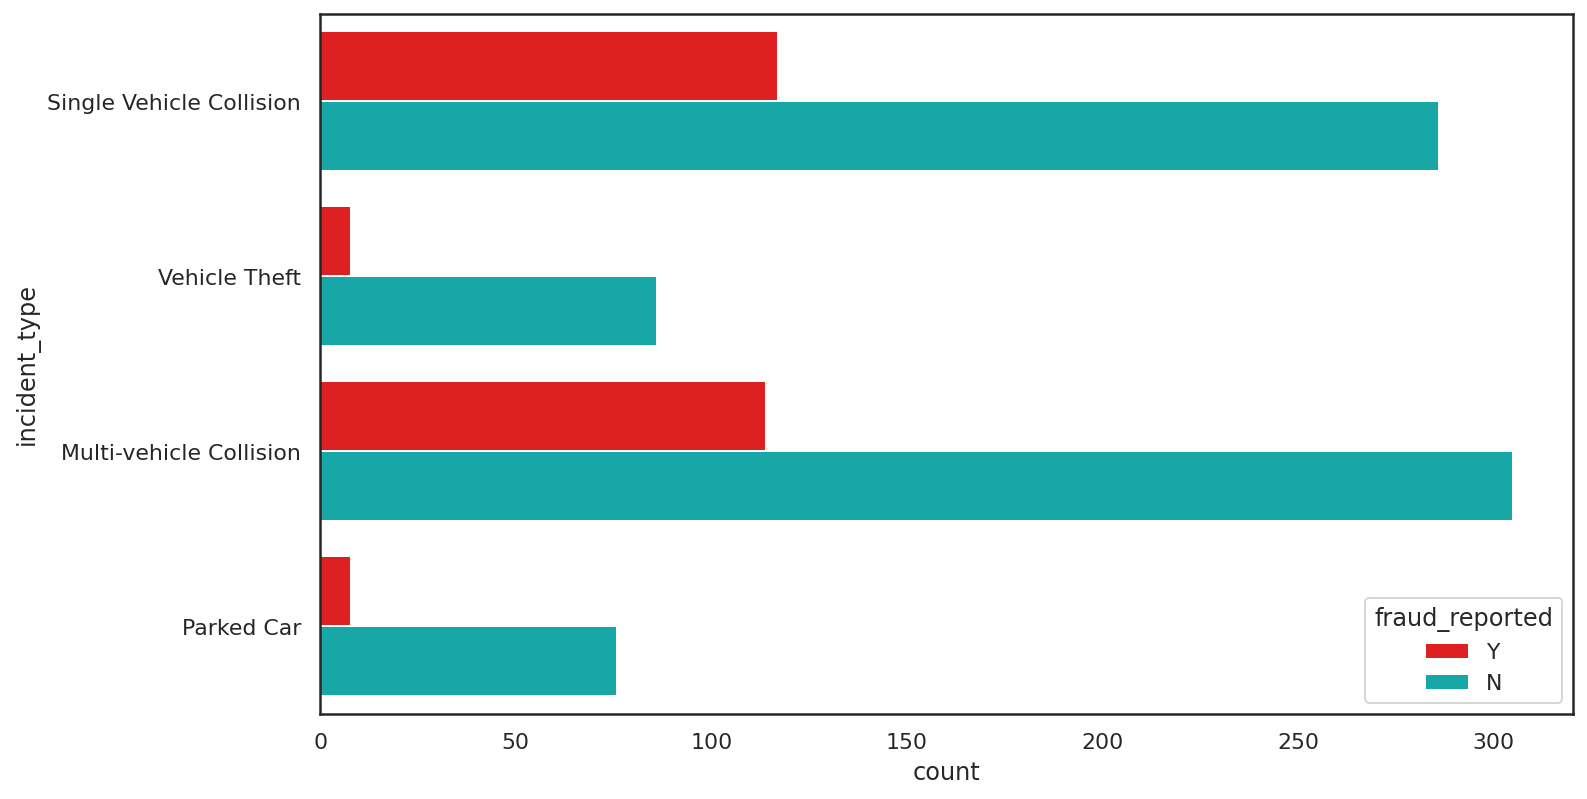

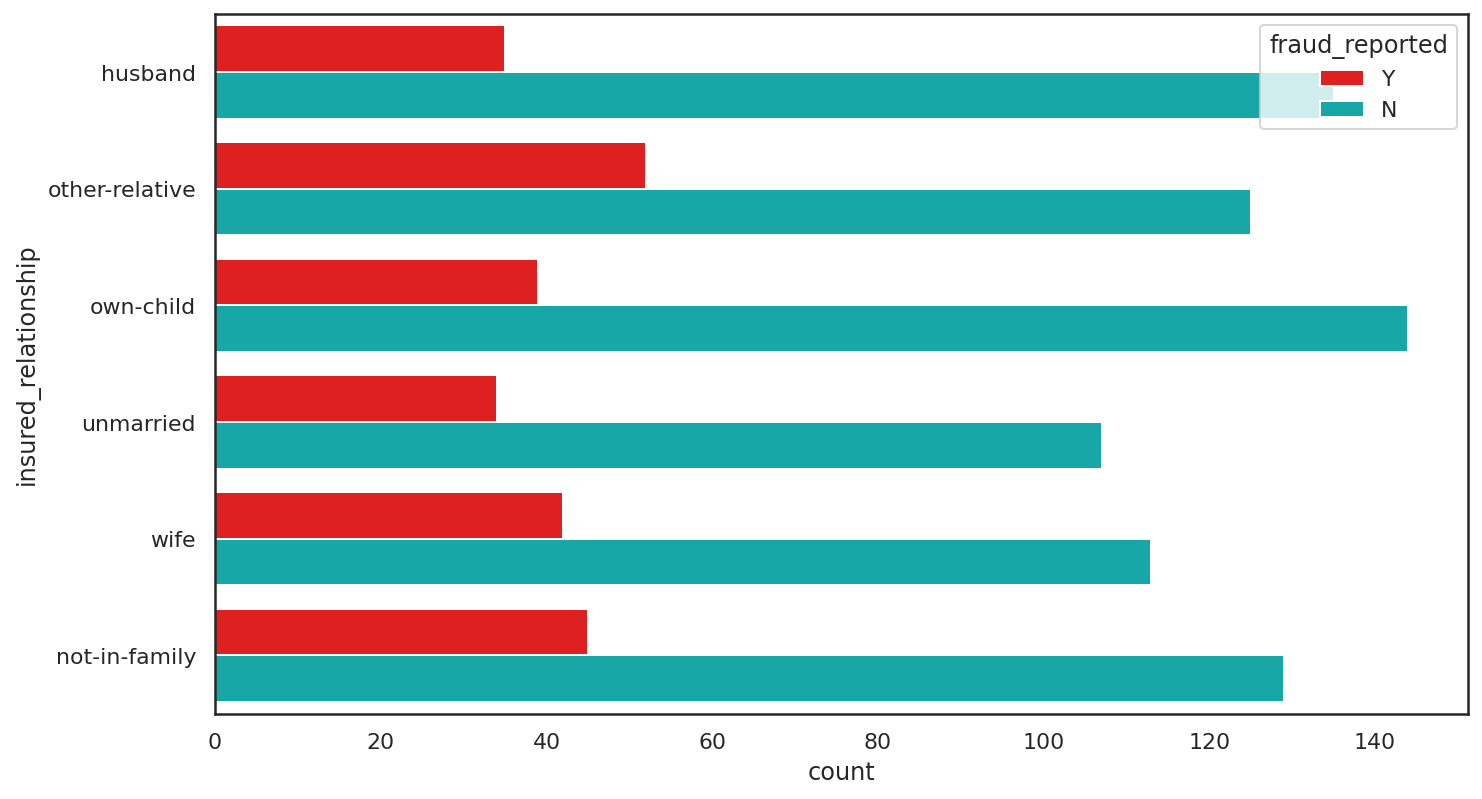

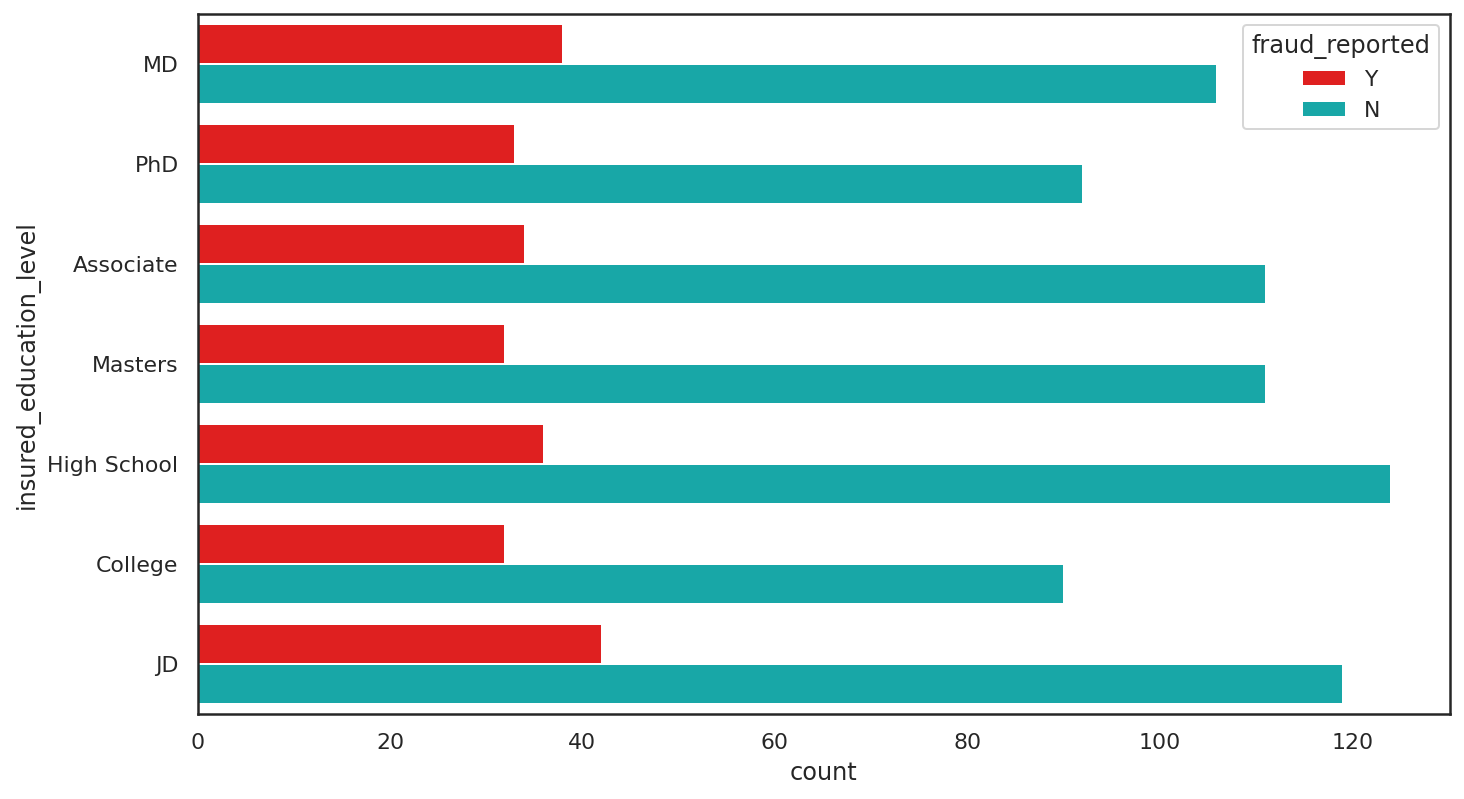

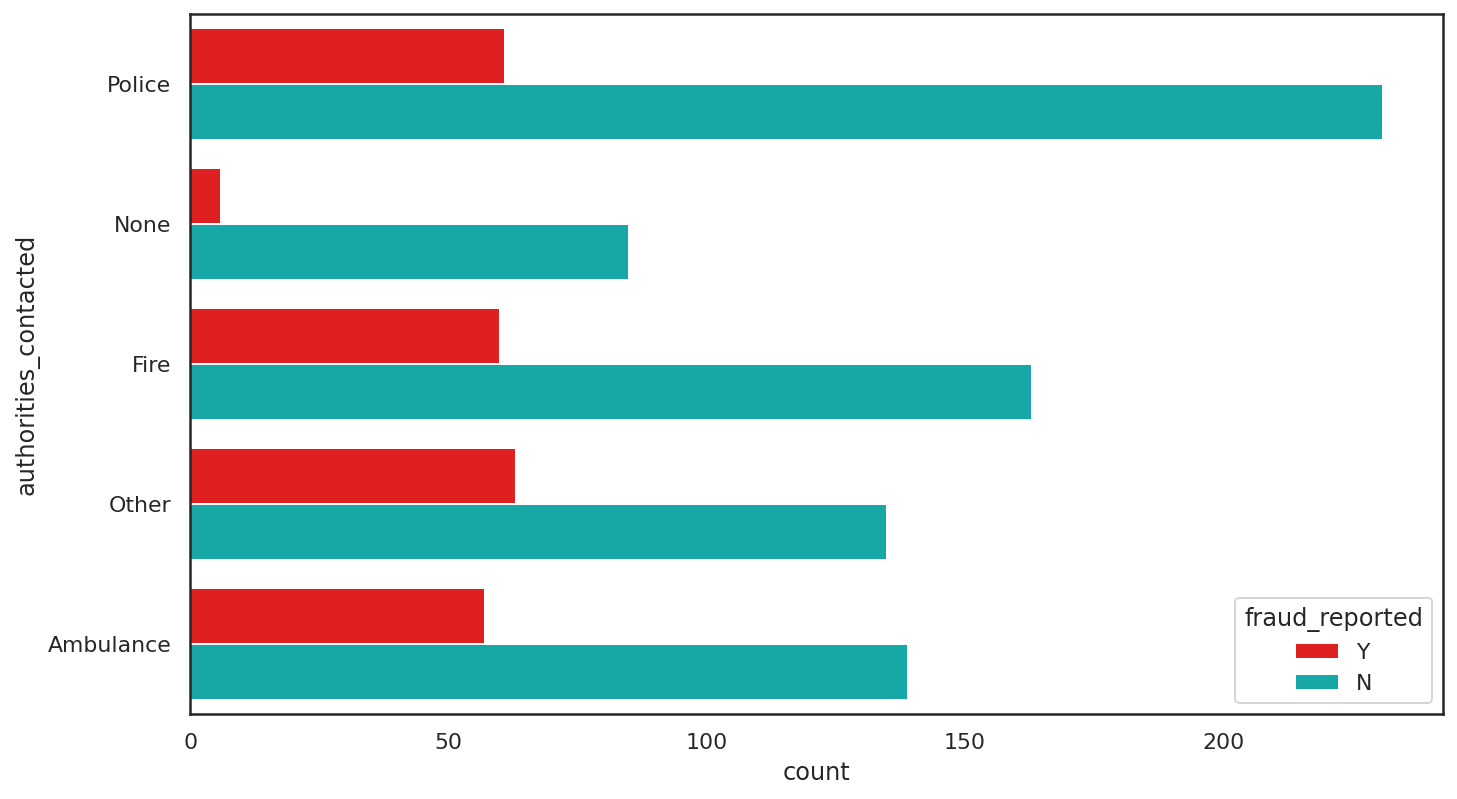

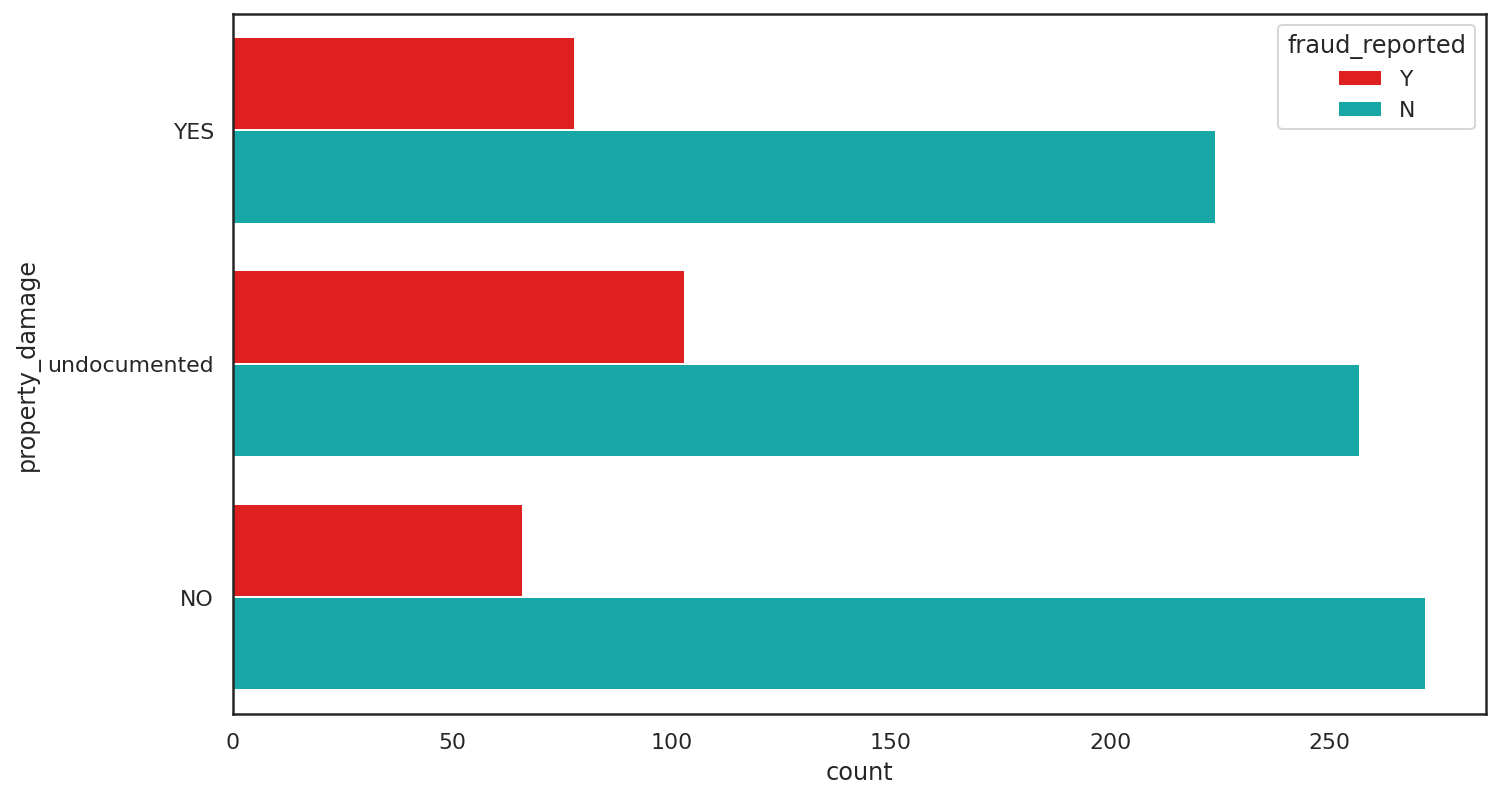

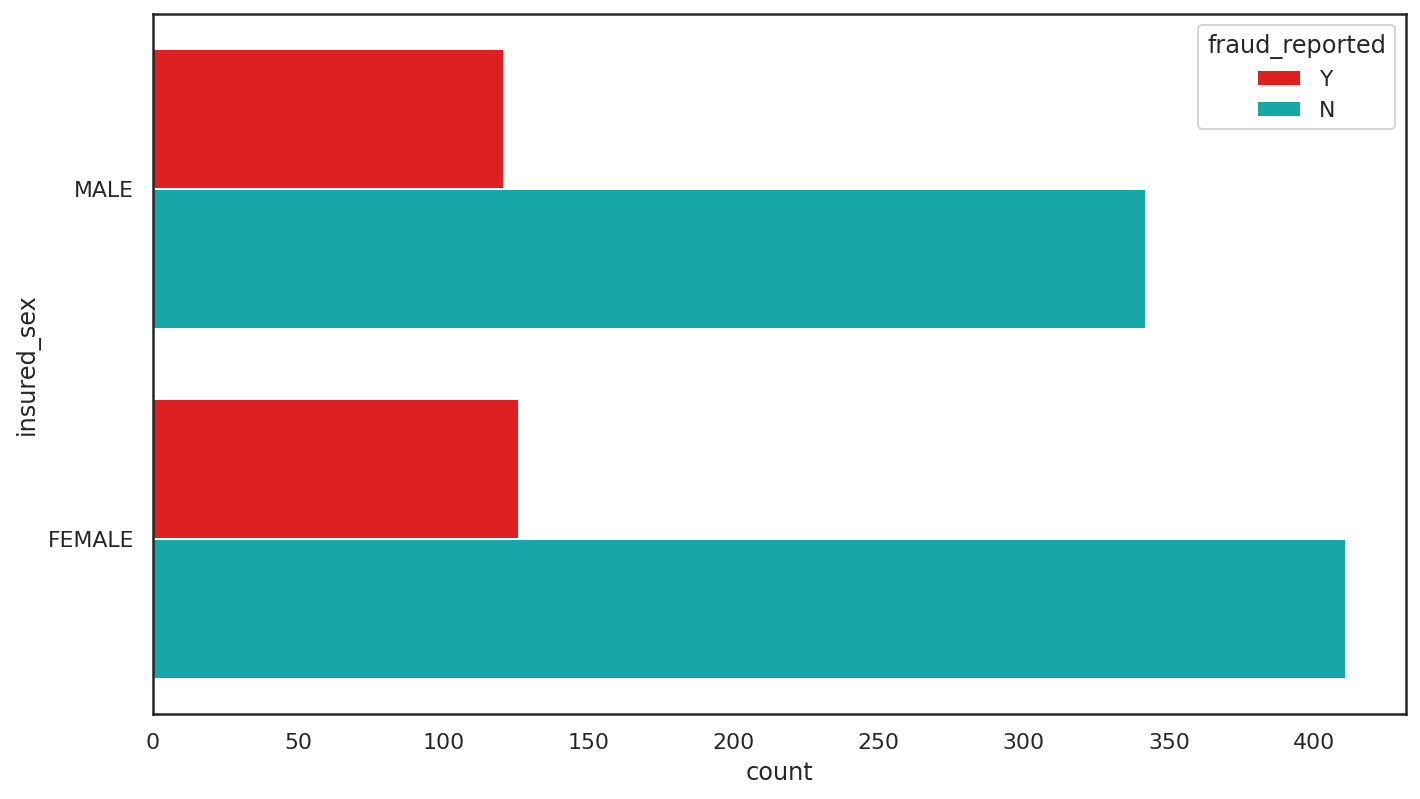

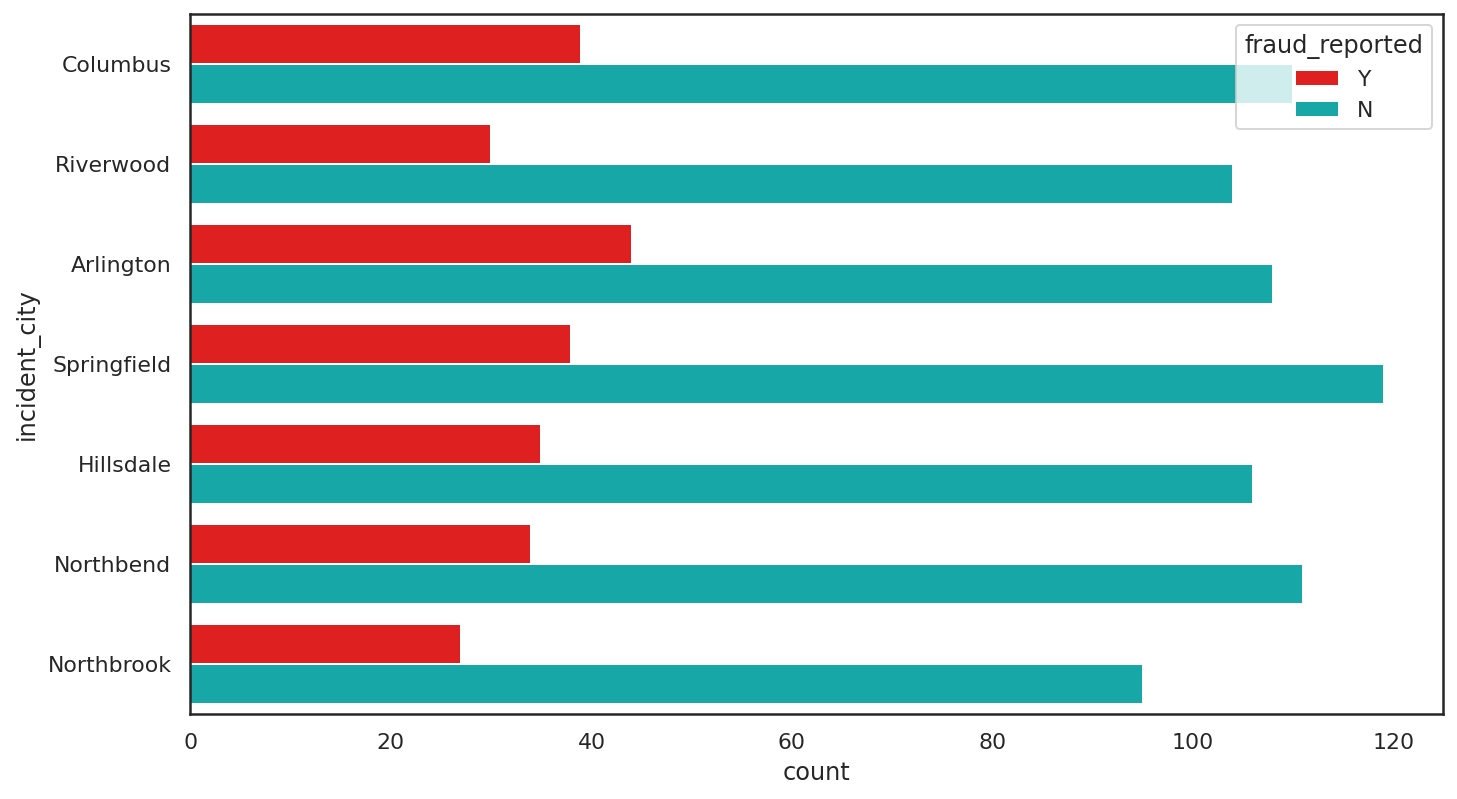

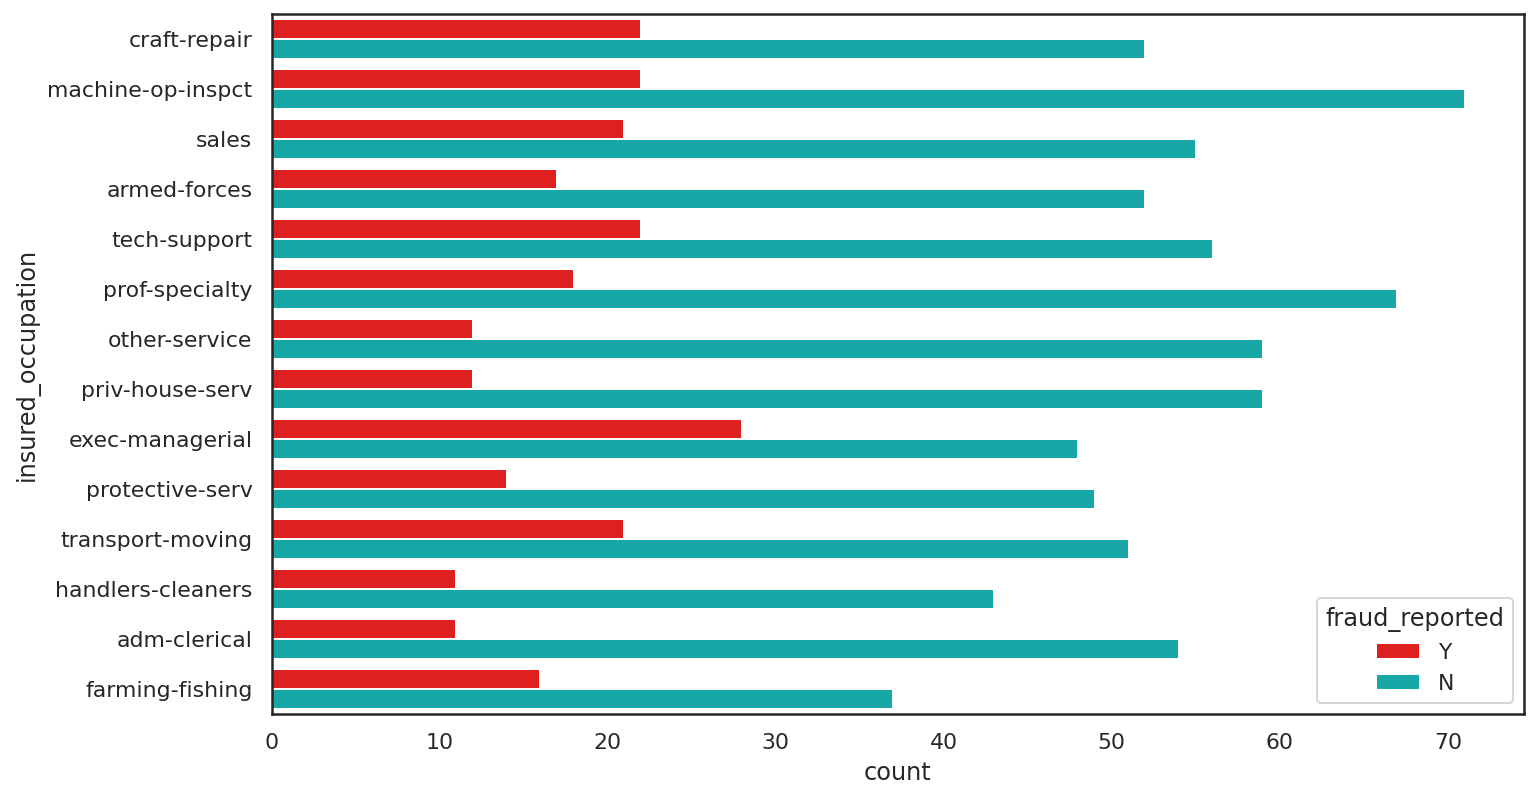

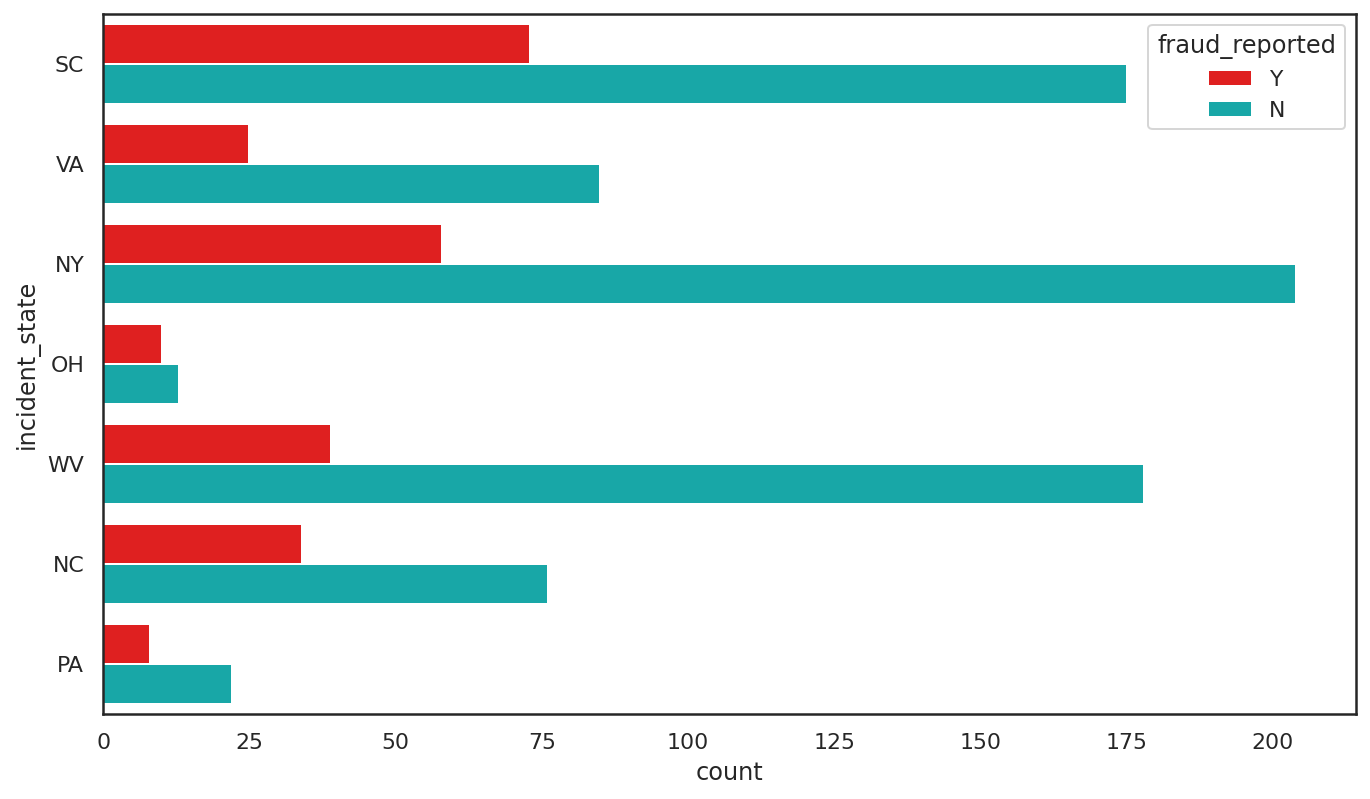

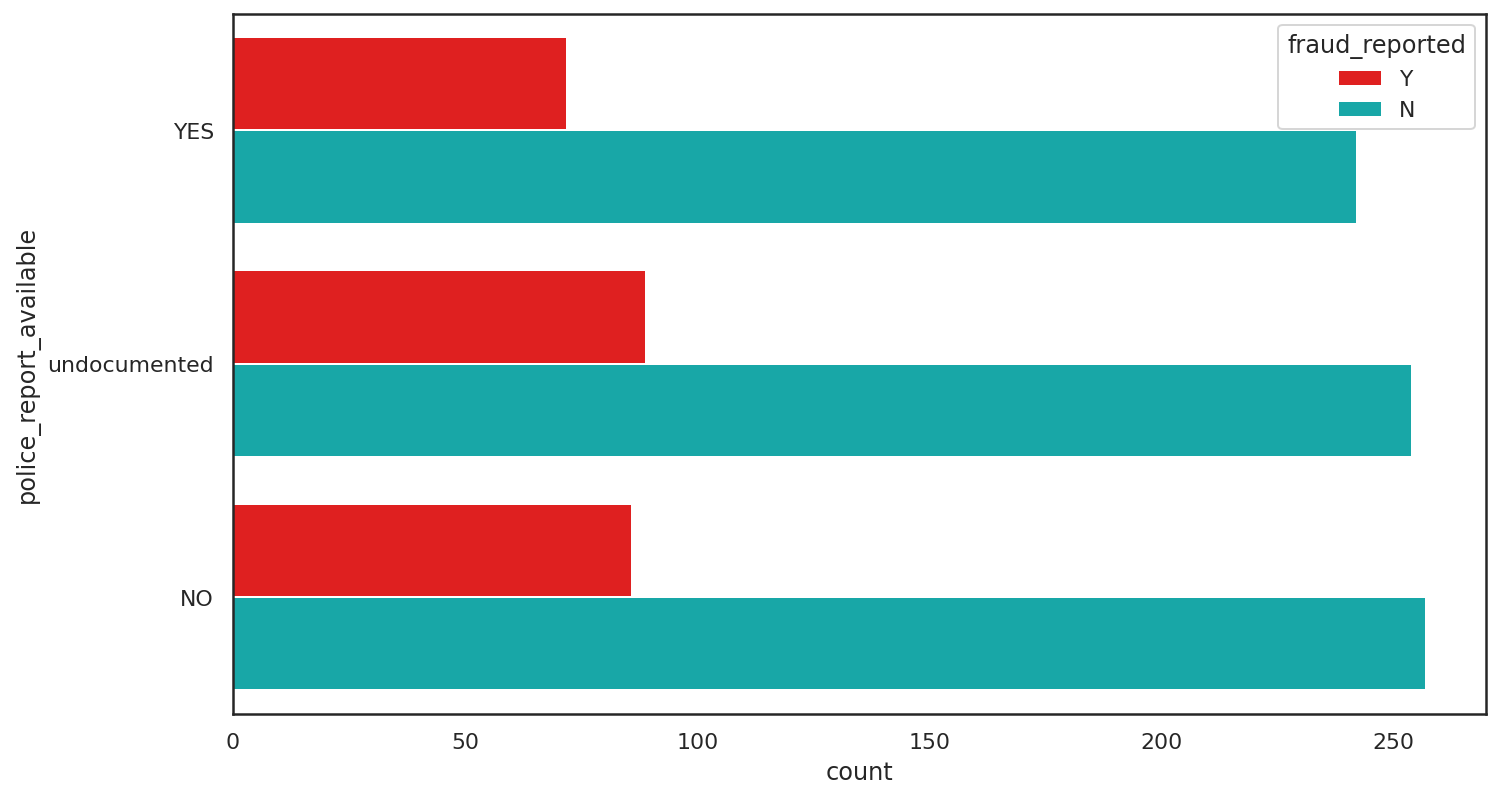

In [ ]:
#each discrete var and fraud reported's dist

for i, name in enumerate(data[nom_var]):
    plt.figure(i,figsize=(10,6))    
    sns.countplot(y=name, data=data, hue="fraud_reported", palette=['red','c'])

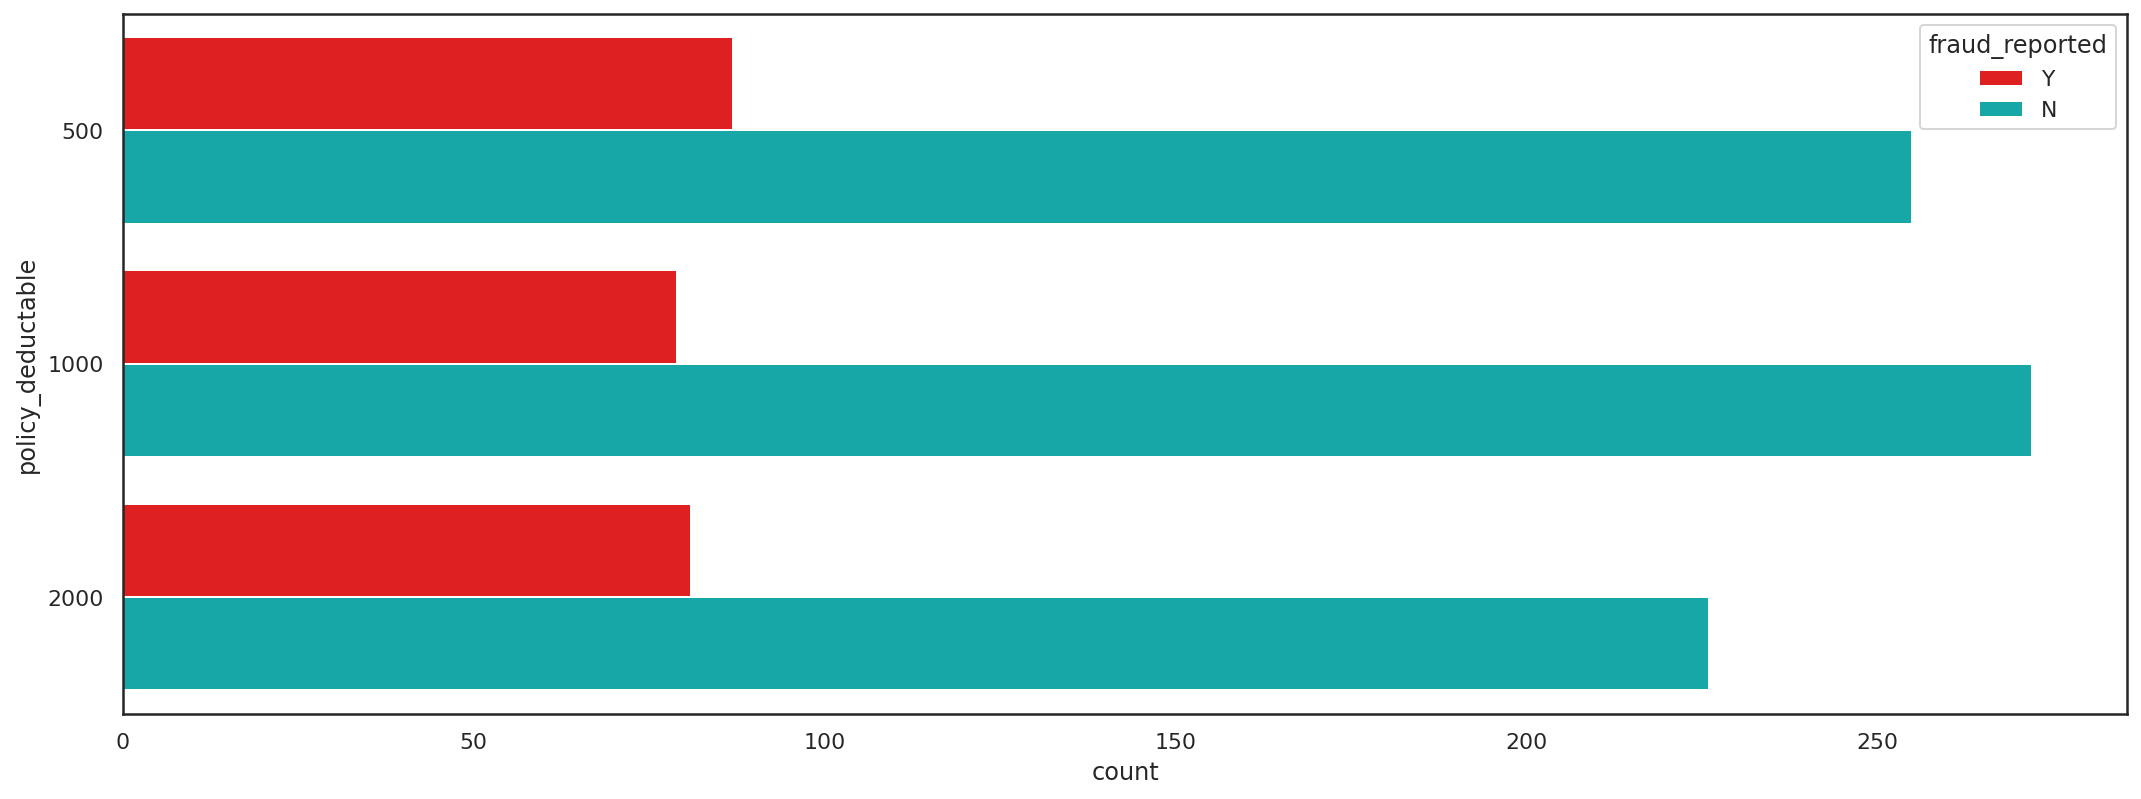

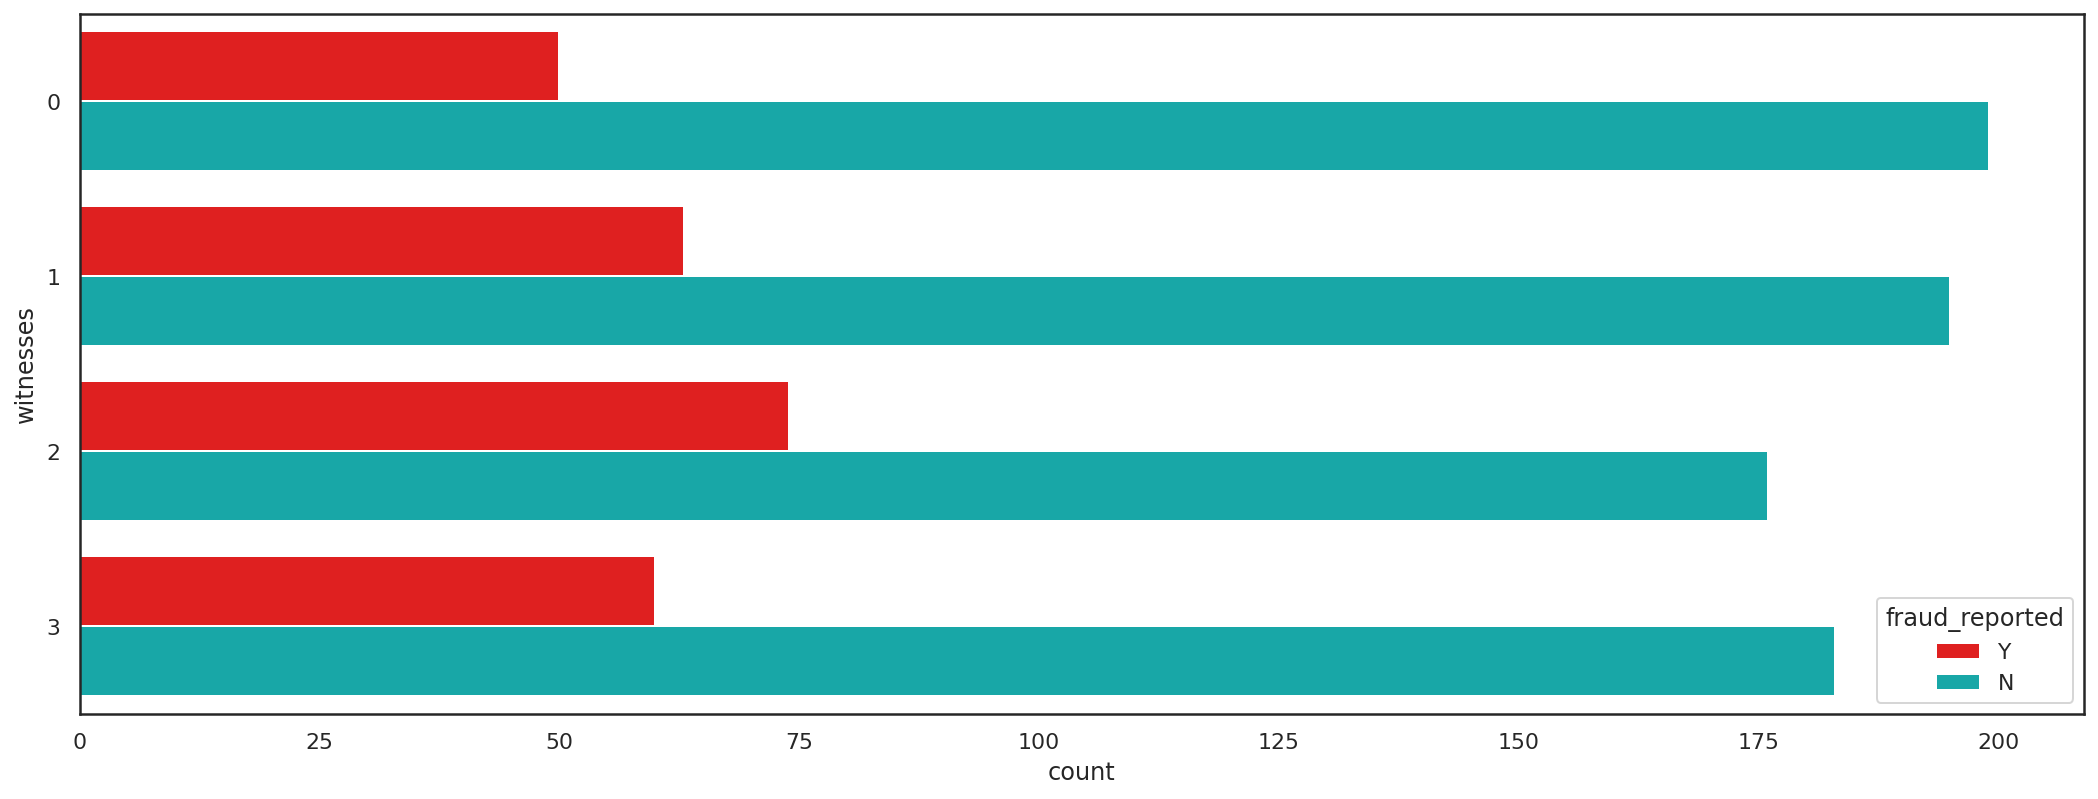

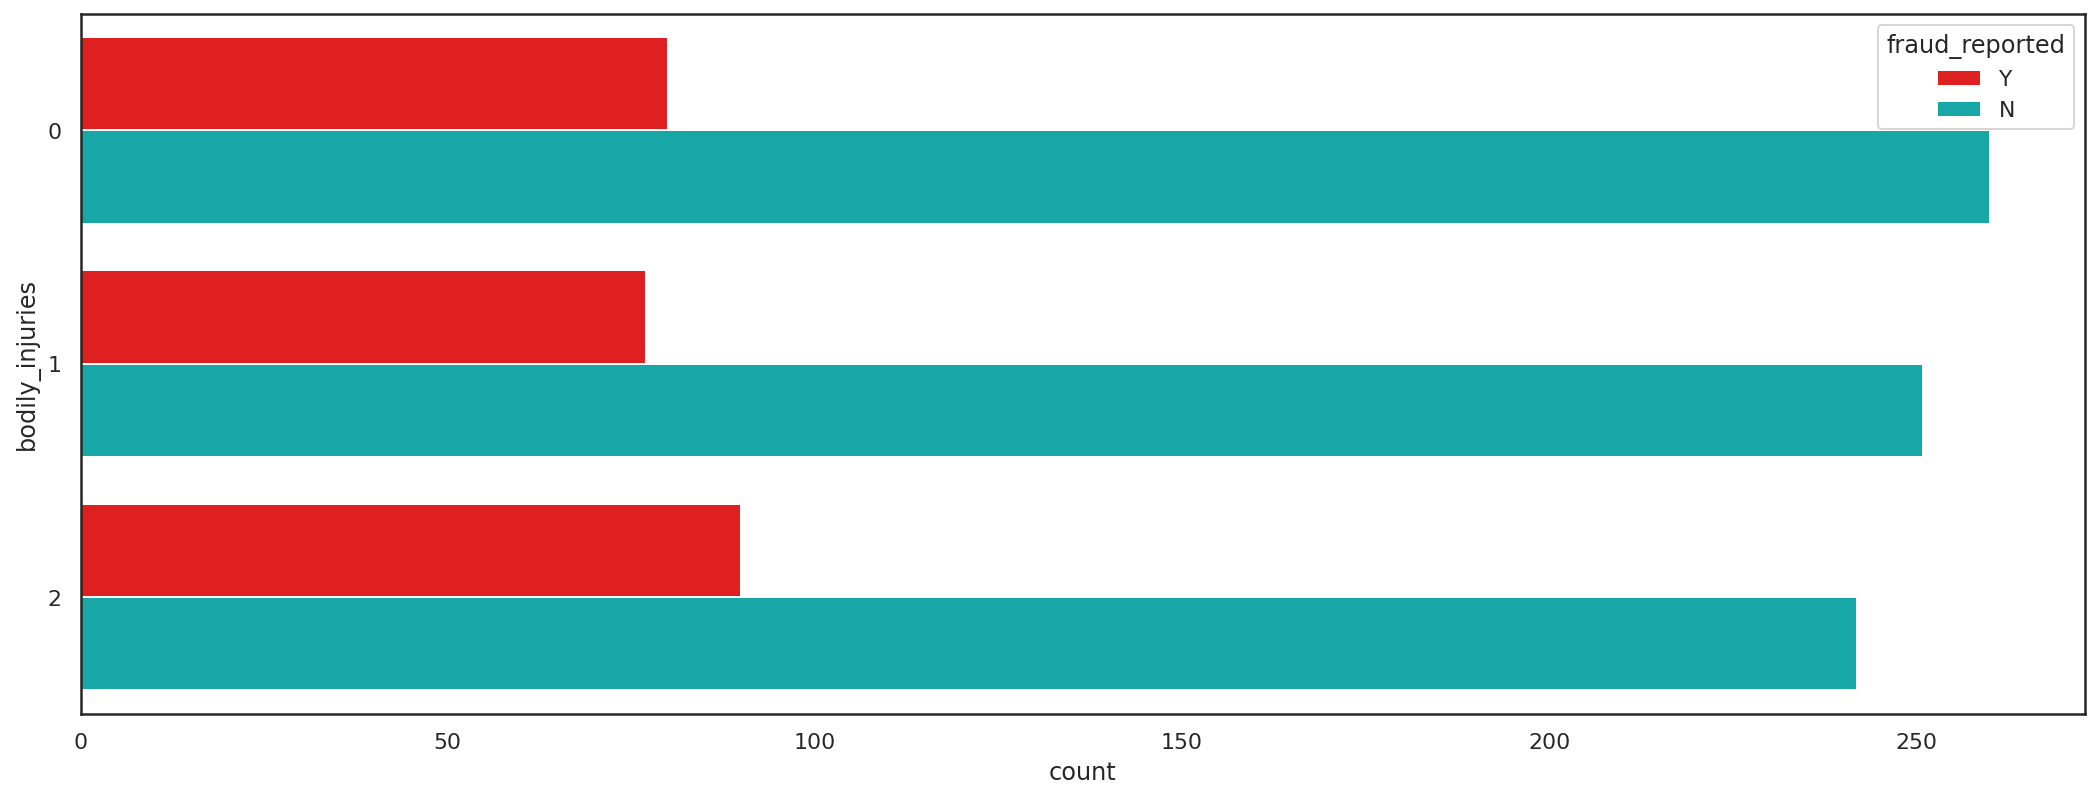

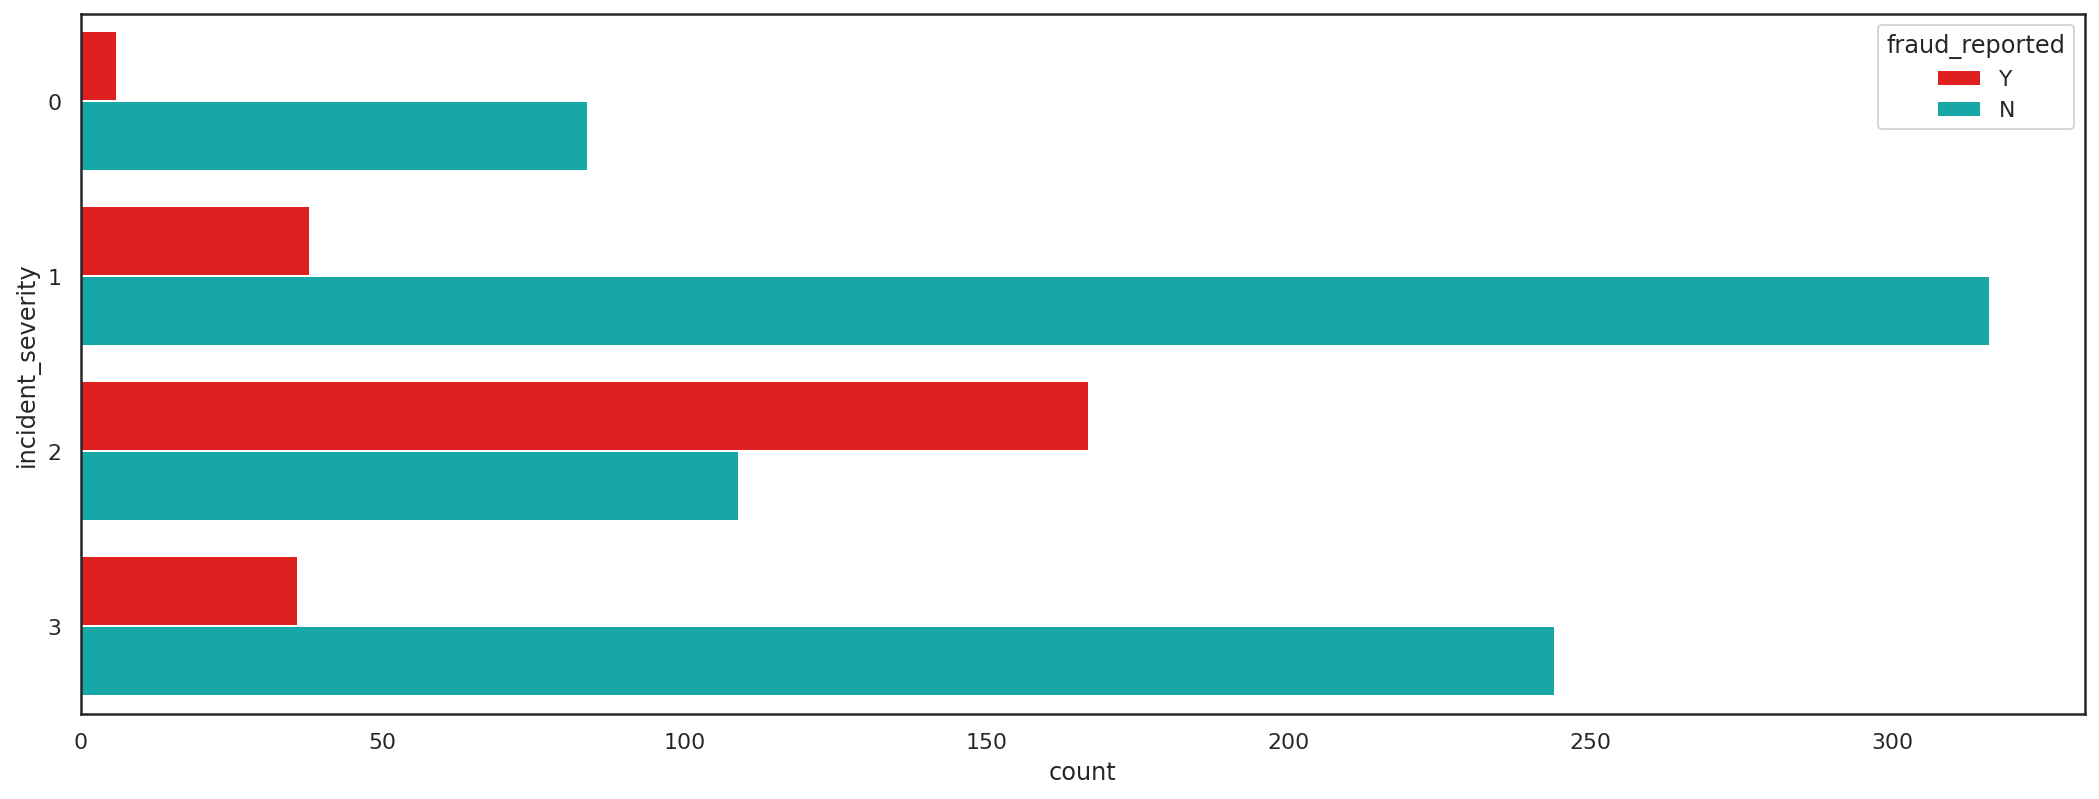

In [ ]:
#each ordinal var and fraud reported's dist
#plt.style.use('dark_background')
#plt.style.use('default')


for i, name in enumerate(data[ord_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(data=data, y=name, hue='fraud_reported', palette=['red','c'])
    

<Figure size 1152x432 with 0 Axes>

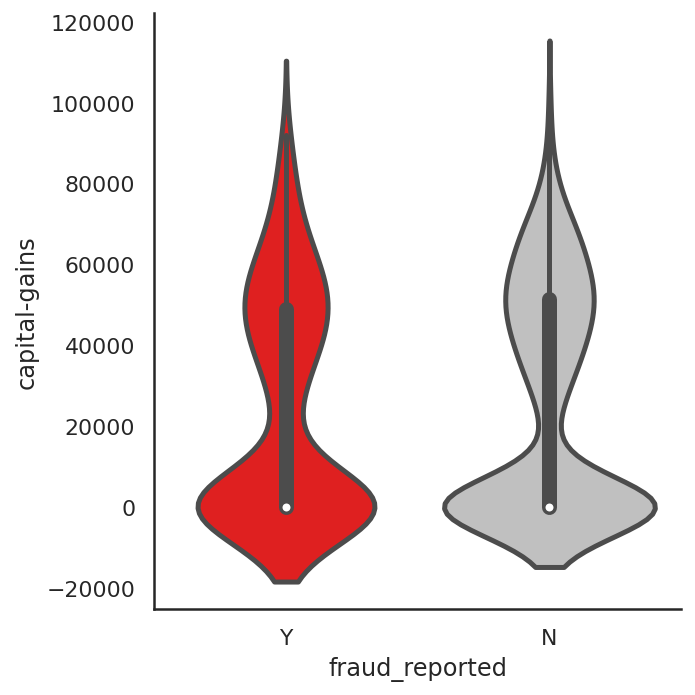

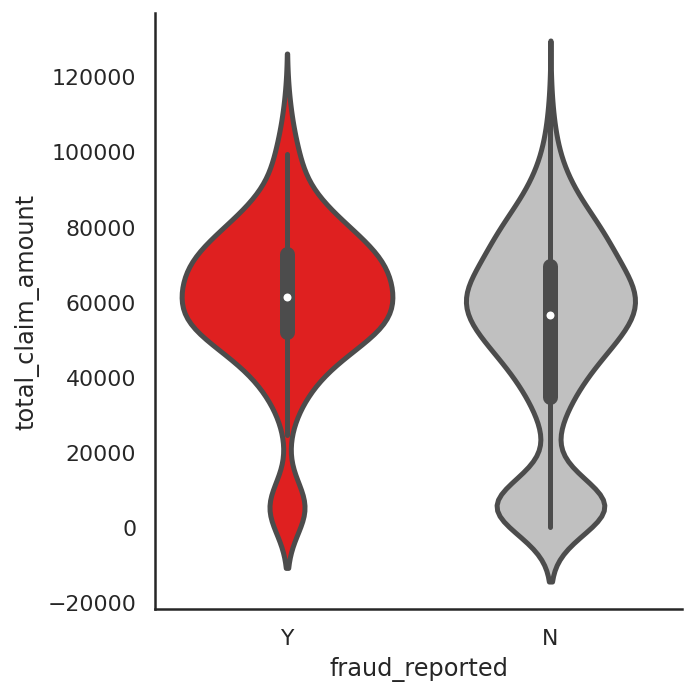

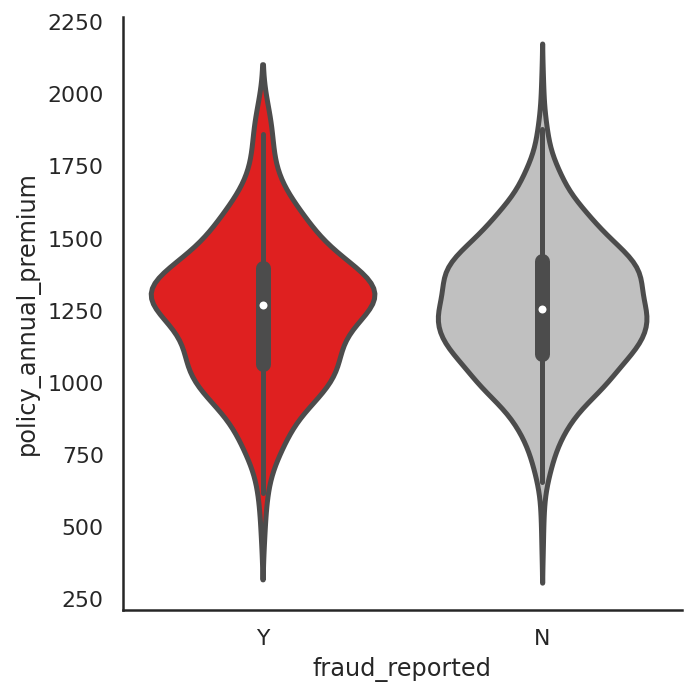

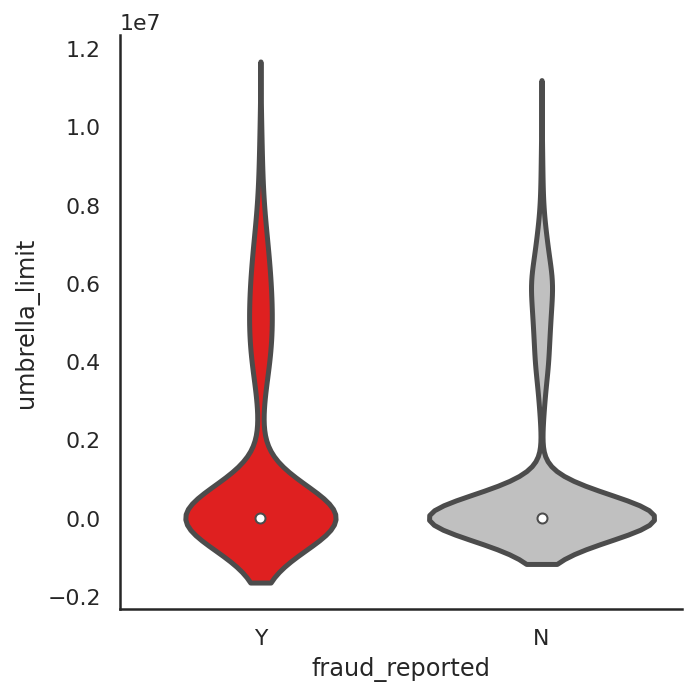

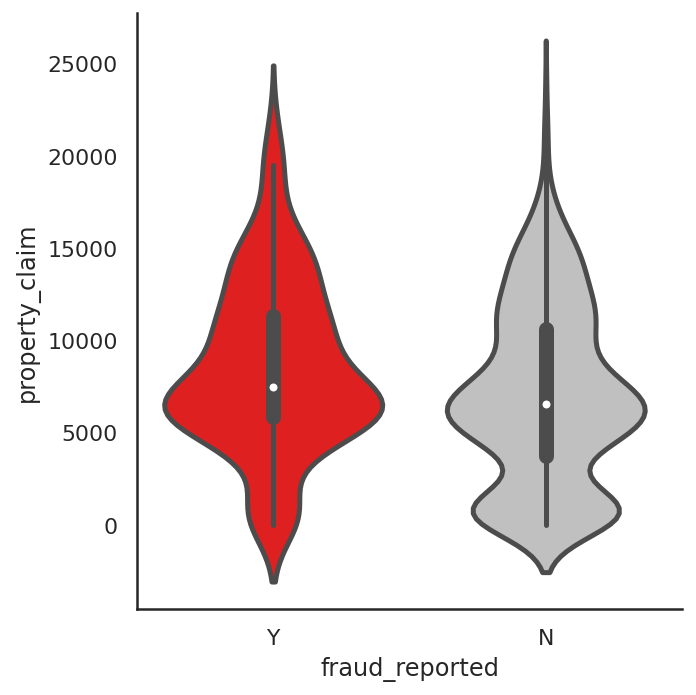

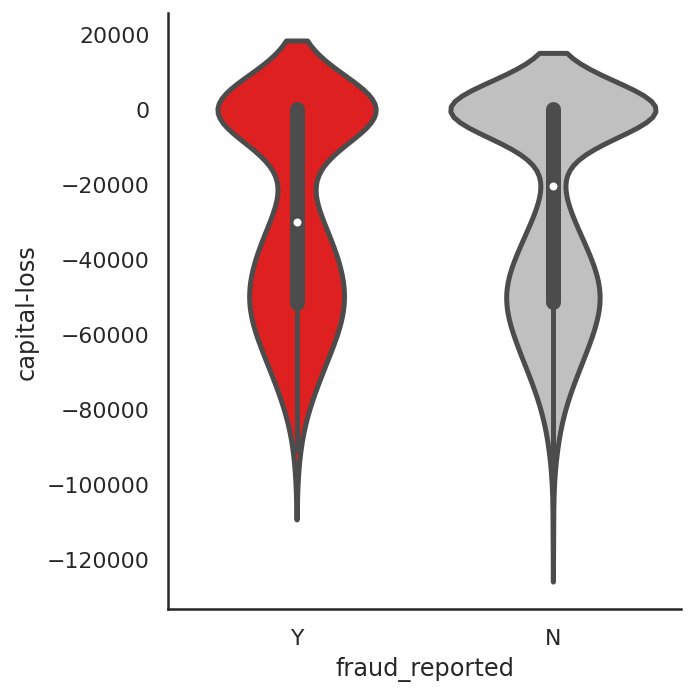

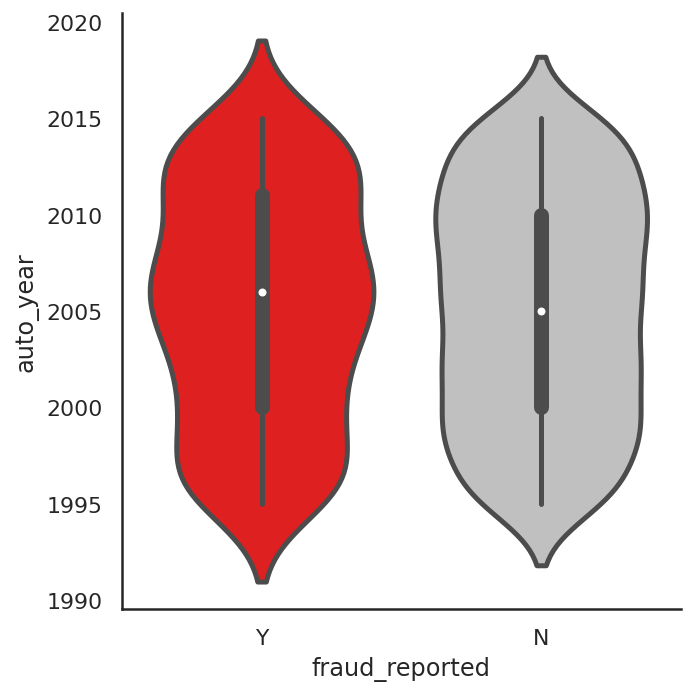

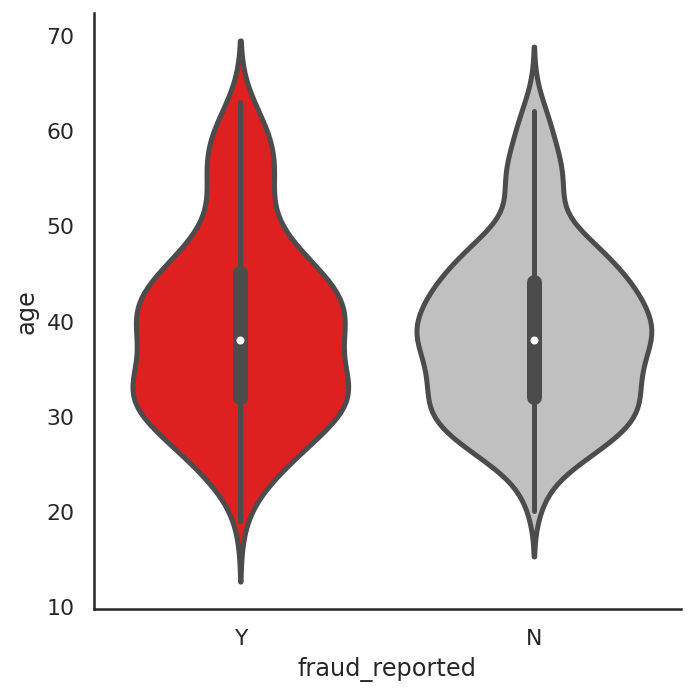

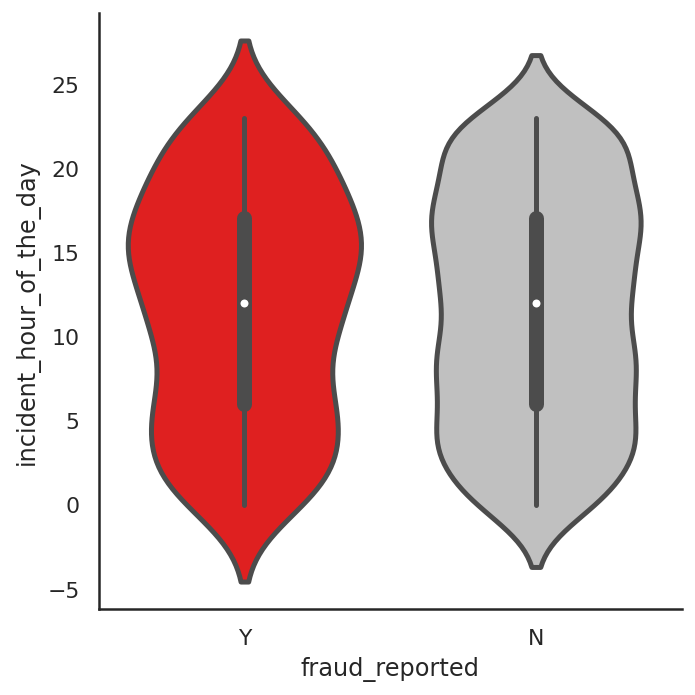

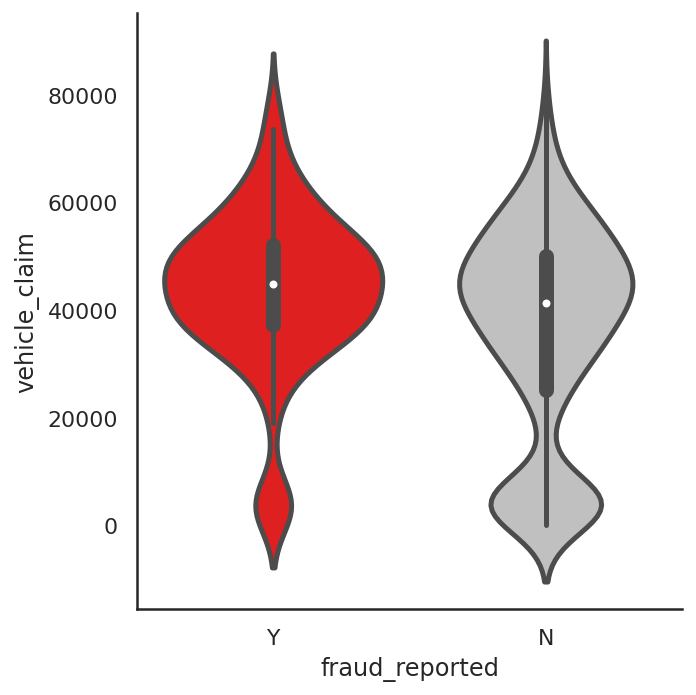

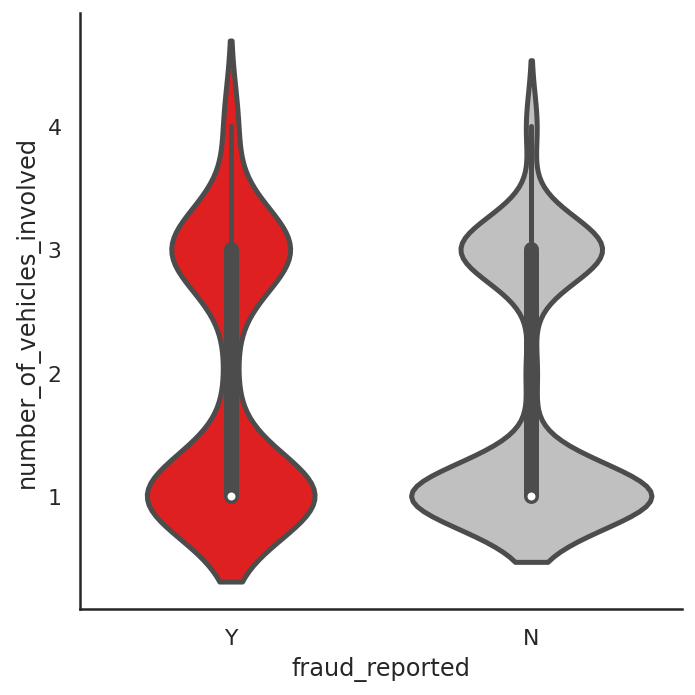

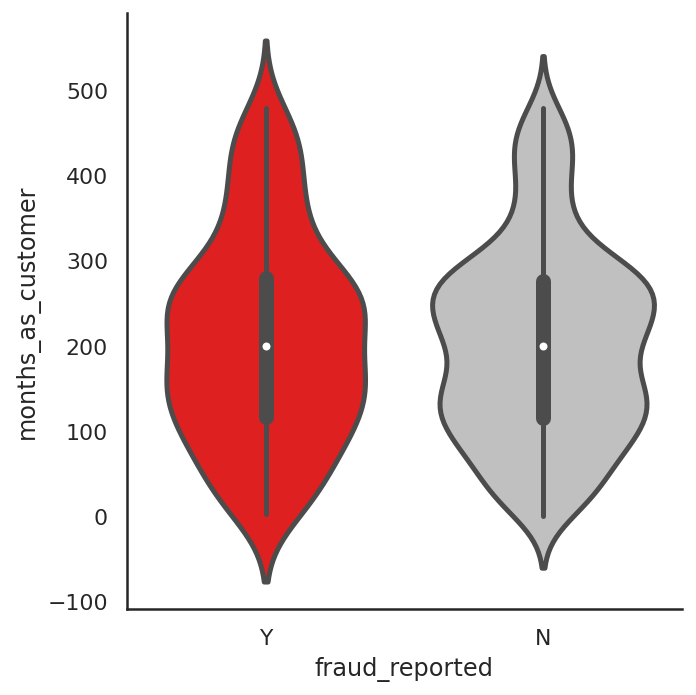

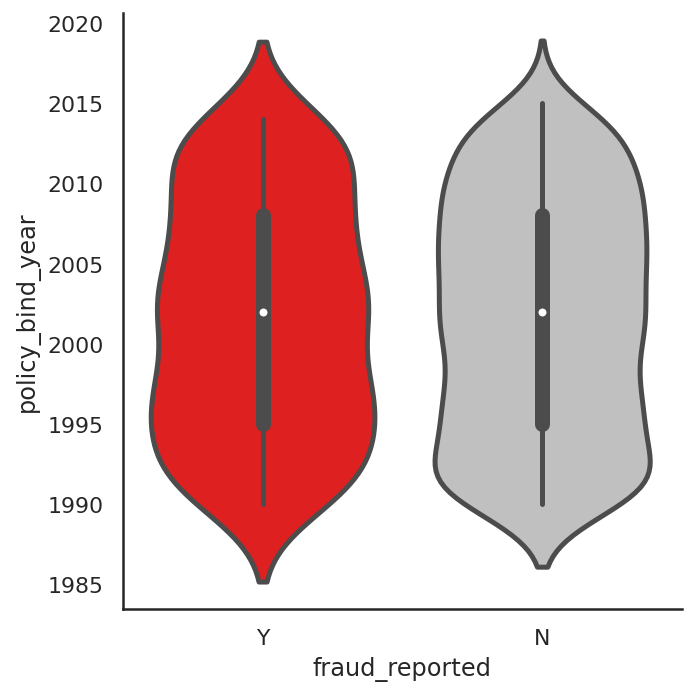

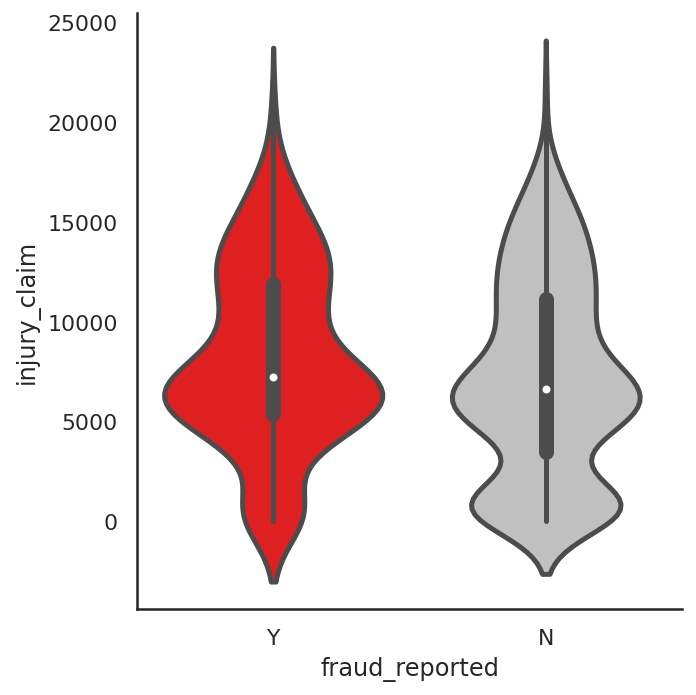

In [ ]:
#each continous var and fraud reported's dist

for i, name in enumerate(data[quan_var]):
    plt.figure(i,figsize=(16,6))
    sns.catplot(data=data, x="fraud_reported",kind='violin',y=name, palette=['red','silver'])
    

**Observations**

Little have I suspected that fraud differed across hobbies. It seems like chess players and cross-fitters have higher tendencies of fraud. I stopped to think if the sports develop one to be inclined to fraud or that people with tendencies are drawn to it.

<br>
<details><summary>Drop down to jump to that graph</summary>

![](images/fig3.png)
    
</details>

Major incident severity seems to have highest fraud cases that exceed non fraud cases.

<br>
<details><summary>Drop down to jump to that graph</summary>

![](images/fig4.PNG)
    
</details>

There seem to be more frauds than non-fraud claims along the mean of total claims. 

<br>
<details><summary>Drop down to jump to that graph</summary>

![](images/fig5.PNG)
    
</details>


### Additional visualization and observations

Text(0.5, 1.0, 'incident by severity and incident type')

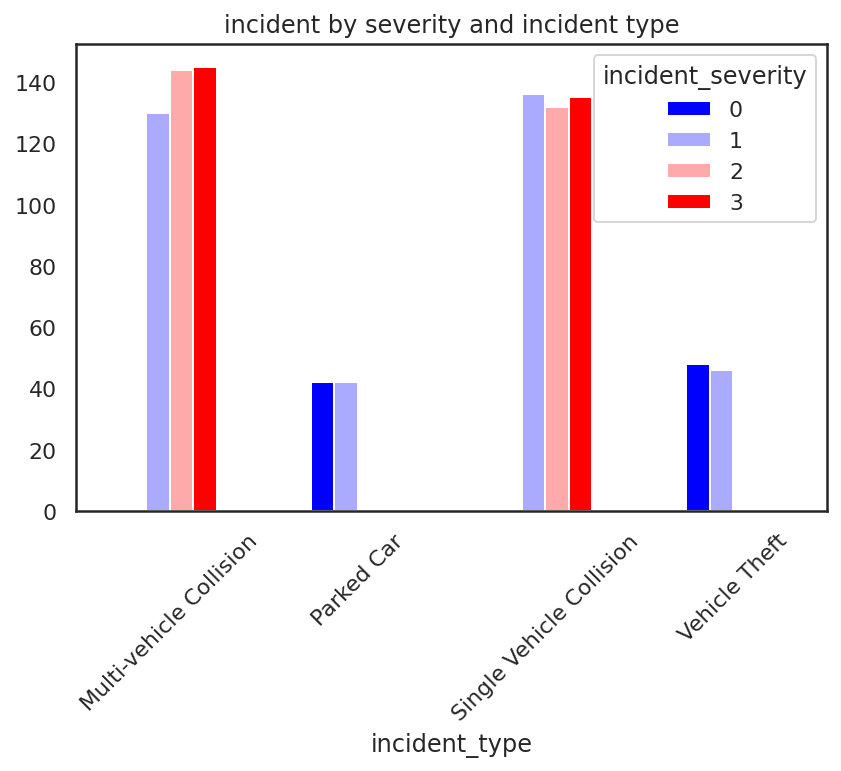

In [ ]:
#cross tab of incident type and severity 
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(data['incident_type'], data['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type")


More severe accidents seem to only be present with collision.

Text(0.5, 1.0, 'incident by severity and collision type')

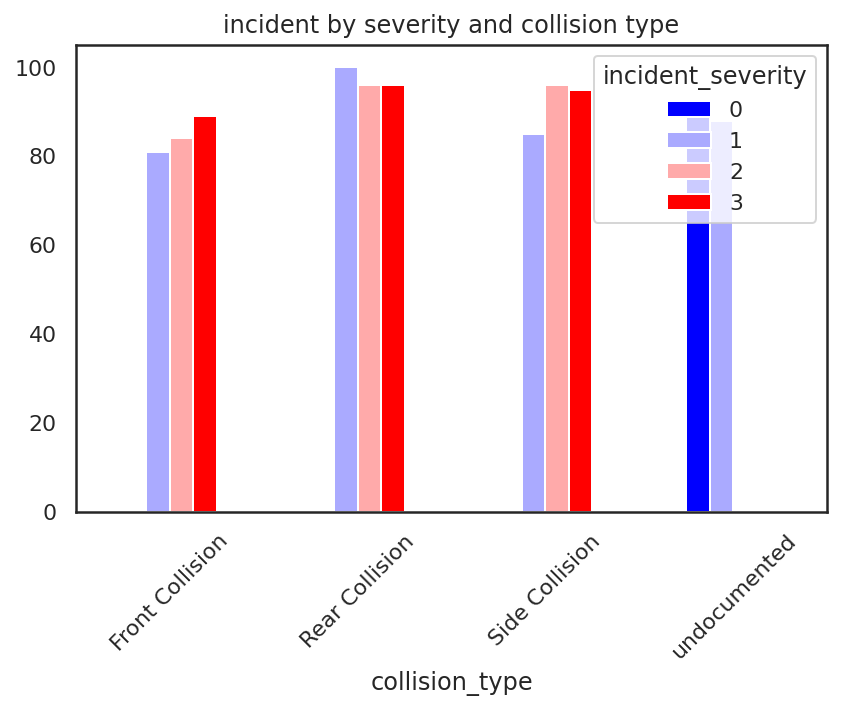

In [ ]:
#undocumented collision types tend to be less severe

incident = pd.crosstab(data['collision_type'], data['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type")

Undocumented collision types tend to be less severe. Perhaps the drivers see no need to document since accidents are not major.

Text(0.5, 1.0, 'incident by severity and automake')

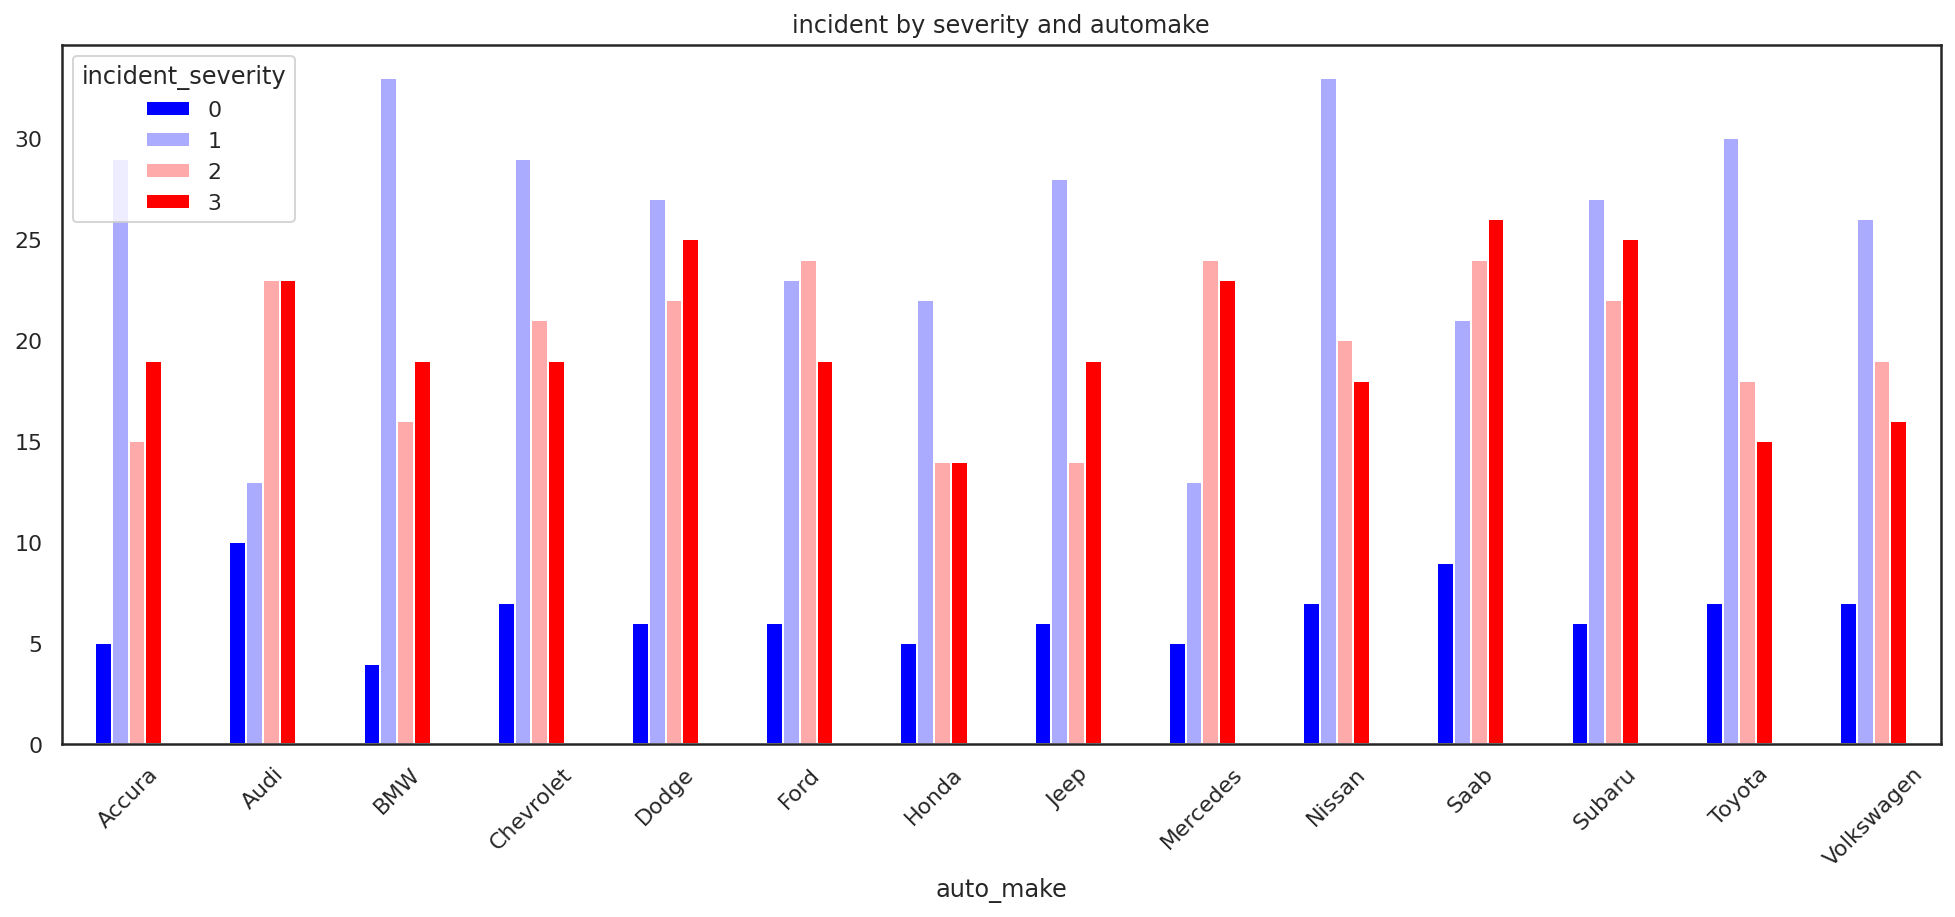

In [ ]:
# seems like bmw and nissan gets a lot of minor accident
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(data['auto_make'], data['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake")

Seems like bmw and nissan gets a lot of minor accident
Fiercer cars like dodge, subaru, saab, merc get into mor severe accident

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

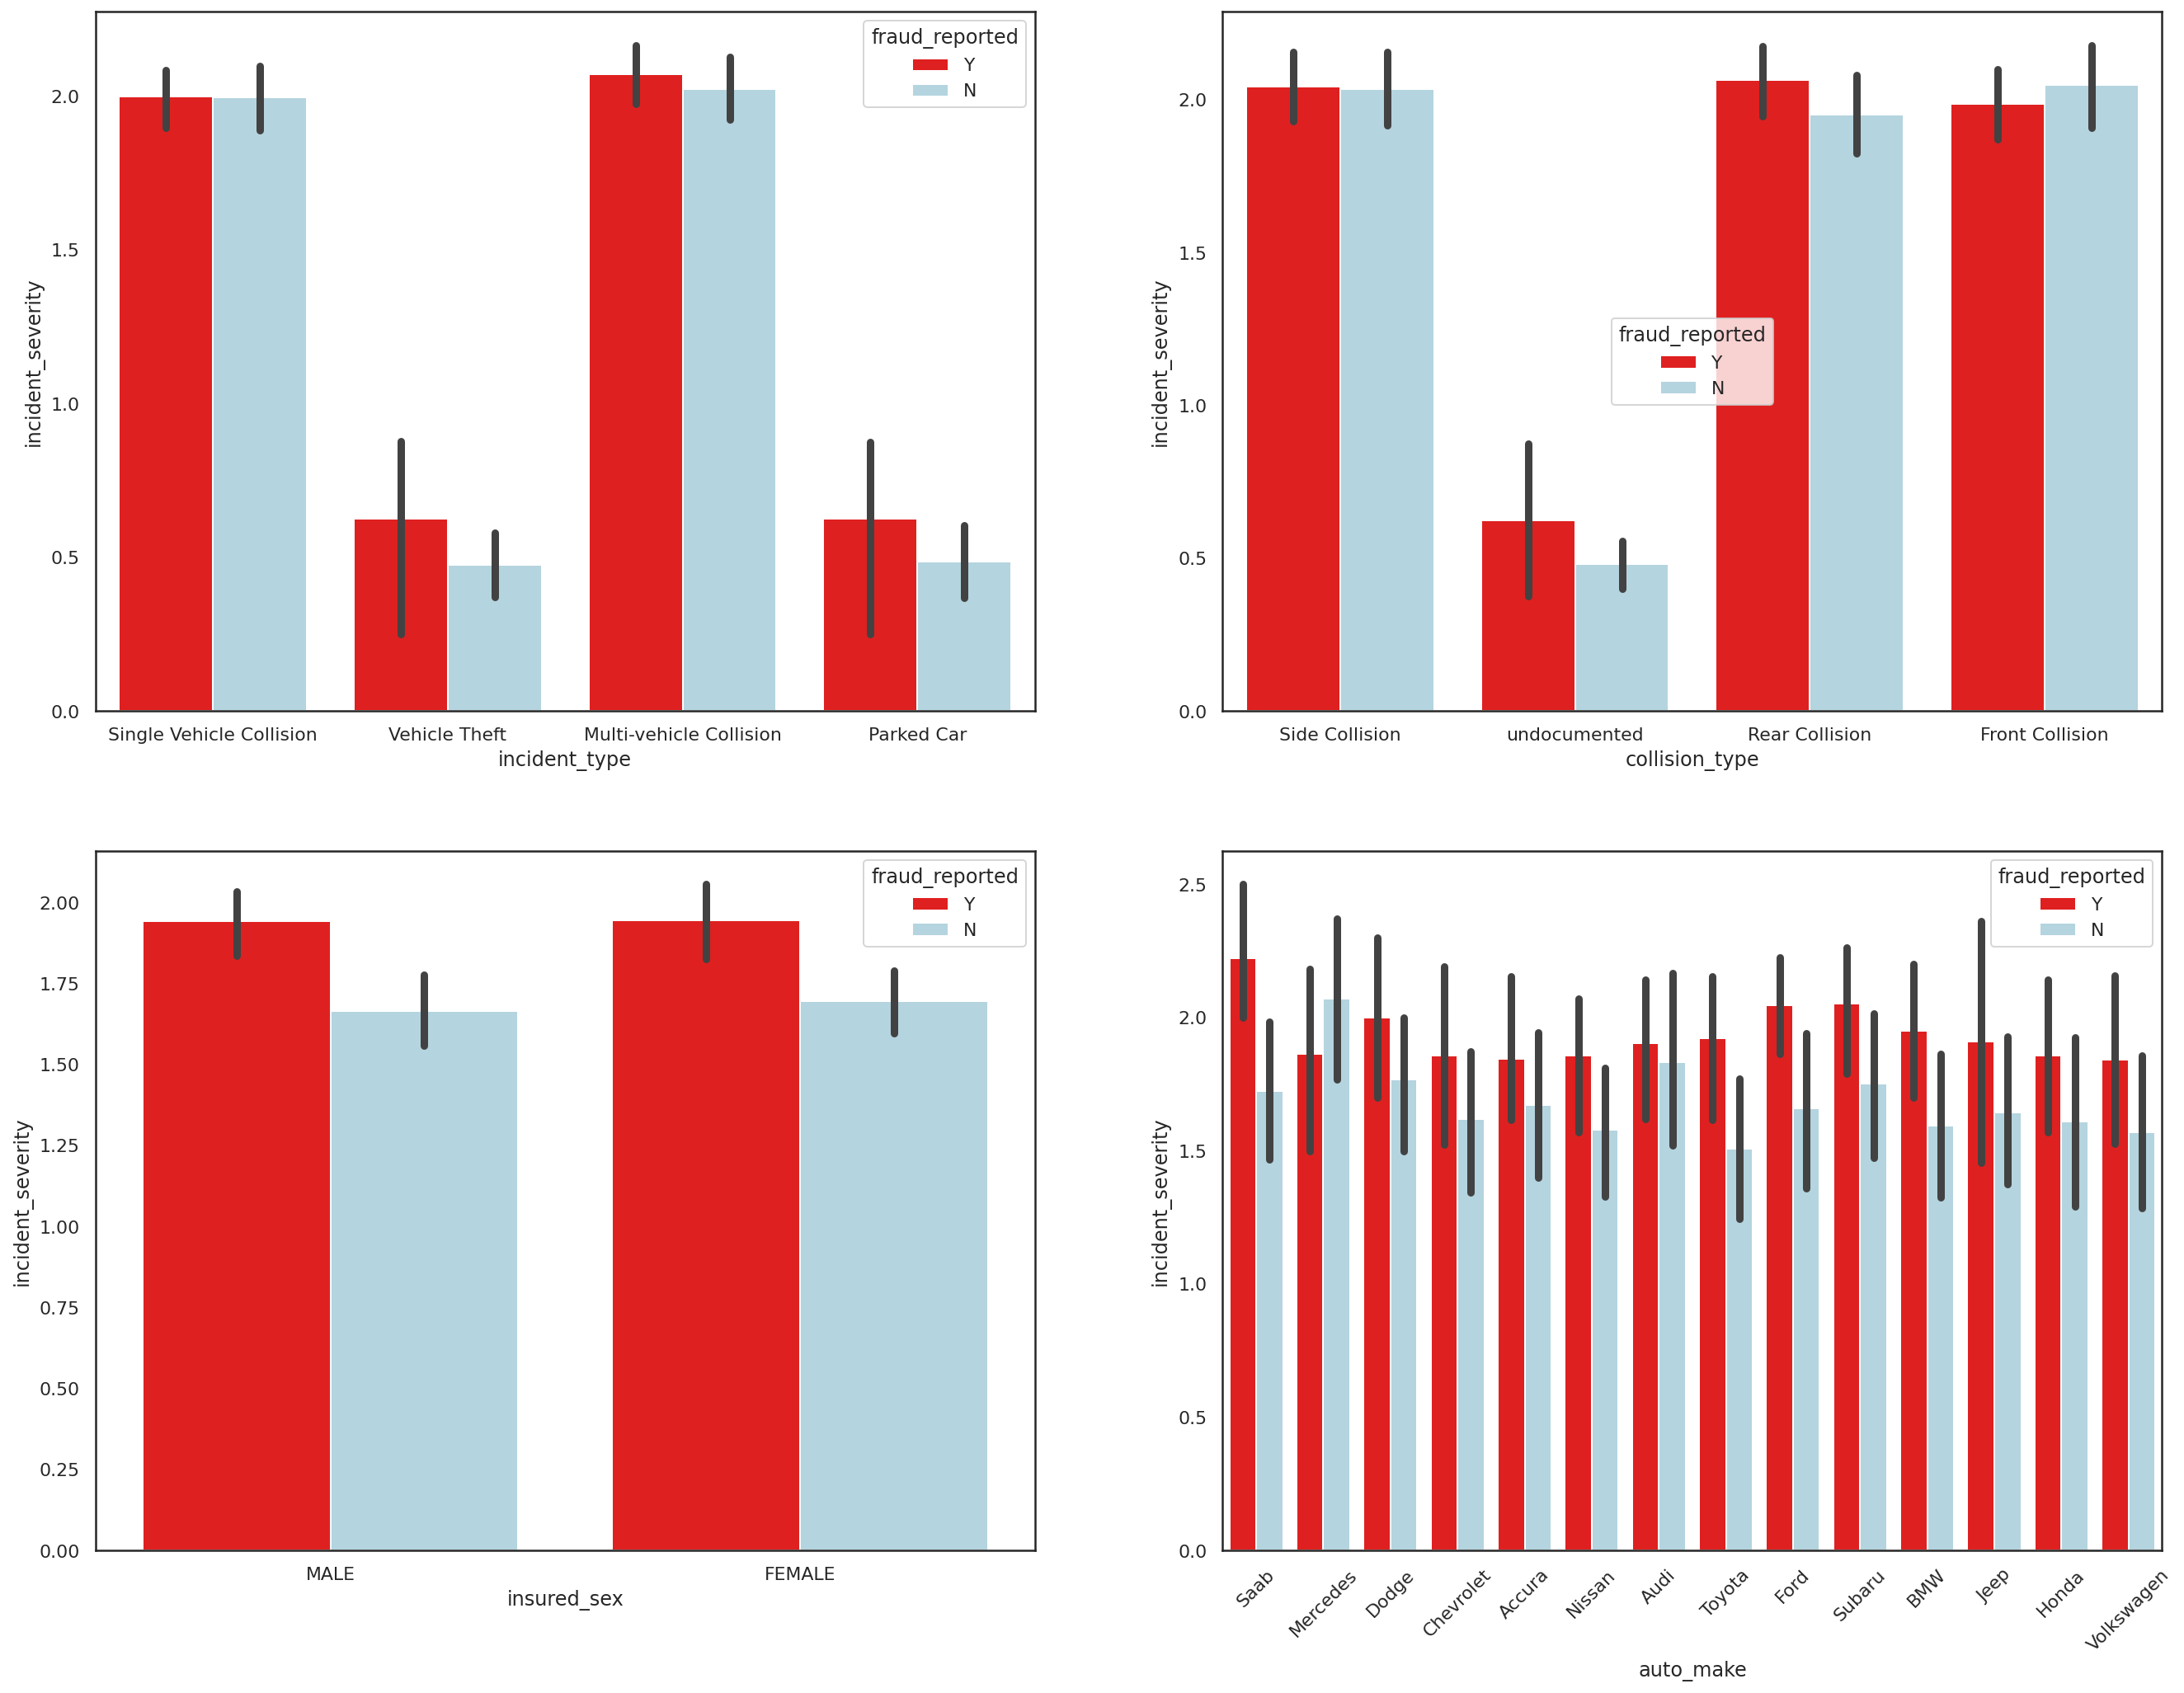

In [ ]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_type", y="incident_severity",
                hue="fraud_reported", 
                data=data, palette=['red','lightblue'], ax=axes[0][0])

axes[0][1] = sns.barplot(x="collision_type", y="incident_severity",
                hue="fraud_reported", 
                data=data, palette=['red','lightblue'], ax=axes[0][1])

axes[1][0] = sns.barplot(x="insured_sex", y="incident_severity",
                hue="fraud_reported", 
                data=data, palette=['red','lightblue'], ax=axes[1][0])

axes[1][1] = sns.barplot(x="auto_make", y="incident_severity",
                hue="fraud_reported", 
                data=data, palette=['red','lightblue'], ax=axes[1][1])

plt.xticks(rotation=45)




Although theft and parked car are less severe, they have more fraud cases. Perhaps due to acrimony and feelings of needing compensation for the perceived unfairness of an accident involving their vehicle while they were not involved or at fault. Rear collision and undocumented have more fraud. I see a trend that less severe accidents have more frauds. There is no obvious trend by sex. Saab, Subaru and Ford seem to have more fraud cases.

Text(0.5, 1.0, 'months_as_customer by age by fraud')

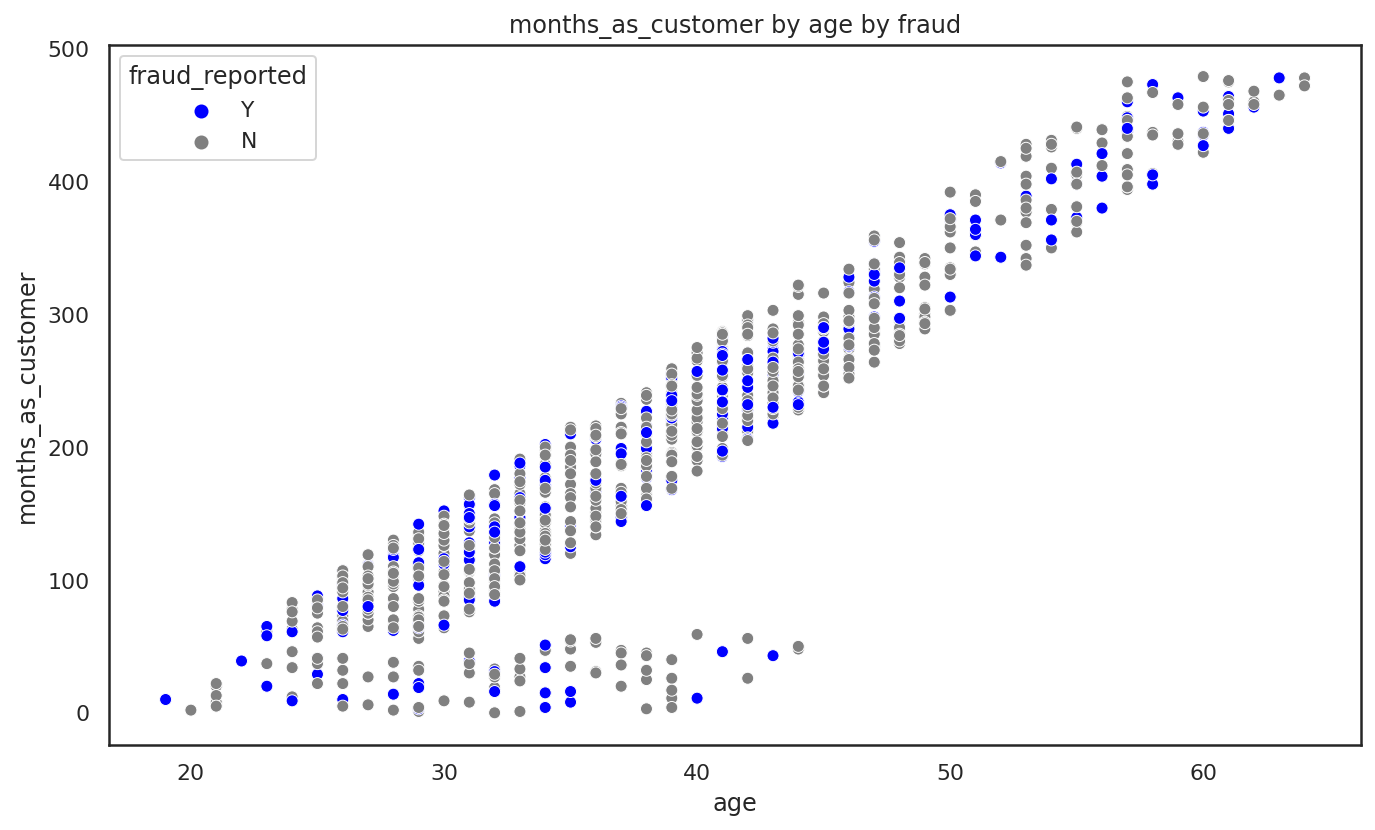

In [ ]:
#try to see if there are any iteractions
#dont seem like it 
#a bunch of people across age are relatively new insurance  customers
#the rest are drivers that have insurance over the years.
#no clear pattern of interaction here

plt.figure(figsize=(10, 6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=data,
            palette=['blue','gray'])

plt.title("months_as_customer by age by fraud")

I tried to see if there are any interactions between months as customer and age on fraud but there don’t seem to be. From the graph we can see that a group of people across age are relatively new insurance customers while the rest are drivers that have insurance over the years.

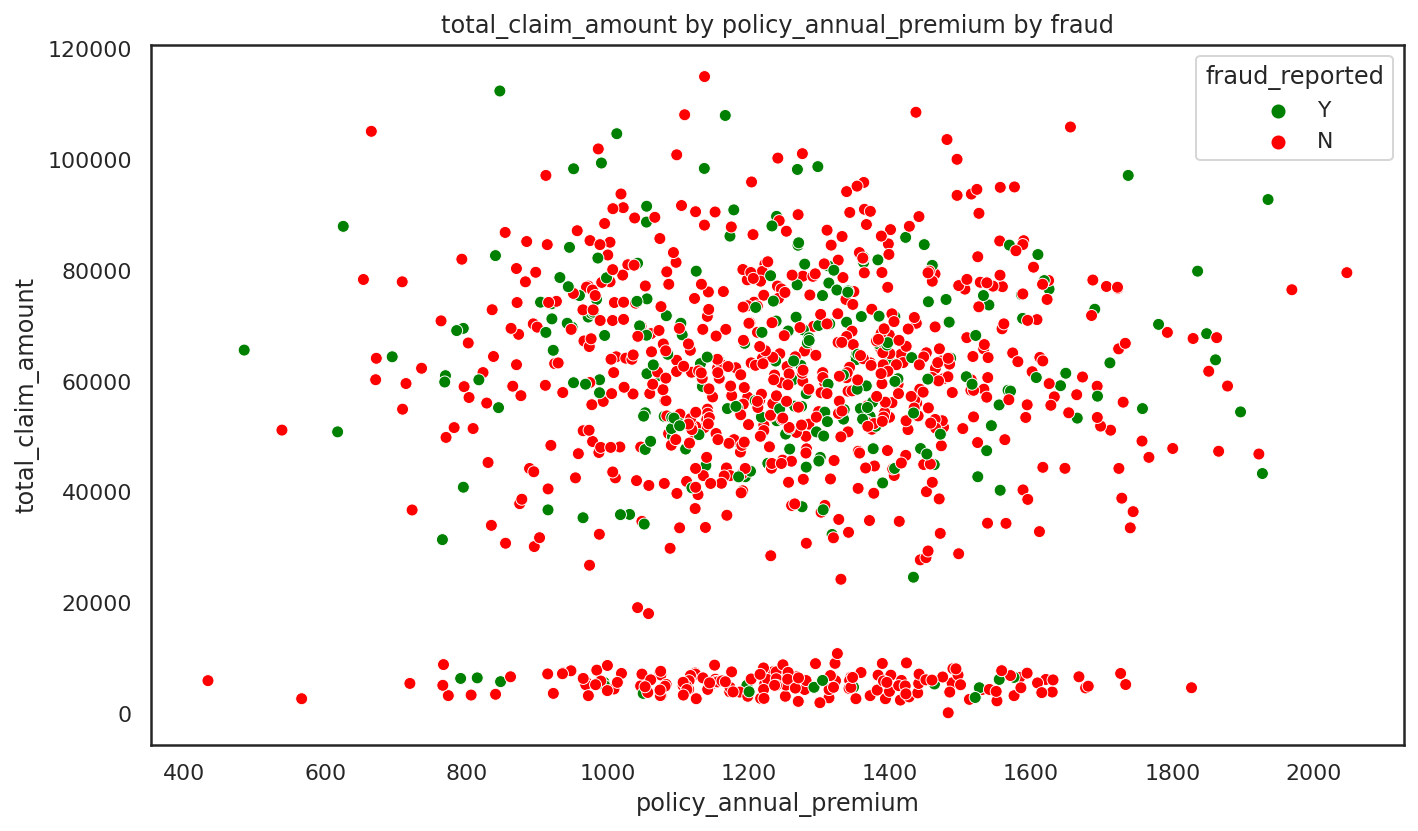

In [ ]:
#no clear pattern but seems like claims close to 0 has most frauds

plt.figure(figsize=(10, 6))

sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", 
            hue="fraud_reported", data=data,
            palette=['green','red'])

plt.title("total_claim_amount by policy_annual_premium by fraud");

When plotted total claim amount and policy annual premium and fraud as a scatter plot, there were no clear patterns, but I noticed that there seem to be a high density of frauds at lower total claim amounts (lower than $20, 000).

Text(0.5, 1.0, 'umbrella_limit by total_claim_amount by fraud')

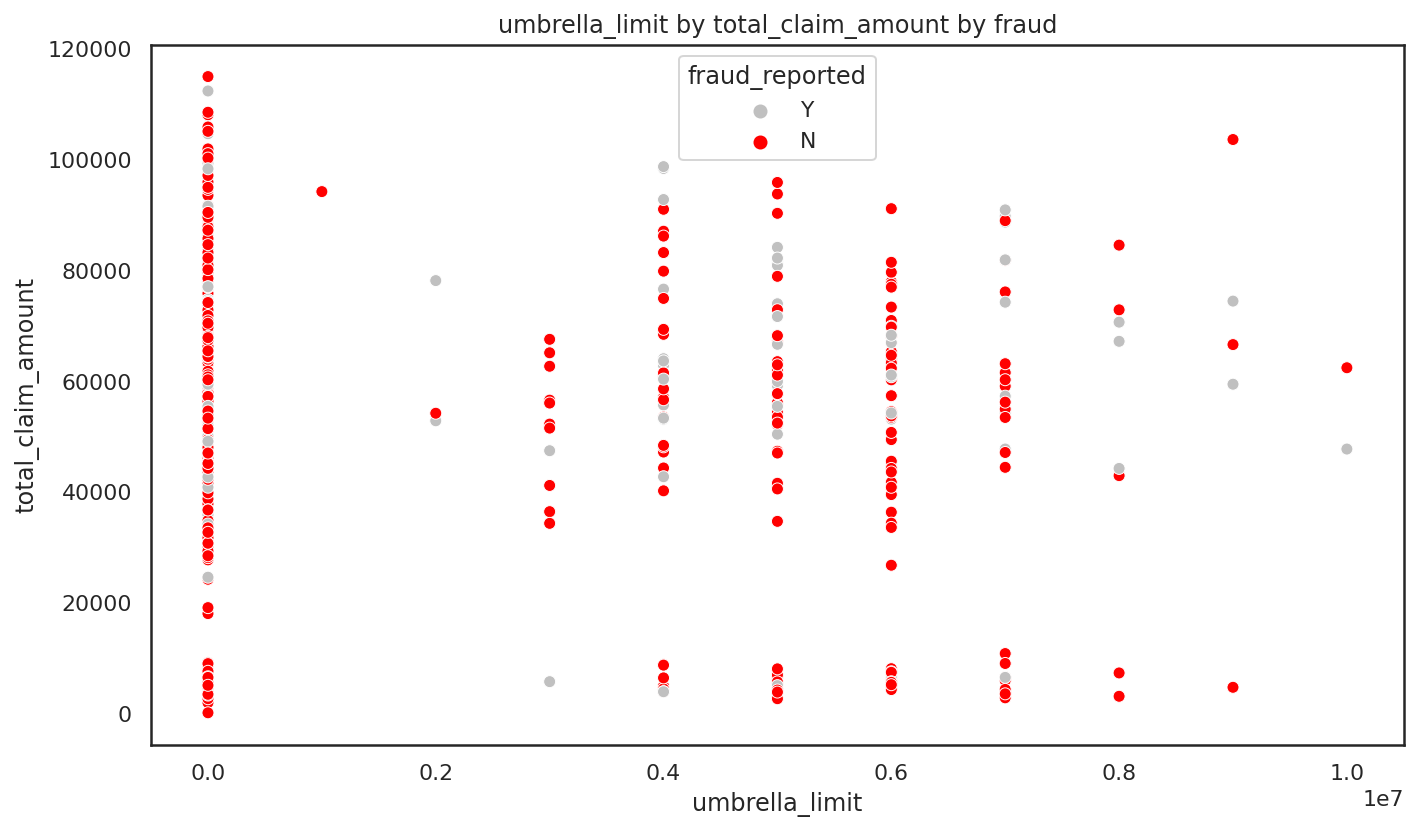

In [ ]:
#seems like no umbrella limit more fraud?
#this people may have little to lose which is why they dont perchase umbrella 
#inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud?

plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=data,
            palette=['silver','red'])

plt.title("umbrella_limit by total_claim_amount by fraud")

When I plotted seems like no umbrella limit with total claim amount, I noticed that those without umbrella limit have more density of fraud? This people may have little to lose which is why they don't purchase umbrella. Inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud.

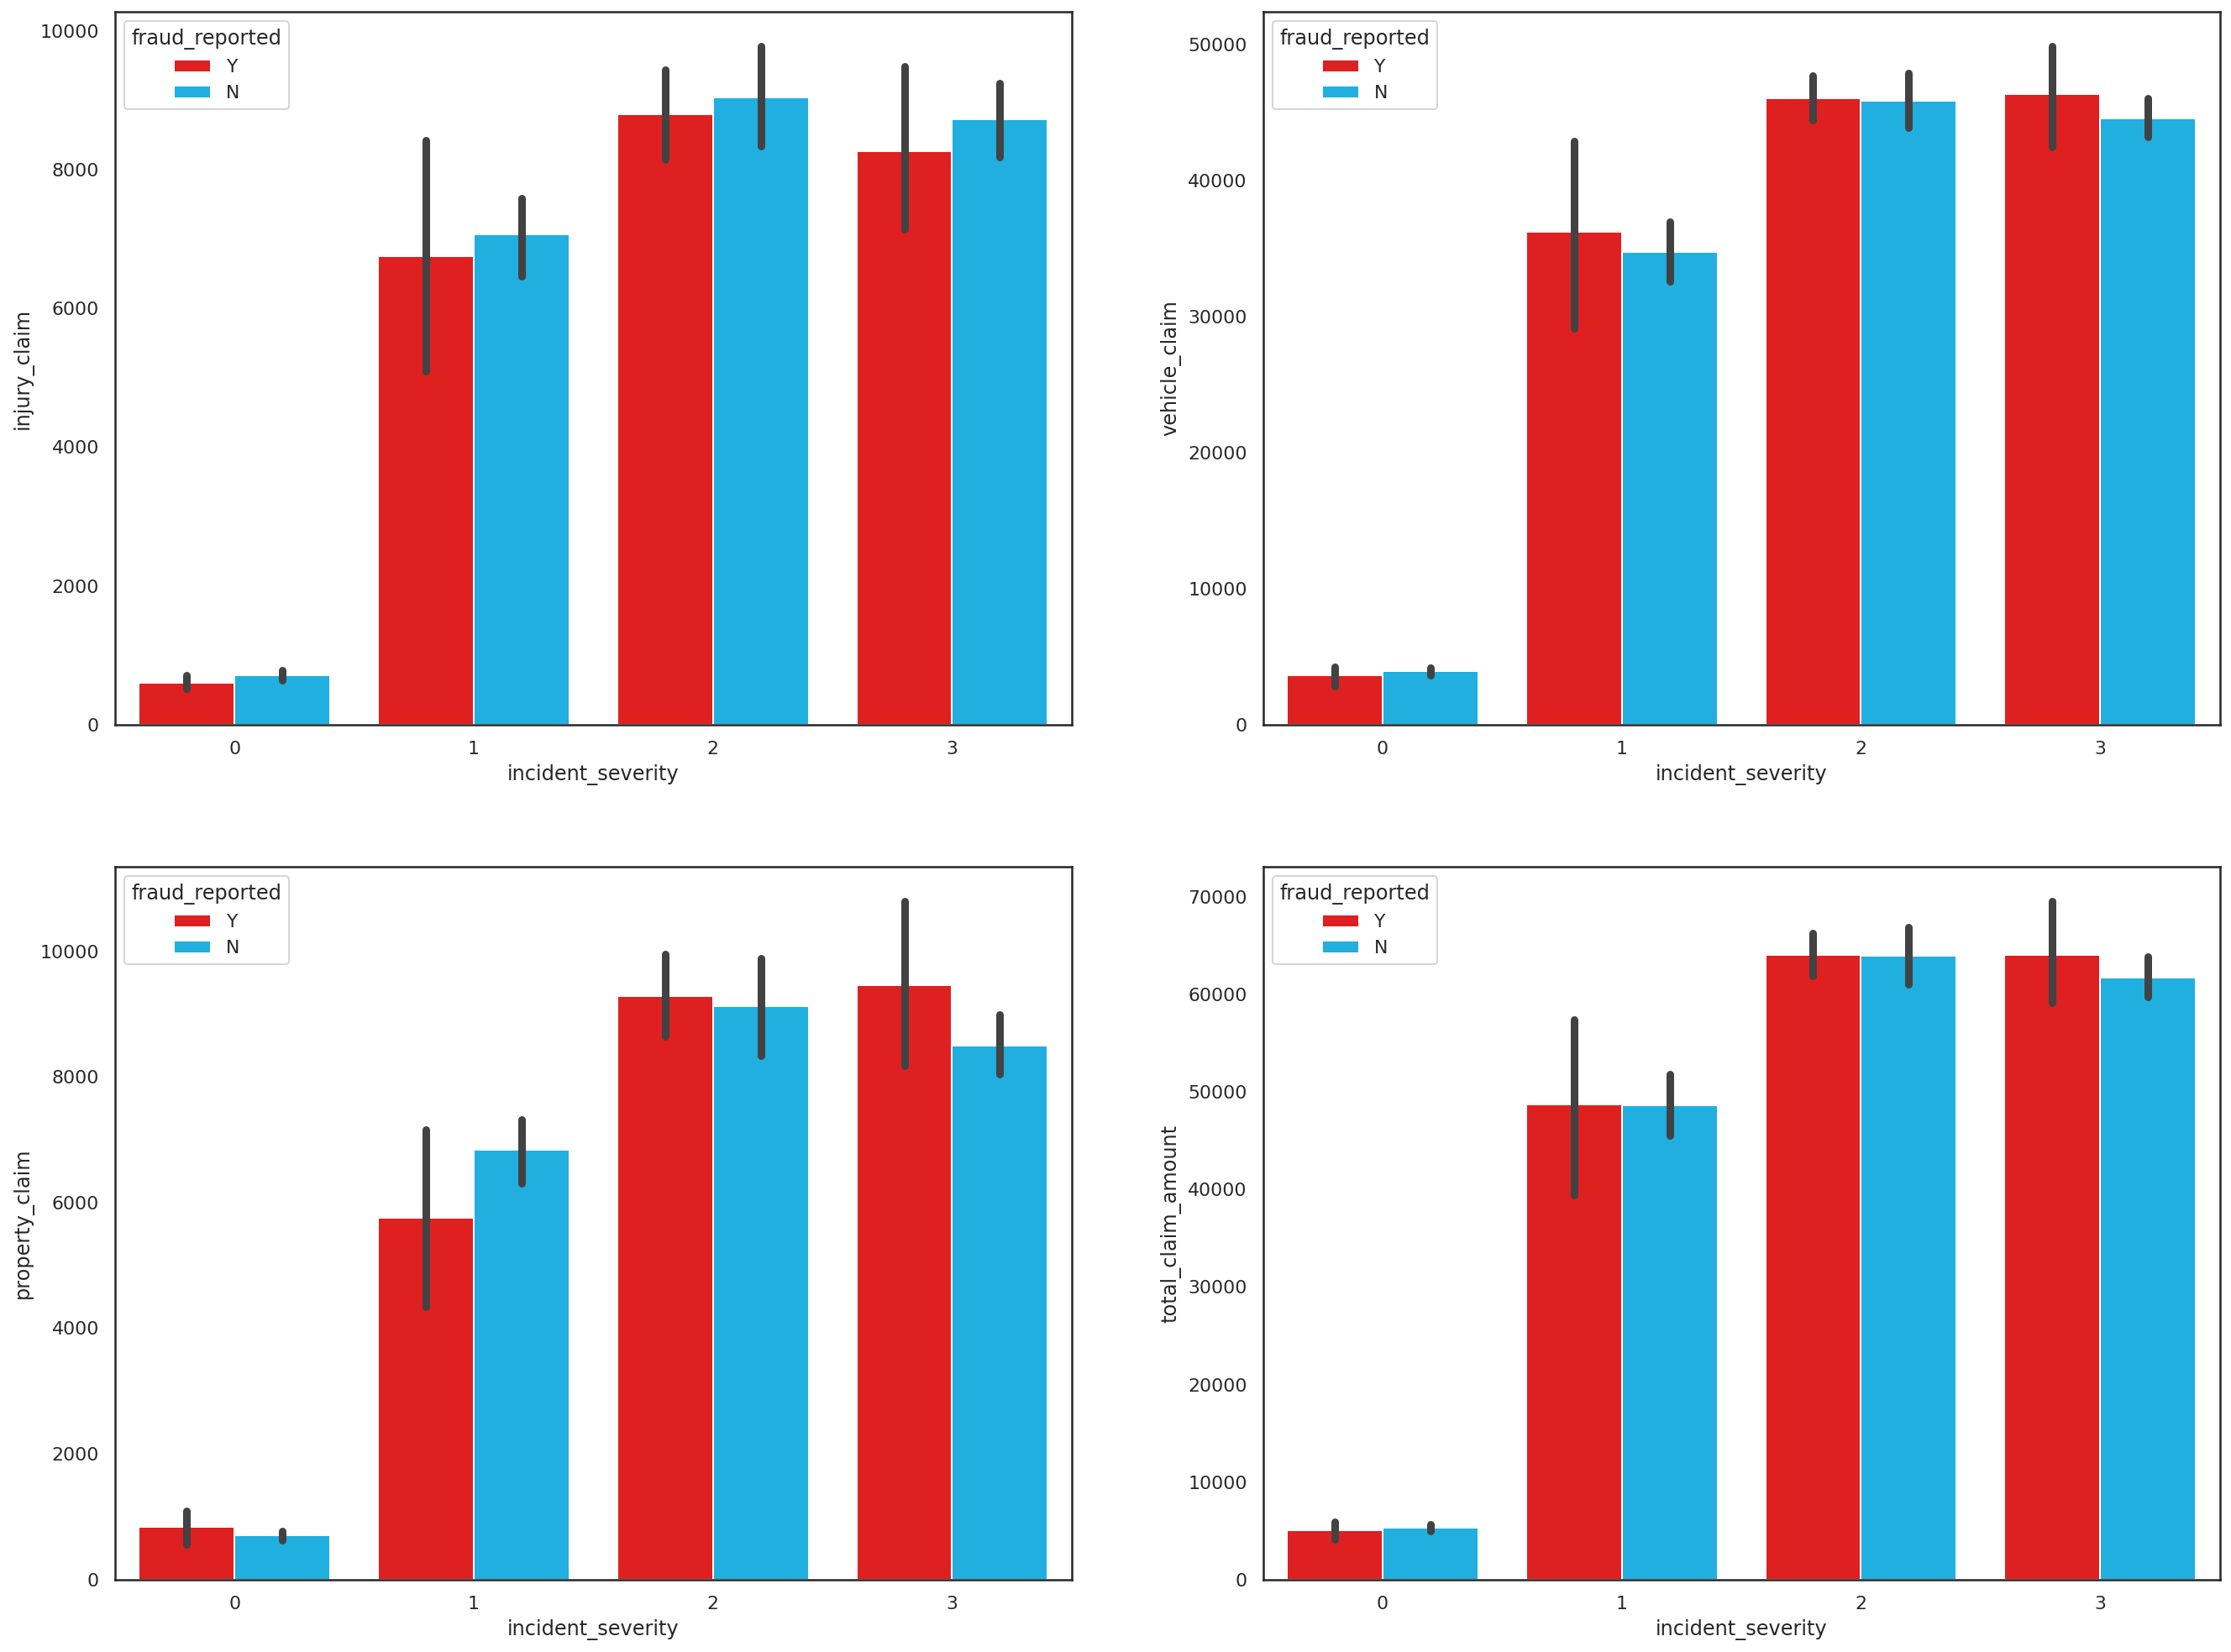

In [ ]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", 
                data=data, palette=['red','deepskyblue'], ax=axes[0][0])

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", 
                data=data, palette=['red','deepskyblue'], ax=axes[0][1])

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", 
                data=data, palette=['red','deepskyblue'], ax=axes[1][0])

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", 
                data=data, palette=['red','deepskyblue'], ax=axes[1][1])

# vehicle claims and property claims have more frauds than injury claims
# does someone act more honestly after injury??

Next, I looked at different types of claims and incident severity and frauds. Vehicle claims and property claims have more frauds than injury claims. Perhaps damage of vehicles and property causes more perceived unfairness. Trend of fraud is less obvious in total claims against incident severity as after summing and aggregating across different types of claims, the variances cancel out each other.

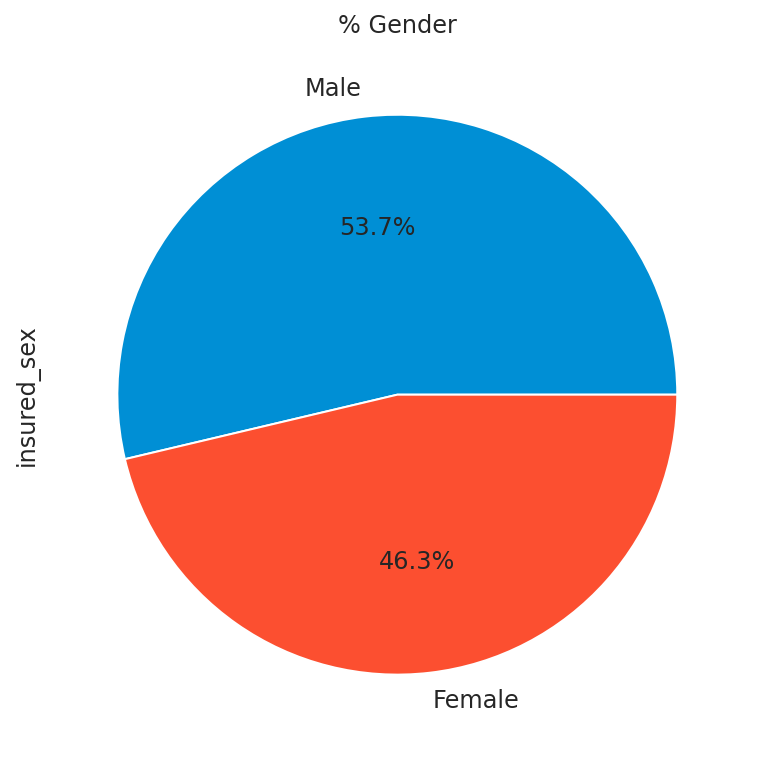

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (data['insured_sex'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

We can in total insured people 53.7% are male and 46.3% are female

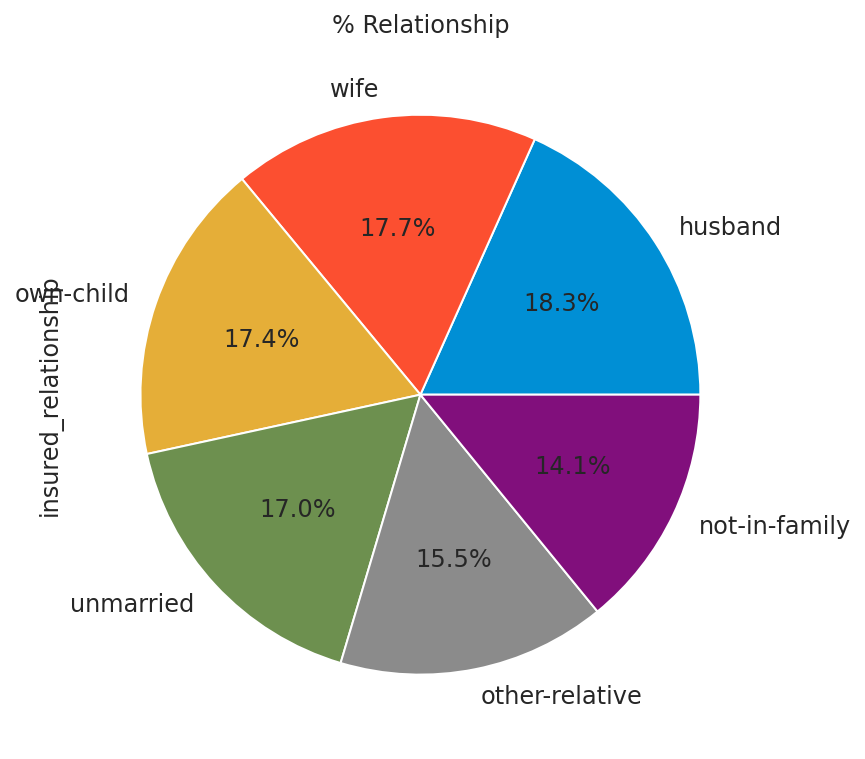

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (data['insured_relationship'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()


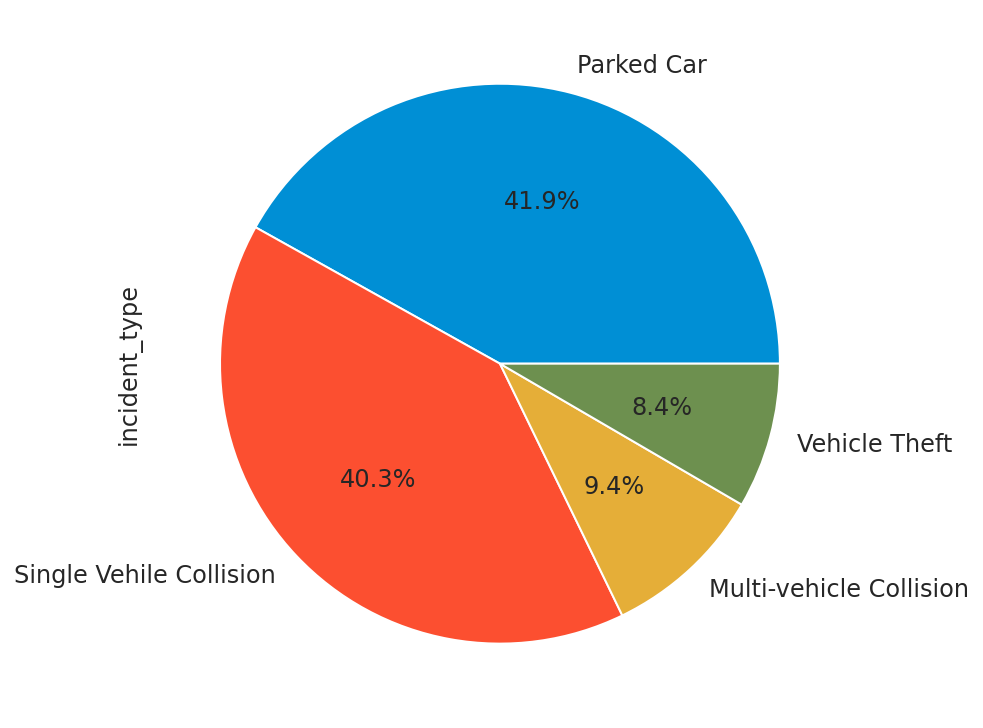

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (data['incident_type'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

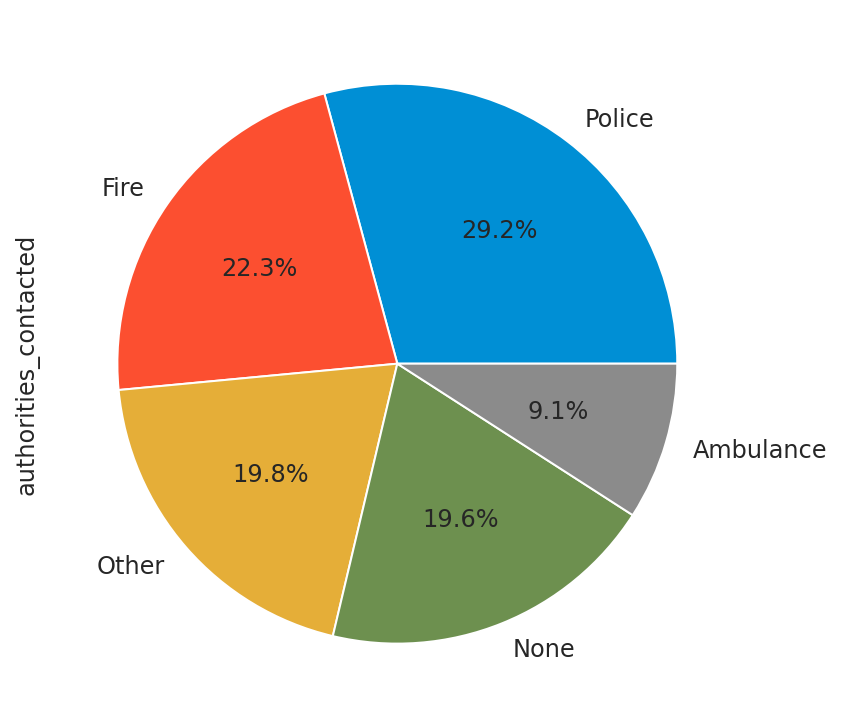

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (data['authorities_contacted'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

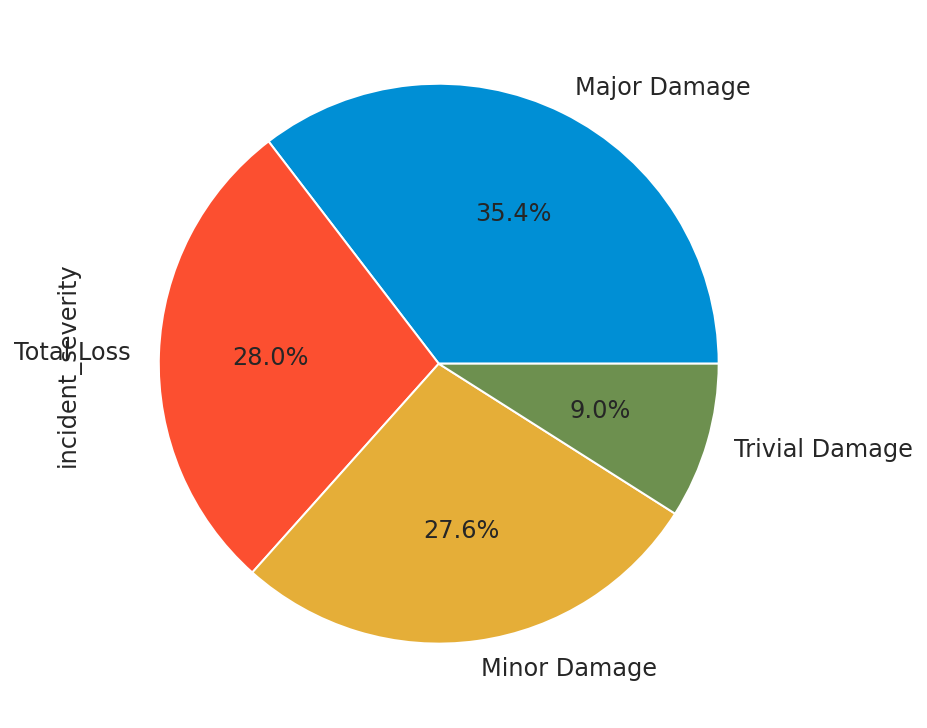

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (data['incident_severity'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

### Losses by claims

Here, I define loss as simply money going out from the insurance company. Source of money coming in, on the other hand, are premiums. Although we know premiums and claims are not the only source of money going in or out of an insurance company, these 2 variables are used since they are the only information, we have from this data set. Typically, other source of money movement maybe investments made by the insurance company, for instance.

In [ ]:
#create a variable that measure how much claims - how much premiums was paid by a client to indeicate a loss/profit

data['loss_by_claims'] = data['total_claim_amount'] - (data['policy_annual_premium'] * (2015 - data['policy_bind_year']))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


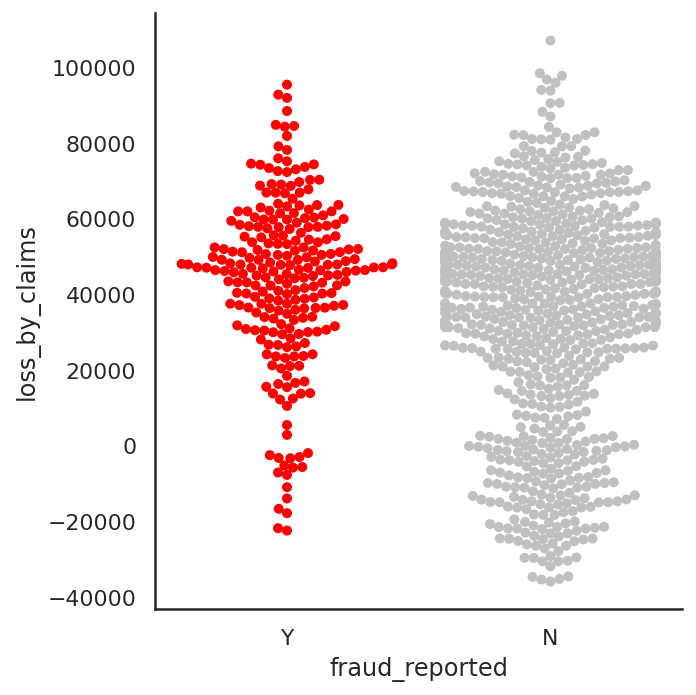

In [ ]:
#note this is not how much the insurance company earns because there are a lot of other cars with no indicents 
sns.set_style("white") 

sns.catplot(data=data, y="loss_by_claims", x="fraud_reported", hue='fraud_reported', kind='swarm', palette=['red','silver']);

In [ ]:
data[['capital-loss','capital-gains','loss_by_claims']]

capital-loss  capital-gains  loss_by_claims
0               0          53300        70203.09
1               0              0        -5704.98
2               0          35100        13452.90
3          -62400          48900        28006.50
4          -46000          66000         4916.09
..            ...            ...             ...
995             0              0        55740.80
996             0          70900       107043.21
997             0          35100        50898.12
998             0              0        41552.32
999             0              0        -9497.61

[1000 rows x 3 columns]

In [ ]:
data.groupby('fraud_reported')['loss_by_claims'].sum()

fraud_reported
N    25126613.43
Y    10806751.60
Name: loss_by_claims, dtype: float64

In [ ]:
data.groupby('fraud_reported')['loss_by_claims'].mean()

fraud_reported
N    33368.676534
Y    43752.030769
Name: loss_by_claims, dtype: float64

In [ ]:
data.groupby('fraud_reported')['loss_by_claims'].std()

fraud_reported
N    29690.411374
Y    21812.675584
Name: loss_by_claims, dtype: float64

In [ ]:
data[['fraud_reported', 'loss_by_claims']].isnull().sum()

fraud_reported    0
loss_by_claims    0
dtype: int64

In [ ]:
df_ttest = data[['fraud_reported', 'loss_by_claims']]
df_ttest.head()

fraud_reported  loss_by_claims
0              Y        70203.09
1              Y        -5704.98
2              N        13452.90
3              Y        28006.50
4              N         4916.09

In [ ]:
from scipy.stats import pointbiserialr, stats
stats.ttest_ind(df_ttest.loc[df_ttest['fraud_reported']=='Y', 'loss_by_claims'], df_ttest.loc[df_ttest['fraud_reported']=='N', 'loss_by_claims'])

Ttest_indResult(statistic=5.065425715463792, pvalue=4.852489023999467e-07)

I created a variable that measure how much claims minus how much premiums were paid by a client to indicate losses by claim. a positive will indicate a loss while a negative will be a profit. Every time a claim is more than the total premiums paid by a client; it is a loss for the insurance company.

In 2015, the insurance company lost \\$8,198,060.09 through fraudulent claims. The average lost for fraud is \\$43,752.03*(M =  43752.03, SD = 21812.68)*, which is \\$10,383.35 more (*p < .001*). than average lost through legit claims *(M =  33368.68, SD = 29690.41)*.

Note that this is not how much the insurance company earns because the data set only show incident claims. 

The national averages for having an at-fault accident in the past, in the United States, is approximately 12 percent of car owners. 


## Preprocessing
The DV, fraud_reported was coded 1 for fraud and 0 for non-fraud. 

Six interaction terms were created. Interaction between property claim amount and incident severity, vehicle claim amount and incident severity, injury claim amount and incident severity, total claim amount and incident severity, policy annual premium and total claim amount, umbrella limit and total claim amount.

Nominal variables were one-hot encoded, and the data set was split into 75% train and 25% test set, stratified on fraud reported. 

From here we are going to use copy of the dataframe which we created after removing highly correlated columns

In [ ]:
cont_var=[i for i in cont_var if i not in to_drop]
cont_var

['age',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'policy_annual_premium',
 'policy_deductable',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'auto_year',
 'witnesses',
 'bodily_injuries',
 'policy_bind_year',
 'incident_severity']

In [ ]:
#Dv numerical code
data2['fraud_reported']=data2['fraud_reported'].map({'Y':1,'N':0})
data2['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
data2['insured_sex'] = data2['insured_sex'].map({"FEMALE":0,"MALE":1})

In [ ]:
data2['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [ ]:
#Dv numerical code
data2['insured_education_level']=data2['insured_education_level'].map({'MD':5, 'PhD':6, 'Associate':1, 'Masters':4, 'High School':0, 'College':2,
       'JD':3})
data2['insured_education_level']

0      5
1      5
2      6
3      6
4      1
      ..
995    4
996    6
997    4
998    1
999    1
Name: insured_education_level, Length: 1000, dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# x= LabelEncoder().fit_transform(data['insured_education_level'])
# k=pd.DataFrame(x)
# k[0].unique()


In [ ]:
data2['capital-loss']=data2['capital-loss']*(-1)

In [ ]:
data2['capital-loss'].max()

111100

**Dummy Coding**

In [ ]:
rem = ['insured_sex','incident_month','insured_education_level']
dum_list = [e for e in nom_var if e not in rem]
len(dum_list)

13

In [ ]:
nom_var

['collision_type',
 'policy_state',
 'insured_hobbies',
 'incident_month',
 'auto_make',
 'policy_csl',
 'incident_type',
 'insured_relationship',
 'insured_education_level',
 'authorities_contacted',
 'property_damage',
 'insured_sex',
 'incident_city',
 'insured_occupation',
 'incident_state',
 'police_report_available']

In [ ]:
dum = pd.get_dummies(data2[dum_list], drop_first=True)
dum.head()

collision_type_Rear Collision  collision_type_Side Collision  \
0                              0                              1   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   collision_type_undocumented  policy_state_IN  policy_state_OH  \
0                            0                0                1   
1                            1                1                0   
2                            0                0                1   
3                            0                0                0   
4                            1                0                0   

   insured_hobbies_basketball  insured_hobbies_board-games  \
0                           0                            0   
1                           0                            0   
2                           0                            1   
3                           0                            1   
4                           0                            1   

   insured_hobbies_bungie-jumping  insured_hobbies_camping  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   insured_hobbies_chess  insured_hobbies_cross-fit  insured_hobbies_dancing  \
0                      0                          0                        0   
1                      0                          0                        0   
2                      0                          0                        0   
3                      0                          0                        0   
4                      0                          0                        0   

   insured_hobbies_exercise  insured_hobbies_golf  insured_hobbies_hiking  \
0                         0                     0                       0   
1                         0                     0                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   

   insured_hobbies_kayaking  insured_hobbies_movies  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   insured_hobbies_paintball  insured_hobbies_polo  insured_hobbies_reading  \
0                          0                     0                        0   
1                          0                     0                        1   
2                          0                     0                        0   
3                          0                     0                        0   
4                          0                     0                        0   

   insured_hobbies_skydiving  insured_hobbies_sleeping  \
0                          0                         1   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   insured_hobbies_video-games  insured_hobbies_yachting  auto_make_Audi  \
0                            0                         0               0   
1                            0                         0               0   
2                            0                         0               0   
3                            0            

In [ ]:
dum.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)
df_dummied = pd.concat([dum, data2], axis=1)

In [ ]:
df_dummied.drop(dum_list, axis=1, inplace=True)

In [ ]:
df_dummied.head()

collision_type_Rear Collision  collision_type_Side Collision  \
0                              0                              1   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   collision_type_undocumented  policy_state_IN  policy_state_OH  \
0                            0                0                1   
1                            1                1                0   
2                            0                0                1   
3                            0                0                0   
4                            1                0                0   

   insured_hobbies_basketball  insured_hobbies_board-games  \
0                           0                            0   
1                           0                            0   
2                           0                            1   
3                           0                            1   
4                           0                            1   

   insured_hobbies_bungie-jumping  insured_hobbies_camping  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   insured_hobbies_chess  insured_hobbies_cross-fit  insured_hobbies_dancing  \
0                      0                          0                        0   
1                      0                          0                        0   
2                      0                          0                        0   
3                      0                          0                        0   
4                      0                          0                        0   

   insured_hobbies_exercise  insured_hobbies_golf  insured_hobbies_hiking  \
0                         0                     0                       0   
1                         0                     0                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   

   insured_hobbies_kayaking  insured_hobbies_movies  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   insured_hobbies_paintball  insured_hobbies_polo  insured_hobbies_reading  \
0                          0                     0                        0   
1                          0                     0                        1   
2                          0                     0                        0   
3                          0                     0                        0   
4                          0                     0                        0   

   insured_hobbies_skydiving  insured_hobbies_sleeping  \
0                          0                         1   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   insured_hobbies_video-games  insured_hobbies_yachting  auto_make_Audi  \
0                            0                         0               0   
1                            0                         0               0   
2                            0                         0               0   
3                            0            

In [ ]:
df_dummied.isnull().sum().any()

False

In [ ]:
df_dummied['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
         ...   
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [ ]:
dd = df_dummied.describe()
dd.loc['min']

collision_type_Rear Collision                0.00
collision_type_Side Collision                0.00
collision_type_undocumented                  0.00
policy_state_IN                              0.00
policy_state_OH                              0.00
insured_hobbies_basketball                   0.00
insured_hobbies_board-games                  0.00
insured_hobbies_bungie-jumping               0.00
insured_hobbies_camping                      0.00
insured_hobbies_chess                        0.00
insured_hobbies_cross-fit                    0.00
insured_hobbies_dancing                      0.00
insured_hobbies_exercise                     0.00
insured_hobbies_golf                         0.00
insured_hobbies_hiking                       0.00
insured_hobbies_kayaking                     0.00
insured_hobbies_movies                       0.00
insured_hobbies_paintball                    0.00
insured_hobbies_polo                         0.00
insured_hobbies_reading                      0.00


In [ ]:
df_dummied.shape

(1000, 100)

In [ ]:
df_dummied['insured_education_level']

0      5
1      5
2      6
3      6
4      1
      ..
995    4
996    6
997    4
998    1
999    1
Name: insured_education_level, Length: 1000, dtype: int64

### **Train Test Split**
###### using stratify

In [ ]:

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, stratify=y, random_state=42)

In [ ]:
y_train.value_counts()

0    565
1    185
Name: fraud_reported, dtype: int64

In [ ]:
y_test.value_counts()

0    188
1     62
Name: fraud_reported, dtype: int64

## Baseline accuracy score

As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%. 

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

- Sensitivity: 1.0
- Specificity: 0.0
- Precision: 0.248
- F1 score: 0.397
- ROC AUC Score: 0.50

As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70. 

In [ ]:
base_recall = 62/(62)
base_speci = 0/(188)
base_preci = 62/(250)
base_f1 = 2*base_recall*base_preci/(base_recall+base_preci)


df_prob = pd.DataFrame()
df_prob['y']=y_test
df_prob['pred']=1
auc_score = roc_auc_score(df_prob['y'], df_prob['pred'])


print("If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:")
print("")
print("Sensitivity:", base_recall)
print('Specificity:', base_speci)
print('Precision:', base_preci)
print('F1 score:', base_f1)
print('ROC AUC Score:', auc_score)


If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.3974358974358974
ROC AUC Score: 0.5


As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%. 

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

- Sensitivity: 1.0
- Specificity: 0.0
- Precision: 0.248
- F1 score: 0.397
- ROC AUC Score: 0.50

As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70.

### 1. Model with class weighting and hyperparameter tuning

The five classifiers as per stated above were ran with hyperparameter tuning. Models that had option for class weighting had class weighting as one of the hyperparameters in this block of models. That is, the RandomizedSearch will test a weighted and non-weighted model to see which performed better. 

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset. For example, the class distribution of the test dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class; for example:{0:1.0, 1:100.0}. In our case, class weights were {0:0.246667, 1:0.75333}. In XGBoost, class weights are defined differently. XGBoost uses scale positive weight which is the total negative examples divided by the total positive examples. For an imbalanced binary classification dataset, the negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1). The scaled positive weight in this analysis is 3.054.

In [ ]:
#function to use for scoring 

def scores(t, name,base=1):
    predictions = t.predict(x_test)
    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
    sensi = TP/(TP + FN)
    speci= TN/(TN + FP)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)
    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)

    if base==1:

      print (name, 'classification metric')
      print("CV scores:", round(t.best_score_,3))
      print("train score:", round(t.score(x_train, y_train),3))
      print("test score:", round(t.score(x_test, y_test),3))

      #Evaluation metrics
      
      print(f'Sensitivity: {round(sensi,3)}')
      print(f'Specificity: {round(speci,3)}')
      print(f'Precision: {round(preci,3)}')
      print(f'F1: {round(f1,3)}')

      
      print('ROC AUC Score:', round(auc_score,3))
    if base==0:
      eval=[round(t.best_score_,3),round(t.score(x_train, y_train),3),round(t.score(x_test, y_test),3),round(sensi,3),round(speci,3),round(preci,3),round(f1,3),round(auc_score,3)]
      return eval

### Logistic regression

In [ ]:
y_train.value_counts(normalize=True)

0    0.753333
1    0.246667
Name: fraud_reported, dtype: float64

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset. For example, the class distribution of the test dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class; for example:{0:1.0, 1:100.0}

In [ ]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            'class_weight':[{0:0.246667, 1:0.75333},None]}

    
rs_lr = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr.fit(x_train, y_train, )
print(rs_lr.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 910.2981779915227}


### KNN

In [ ]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn.fit(x_train, y_train)
print(rs_knn.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 7, 'knn__metric': 'euclidean', 'knn__leaf_size': 7, 'knn__algorithm': 'brute'}


### Random forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 500, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'class_weight': {0: 0.246667, 1: 0.75333}}


### XGBoost

scale_pos_weight = total_negative_examples / total_positive_examples

For an imbalanced binary classification dataset, the negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1).

In [ ]:
#scaled positive weight
565/185

3.054054054054054

In [ ]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'scale_pos_weight':[1, 3.054054054054054],
              }


    
rs_xg = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg.fit(x_train, y_train)
print(rs_xg.best_params_)

{'scale_pos_weight': 3.054054054054054, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 650, 'max_depth': 4, 'gamma': 1, 'eta': 0.3}


### AdaBoost

In [ ]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab.fit(x_train, y_train)
print(rs_ab.best_params_)

{'n_estimators': 200, 'learning_rate': 0.3}


### Evaluate

In [ ]:
classifiers={'logreg':rs_lr, 'knn':rs_knn, 'Randomforest':rs_rf, 
             'XGB':rs_xg, 'AdaBoost':rs_ab}

for key, value in classifiers.items(): 
    print(scores(value,key))
    print("__________________________")
    print(" ")
    


logreg classification metric
CV scores: 0.765
train score: 0.837
test score: 0.708
Sensitivity: 0.323
Specificity: 0.835
Precision: 0.392
F1: 0.354
ROC AUC Score: 0.653
None
__________________________
 
knn classification metric
CV scores: 0.78
train score: 1.0
test score: 0.752
Sensitivity: 0.242
Specificity: 0.92
Precision: 0.5
F1: 0.326
ROC AUC Score: 0.65
None
__________________________
 
Randomforest classification metric
CV scores: 0.784
train score: 0.989
test score: 0.768
Sensitivity: 0.258
Specificity: 0.936
Precision: 0.571
F1: 0.356
ROC AUC Score: 0.81
None
__________________________
 
XGB classification metric
CV scores: 0.844
train score: 0.992
test score: 0.816
Sensitivity: 0.694
Specificity: 0.856
Precision: 0.614
F1: 0.652
ROC AUC Score: 0.833
None
__________________________
 
AdaBoost classification metric
CV scores: 0.817
train score: 0.905
test score: 0.792
Sensitivity: 0.468
Specificity: 0.899
Precision: 0.604
F1: 0.527
ROC AUC Score: 0.829
None
____________________

### 2. Modeling with Oversampling using SMOTE

The five classifiers were running on a SMOTE data set, with hyperparameter tuning. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbours for that example are found (typically k=5). A randomly selected neighbour is chosen, and a synthetic example is created at a randomly selected point between the two examples in feature space. SMOTE over sampling was done only to the training set. After SMOTE, both fraud and non-fraud have 565 samples in the training set. As SMOTE is designed to handle imbalanced classes, no weighting of classes was done. 

In [ ]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

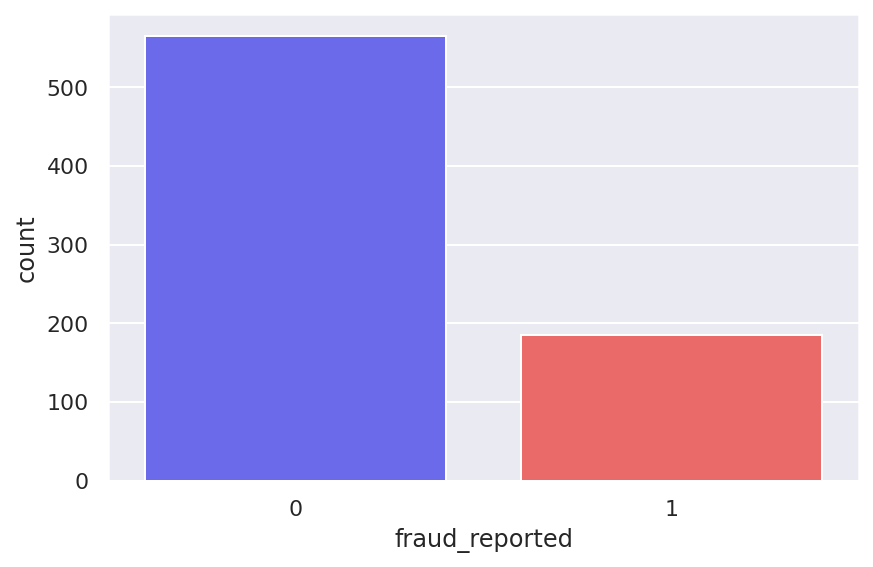

In [ ]:
#dist of dv
sns.set()
sns.countplot(x=y_train, palette='seismic');

0    565
1    565
Name: fraud_reported, dtype: int64


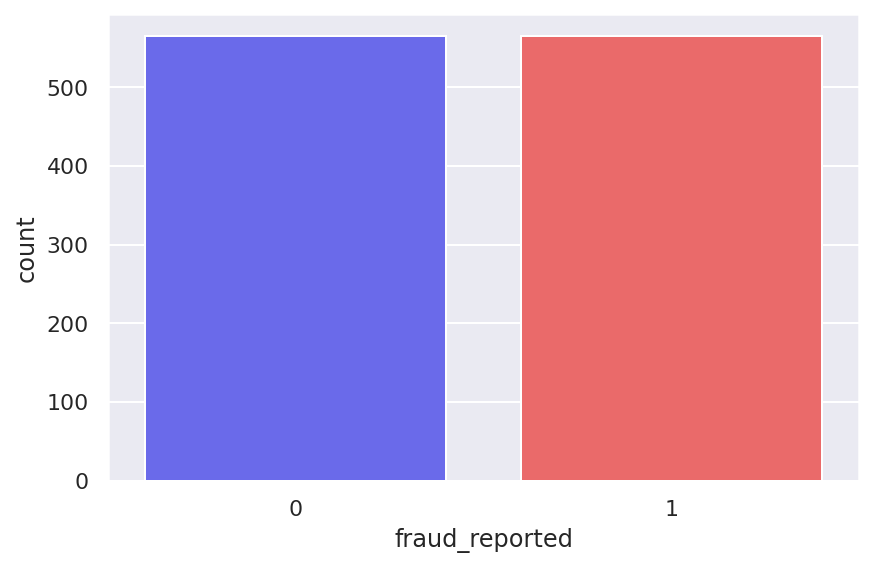

In [ ]:
#SMOTE data for train set

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
print(y_train.value_counts())

sns.countplot(x=y_train, palette='seismic');

### Logistic regression

In [ ]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr2 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr2.fit(x_train, y_train)
print(rs_lr2.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


### KNN

In [ ]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn2 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn2.fit(x_train, y_train)
print(rs_knn2.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


### Random forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf2 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf2.fit(x_train, y_train)
print(rs_rf2.best_params_)

### XGBoost

In [ ]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg2 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg2.fit(x_train, y_train)
print(rs_xg2.best_params_)

{'reg_lambda': 0.01, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 6, 'gamma': 3, 'eta': 0.1}


### AdaBoost

In [ ]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab2 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab2.fit(x_train, y_train)
print(rs_ab2.best_params_)

{'n_estimators': 250, 'learning_rate': 0.5}


In [ ]:
classifiers2={'logreg2':rs_lr2, 'knn2':rs_knn2, 'Ranfor2':rs_rf2, 
             'XGB2':rs_xg2, 'AdaBoost2':rs_ab2} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.83
train score: 0.882
test score: 0.712
Sensitivity: 0.387
Specificity: 0.819
Precision: 0.414
F1: 0.4
ROC AUC Score: 0.644
None
________________
 
knn2 classification metric
CV scores: 0.556
train score: 1.0
test score: 0.364
Sensitivity: 0.887
Specificity: 0.191
Precision: 0.266
F1: 0.409
ROC AUC Score: 0.571
None
________________
 
Ranfor2 classification metric
CV scores: 0.844
train score: 0.996
test score: 0.756
Sensitivity: 0.177
Specificity: 0.947
Precision: 0.524
F1: 0.265
ROC AUC Score: 0.752
None
________________
 
XGB2 classification metric
CV scores: 0.867
train score: 0.967
test score: 0.8
Sensitivity: 0.581
Specificity: 0.872
Precision: 0.6
F1: 0.59
ROC AUC Score: 0.822
None
________________
 
AdaBoost2 classification metric
CV scores: 0.867
train score: 0.934
test score: 0.78
Sensitivity: 0.452
Specificity: 0.888
Precision: 0.571
F1: 0.505
ROC AUC Score: 0.801
None
________________
 


### 3. Modeling with Oversampling using ADASYN

ADASYN does is same as SMOTE just with a minor improvement. After creating those sample, it adds a random small value to the points thus making it more realistic. In other words, instead of all the sample being linearly correlated to the parent they have a little more variance and noise in them and are a bit scattered. ADASYN over sampling was done only to the training set. After ADASYN, both fraud and non-fraud have 565 samples in the training set. The five classifiers were running on the ADASYN data set, with hyperparameter tuning.

In [ ]:
#have to redefine since the smote has already altered the data
x=df_dummied.drop('fraud_reported',axis=1)
y=df_dummied['fraud_reported']

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)


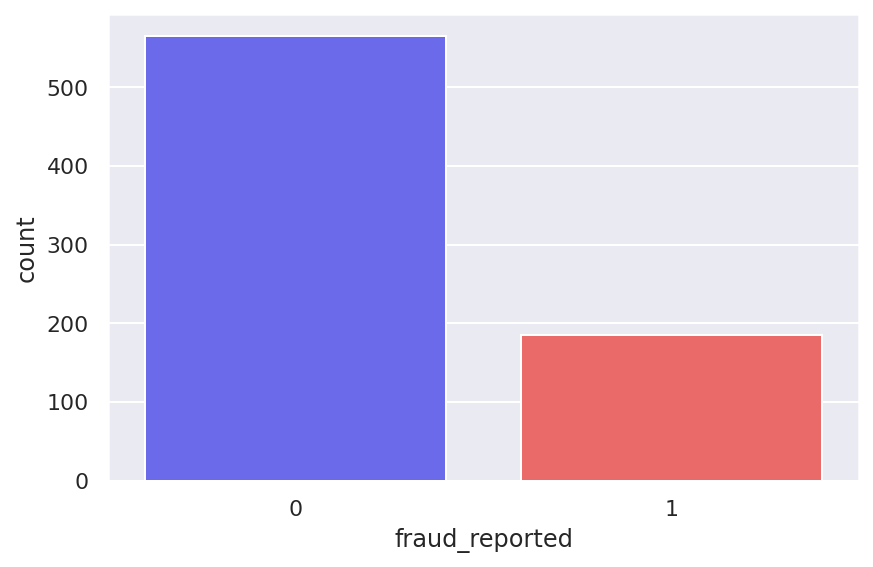

In [ ]:
sns.countplot(x=y_train,palette='seismic')

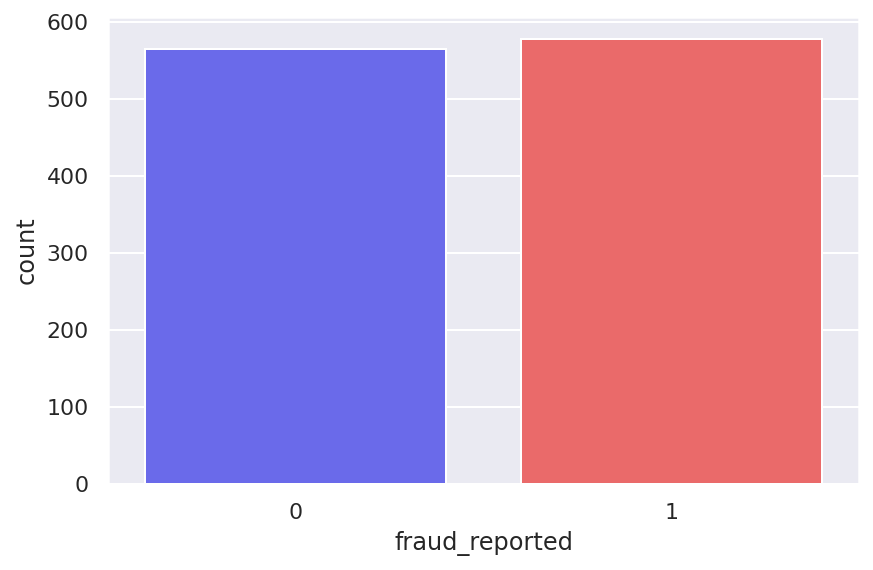

In [ ]:
#adasyn data for train set

oversample=ADASYN()
x_train,y_train=oversample.fit_resample(x_train,y_train)
sns.countplot(x=y_train,palette='seismic')

### Logistic regression

In [ ]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr4 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr4.fit(x_train, y_train)
print(rs_lr4.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


### KNN

In [ ]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn4 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn4.fit(x_train, y_train)
print(rs_knn4.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


### Random forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
              }


rs_rf4 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf4.fit(x_train, y_train)
print(rs_rf4.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


### XGBoost

In [ ]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg4 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg4.fit(x_train, y_train)
print(rs_xg4.best_params_)

{'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 600, 'max_depth': 6, 'gamma': 2, 'eta': 0.3}


### AdaBoost


In [ ]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab4 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab4.fit(x_train, y_train)
print(rs_ab4.best_params_)

{'n_estimators': 250, 'learning_rate': 0.5}


In [ ]:
classifiers4={'logreg4':rs_lr4, 'knn4':rs_knn4, 'Ranfor4':rs_rf4, 
             'XGB4':rs_xg4, 'AdaBoost4':rs_ab4} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.83
train score: 0.884
test score: 0.712
Sensitivity: 0.387
Specificity: 0.819
Precision: 0.414
F1: 0.4
ROC AUC Score: 0.644
None
________________
 
knn2 classification metric
CV scores: 0.556
train score: 1.0
test score: 0.364
Sensitivity: 0.887
Specificity: 0.191
Precision: 0.266
F1: 0.409
ROC AUC Score: 0.571
None
________________
 
Ranfor2 classification metric
CV scores: 0.844
train score: 0.996
test score: 0.756
Sensitivity: 0.177
Specificity: 0.947
Precision: 0.524
F1: 0.265
ROC AUC Score: 0.752
None
________________
 
XGB2 classification metric
CV scores: 0.867
train score: 0.966
test score: 0.8
Sensitivity: 0.581
Specificity: 0.872
Precision: 0.6
F1: 0.59
ROC AUC Score: 0.822
None
________________
 
AdaBoost2 classification metric
CV scores: 0.867
train score: 0.934
test score: 0.78
Sensitivity: 0.452
Specificity: 0.888
Precision: 0.571
F1: 0.505
ROC AUC Score: 0.801
None
________________
 


### 4. Modeling with Oversampling using bootstrapping

Unlike SMOTE or ADASYN, bootstrap draws from the already existing distribution and does not create synthetic data. Thus, data are simply repeating of existing and are perceived by many to be less biased. Bootstrap oversampling was conducted by randomly drawing from the existing fraud dataset with replacement until both fraud and non-frauds had the same sample size of 565. Bootstrap was only done on the training set. The five classifiers were running on the bootstrapped data set, with hyperparameter tuning.

In [ ]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

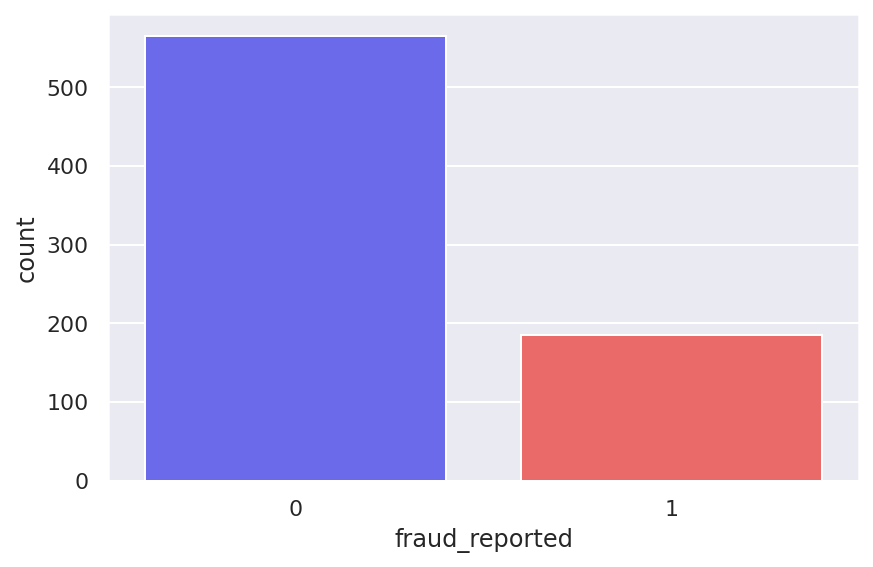

In [ ]:
#dist of dv
sns.countplot(x=y_train, palette='seismic');

565 185


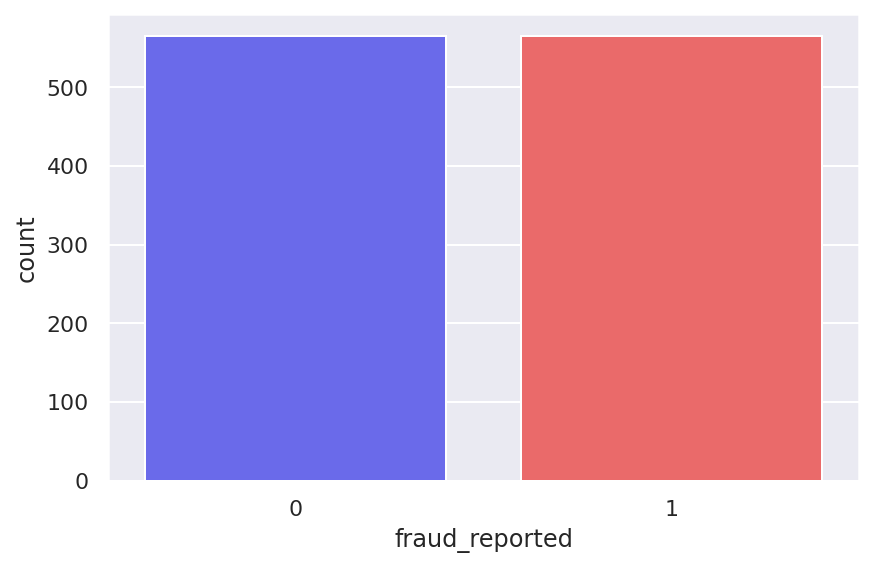

In [ ]:
df = pd.concat([x_train, y_train], axis=1)

#count class
count_class_0, count_class_1 = df['fraud_reported'].value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = df[df['fraud_reported'] == 0]
df_class_1 = df[df['fraud_reported'] == 1]

#bootstrap into a new df
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#resplit them
x_train = df_over.drop(columns='fraud_reported')
y_train = df_over.fraud_reported

sns.countplot(x=y_train, palette='seismic');

### Logistic regression

In [ ]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            
            }

    
rs_lr3 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr3.fit(x_train, y_train)
print(rs_lr3.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 138.9495494373139}


### KNN

In [ ]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn3 = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn3.fit(x_train, y_train)
print(rs_knn3.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'minkowski', 'knn__leaf_size': 5, 'knn__algorithm': 'auto'}


### Random forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf3 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf3.fit(x_train, y_train)
print(rs_rf3.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


### XGBoost

In [ ]:
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg3 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg3.fit(x_train, y_train)
print(rs_xg3.best_params_)

### AdaBoost

In [ ]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab3 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab3.fit(x_train, y_train)
print(rs_ab3.best_params_)

In [ ]:
classifiers3={'logreg3':rs_lr3, 'knn3':rs_knn3, 'Ranfor3':rs_rf3, 
             'XGB3':rs_xg3, 'AdaBoost3':rs_ab3, }

for key, value in classifiers3.items(): 
    print(scores(value,key))
    print("_________________")
    print(" ")

In [ ]:
### see correlation of their predictions 

class_dict = {**classifiers, **classifiers2, **classifiers3, **classifiers4}

Pr = pd.DataFrame(columns=['logreg', 'knn', 'Ranfor', 'XGB', 'AdaBoost',
                           'logreg2', 'knn2', 'Ranfor2', 'XGB2', 'AdaBoost2',
                           'logreg3', 'knn3', 'Ranfor3', 'XGB3', 'AdaBoost3',
                           'logreg4', 'knn4', 'Ranfor4', 'XGB4', 'AdaBoost4'])

for key, value in class_dict.items():
    
    Pred = value.best_estimator_.predict(x_test)
    Pr[key] = Pred
    

sns.set_style("white")    
ax = corrmat(Pr.corr())

correlations of the predictions were ran. XGB, Random forest and AdaBoost have high correlation, perhaps as they all are CARTs (classification and regression tress). Other than that, models seem to capture different aspects of the feature space, as shown by the small to average correlation (Pearson’s heuristics) of their predictions.

In [ ]:
### see correlation of their predictions 

class_dict = {**classifiers, **classifiers2, **classifiers3, **classifiers4}
l=[]
for key, value in class_dict.items():
  l.append(scores(value,key,0))
header = pd.MultiIndex.from_product([['No Oversampling','With SMOTE','With BootStrap','With Adasyn'],
                                     ['LogReg','KNN','RandomFor','XGB','AdaBoost']],
                                    )
evaluations = pd.DataFrame(np.array(l).T, 
                  index=['CV scores','train score','test score','Sensitivity','Specificity','Precision','F1','ROC AUC Score'], 
                  columns=header)
evaluations


In [ ]:
## TO save the evaluations table as an image
fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, evaluations, loc='upper right', colWidths=[0.17]*len(evaluations.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.5, 1.5) # change size table

plt.savefig('table.png', transparent=True)

## Evaluation 

Cross validation accuracy scores, accuracy scores on training set, accuracy scores on test set, sensitivity, specificity, precision, F1 score and ROC AUC was computed and printed as shown in the table above. 

**Observations:**

- Comparing across models that were fitted on, no oversampling dataset, on SMOTE dataset, on ADASYN dataset and on bootstrapped dataset, I picked the logistic regression, KNN and CART model.
- The best logistic regression model was the one trained on the ADASYN dataset. It had a F1 score of 0.403 and an AUC of 0.646
- The best KNN model was the one trained on the ADASYN dataset. It had a F1 score of 0.42 and an AUC of 0.60. 
- CARTs performed very well on this data set. However, since CARTs' predictions are all highly correlated, the best of them were selected. The best CART model was the weighted XGBoost on the dataset with no oversampling. It yields a F1 score of 0.65 and an AUC of 0.83.
- Overall, the ADASYN method seem to have the best F1 scores when compared to the other oversampling methods. 

![picture](table.png)








Run this cell by uncomment if image is broken in above cell

In [ ]:
# from IPython.display import Markdown
# display(Markdown('''## Evaluation 


# Cross validation accuracy scores, accuracy scores on training set, accuracy scores on test set, sensitivity, specificity, precision, F1 score and ROC AUC was computed and printed as shown in the table below. 

# **Observations:**

# - Comparing across models that were fitted on no oversampling dataset, on SMOTE dataset, on ADASYN dataset and on bootstrapped dataset, I picked the best logistic regression, KNN and CART model.

# - The best logistic regression model was the one trained on the ADASYN dataset. It had a F1 score of 0.403 and an AUC of 0.646

# - The best KNN model was the one trained on the ADASYN dataset. It had a F1 score of 0.42 and an AUC of 0.60. 

# - CARTs performed very well on this data set. However, since CARTs' predictions are all highly correlated, the best of them were selected. The best CART model was the weighted XGBoost on the dataset with no oversampling. It yields a F1 score of 0.65 and an AUC of 0.83.

# - Overall, the ADASYN method seem to have the best F1 scores when compared to the other oversampling methods. '''))
# ## TO save the evaluations table as an image
# fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis
# ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
# tabla = table(ax, evaluations, loc='upper right', colWidths=[0.17]*len(evaluations.columns))  # where df is your data frame
# tabla.auto_set_font_size(False) # Activate set fontsize manually
# tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
# tabla.scale(1.5, 1.5) # change size table

# plt.savefig('table.png', transparent=True)

## Final Model: Weighted XGBoost

The final fitted model is the weighted XGBoost on the dataset with no oversampling. The best estimators of the model are as follows:

- Scale_pos_weight: 3.054054054054054, 
- Reg_lambda (L2 regularization weight): 0.1, 
- Reg_alpha (L1 regularization weight): 0.05, 
- N_estimators: 650, 
- Max_depth: 4, 
- Gamma: 1, 
- Eta: 0.3

<br>
<details><summary>More information on XGBoost</summary>

XGBoost stands for extreme gradient boost.
XGBoost is a form of gradient boosted CART.

The Gradient Boosting algorithm involves three elements:

- A loss function to be optimized, such as cross entropy for classification or mean squared error for regression problems.
- A weak learner to make predictions, such as a greedily constructed decision tree.
- An additive model used to add weak learners to minimize the loss function.

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. 

It optimizes a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. Small steps towards the right direction make gradient boosting accurate and generalizable. 

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance and allows for L1 and L2 (or both) regularization. 

More information about these parameters can be found at: iihttps://xgboost.readthedocs.io/en/latest/parameter.html

More information on XGBoost can be found in Tianqi Chen's (main author of XGB) lecture: https://www.youtube.com/watch?v=Vly8xGnNiWs&feature=emb_logo

</details>


In [ ]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [ ]:
print("Final Model: Weighted XGBoost")
print("train score:", round(rs_xg.best_estimator_.score(x_train, y_train),3))
print("test score:", round(rs_xg.best_estimator_.score(x_test, y_test),3))


### Final fitted model's performance

The model had a training accuracy score of 0.992 and a test accuracy of 0.816. The high accuracy score hint of a low bias (it is only a hint as accuracy is not a good measure of bias in imbalance class problems).
An accuracy score difference of 0.176 between train and test is relatively small. Thus, this model can be said to have low variance and is generalizable on unseen data. 

The number of cases for each class of the test set is shown in the confusion matrix below. The y-axis shows the actual classes while the x-axis shows the predicted classes. 
- True negative refers to non-fraud cases that are classified as non-fraud cases (161 cases, which makes up 64.40% of the test set's size).
- True positive refers to fraud cases that are correctly classified as fraud cases (43 cases, which makes up 12.20% of the test set's size).
- False negative are fraud cases that are classified as non-fraud cases (19 cases, which makes up 7.60% of the test set's size).
- False positive are non-fraud cases that are classified as fraud cases (27 cases, which makes up 10.80% of the test set's size). 

Percentage out of total sample size of the test set is printed on each quadrant. 

In [ ]:
#confusion matrix
predictions = rs_xg.best_estimator_.predict(x_test)
cf_matrix = confusion_matrix(y_test, predictions)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

The summary of the classification report is presented below. 


- Sensitivity (recall of fraud cases) is derived from:
    - True positive/(True positive + False negative)
    - Sensitivity summarizes our true positive rate, which is how many we got correct out of all the positive cases.
    - Sensitivity for the final model is 69.4%.


- Specificity (recall of non-fraud cases) is derived from:
    - True negative/(True negative + False positive)
    - Specificity summarizes our true negative rate, which is how many we got correct out of all the negative cases.
    - Specificity for the final model is 85.6%


- Precision of fraud cases are derived from:
    - True positive/(True positive + False positive)
    - Precision of fraud cases summarize the accuracy of fraud cases detected. That is, out of all that I predicted as fraud, how many are correct.
    - Precision of fraud detection is 61.4%.


- Precision of non-fraud cases are derived from:
    - True negative/(True negative + False negative)
    - Precision of non-fraud cases summarize the accuracy of non-fraud cases detected. That is, out of all that I predicted as non-fraud, how many are correct. 
    - Precision of non-fraud detection is 89.4%.


- F1 scores are the harmonic mean of recall and precision and is derived from:
    - (2 x recall x precision)\(recall + precision)
    - As we are interested in fraud cases, only the F1 scores on fraud cases are reported. 
    - The F1 score of the model is 65.2%. 
    

In sum, the model has outperformed the baseline F1 scores by a huge margin. 


In [ ]:
#classification report

predictions = rs_xg.best_estimator_.predict(x_test)
print(classification_report(y_test, predictions, target_names=['Not Fraud',"Fraud"]))


The ROC curve below summarizes how well our model is at balancing between the true positive rate(sensitivity) and the false positive rate(1-specificity). Ideally, we want to have a 100% true positive rate of predicting fraud and a 100% true negative rate of predicting non-frauds (or a 0% false positive which is 100% - 100% true negative rate). This means we have perfect prediction for both classes. However, in imbalance class problems, this is extremely hard to achieve in the real world. On top of that, there is a trade of between the true positive rate and the true negative rate and conversely the false positive rate. 

This graph summarizes how well we can distinguish between two classes at each threshold of the true positive and false positive rate. The area under curve is used as a summary percentage of this metric. In sum, the model has outperformed the baseline ROC AUC scores by a huge margin. 

In [ ]:
# Instantiate the classfiers and make a list
classifiers_name = [rs_xg.best_estimator_, 
                    
                   rs_knn4.best_estimator_,
                   rs_lr4.best_estimator_]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_name:
    yproba = cls.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table['names'] = ['Weighted XGB', 'ADASYN KNN','ADASYN LogReg']
result_table.set_index('names', inplace=True)

#Plot the figure
fig = plt.figure(figsize=(8,6))

sns.set_style("white")

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='m', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Although our model performed better in predicting non-fraud cases, the model has performed very well on fraud cases as well. We have a higher false alarm than frauds escaping the detection. It is better in our case to identify more frauds than to let fraud cases escape detection. Thus, this model has succeeded in its purpose to detect fraud claims. Unlike the baseline model that sacrifices too much resources into investigations and hinder customer experience, we are also able to balance this out in this model. We can detect more fraud and we are able to balance this with correct prediction of non-fraud cases. 

### Top features

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance. This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

**Weight:**

The number of times a feature is used to split the data across all trees. The final measure, implemented exclusively in XGBoost, is counting the number of samples affected by the splits based on a feature.

The figure below summarizes the top 20 ranked by feature importance, based on weight. Drivers with hobbies such as chess, cross-fit seemed to be more prone to frauds. Incident severity and property claim are amongst the highest as well. Interaction terms such as premium and total claim amount, injury claim amount and incident severity were also top features by weight. 

In [ ]:
# plot feature importance

fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(rs_xg.best_estimator_, importance_type='weight', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Num of times feature used to split data across all trees',
               color='hotpink');


**Gain:**

It is sometimes called “Gini importance” or “mean decrease impurity” and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble.

<br>
<details><summary>More information on mean decrease in impurity:</summary>

Gini Impurity measures how often a randomly chosen record from the data set used to train the model will be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset (e.g., if half of the records in a group are "A" and the other half of the records are "B", a record randomly labelled based on the composition of that group has a 50% chance of being labelled incorrectly). Gini Impurity reaches zero when all records in a group fall into a single category (i.e., if there is only one possible label in a group, a record will be given that label 100% of the time). This measure is essentially the probability of a new record being incorrectly classified at a given node in a Decision Tree, based on the training data.

Gini Importance can be leveraged to calculate Mean Decrease in Gini, which is a measure of variable importance for estimating a target variable. Mean Decrease in Gini is the average (mean) of a variable’s total decrease in node impurity, weighted by the proportion of samples reaching that node in each individual decision tree in the random forest. This is effectively a measure of how important a variable is for estimating the value of the target variable across all the trees that make up the forest. A higher Mean Decrease in Gini indicates higher variable importance.

The most important variables to the model will be highest in the plot and have the largest Mean Decrease in Gini Values, conversely, the least important variable will be lowest in the plot and have the smallest Mean Decrease in Gini values.
    
</details>

The figure below summarizes the top 20 ranked by feature importance, based on weight. Incident severity is once again amongst the most important. Hobbies such as chess and CrossFit are also amongst the top features when looking at mean decrease in impurity. Interaction terms such as total claims and incident severity are top features as well. 

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(rs_xg.best_estimator_, importance_type='gain', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Mean decrease in impurity', color='royalblue');

# **Conclusion and Limitations**

Fraud accounted for between 15 percent and 17 percent of total claims payments for auto insurance bodily injury in 2012, according to an Insurance Research Council (IRC) study. The study estimated that between \\$5.6 billion and \\$7.7 billion was fraudulently added to paid claims for auto insurance bodily injury payments in 2012, compared with a range of \\$4.3 billion to \\$5.8 billion in 2002.

This project has built a model that can detect auto insurance fraud. In doing so, the model can reduces loses for insurance companies. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. 

Five different classifiers were used in this project: logistic regression, K-nearest neighbours, Random forest, XGBoost, AdaBoost. Four different ways of handling imbalance classes were tested out with these five classifiers: model with class weighting and hyperparameter tuning, oversampling with SMOTE, oversampling with ADASYN and oversampling with bootstrapping. 

The best and final fitted model was a weighted XGBoost what yelled a F1 score of 0.65 and a ROC AUC of 0.83. The model performed far better than the baseline F1 score of 0.397 and ROC AUC target of 0.5. The model's F1 score and ROC AUC scores were the highest amongst the other models. In conclusion, the model was able to correctly distinguish between fraud claims and legit claims with high accuracy. 

The study is not without limitations. Firstly, this study is restricted by its small sample size. Statistical models are more stable when data sets are larger. It also generalizes better as it takes a bigger proportion of the actual population. Furthermore, the data only capture incident claims of 3 states from 01 January 2015 to 01 March 2015. This means that we do not know the proportion of auto insurance policy holder who had no incidents compared to those who had incidents. We are also restricted to incidents between 2 months which may not be an accurate picture of the year. This is important as certain time of the year may correlate to higher incident rates such as St. Patrick’s Day or other holidays. Future studies may investigate acquiring a larger data set with multiple years. However, due to the sensitive nature of fraud and confidential information tagged to such data, this may remain a challenge.
